# PREPARATION

## import librairies

In [1]:
import laspy
#import pcl

#print('PCL version: %s' % pcl.__version__)
print('LASPY version: %s' % laspy.__version__)


LASPY version: 1.6.0


In [2]:
# Removing ANOYING WARNINGS
import warnings
#warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
# see it ONCE
#warnings.filterwarnings(action='once')


In [3]:
from __future__ import print_function

import tensorflow as tf

import keras
### from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation     #LSTM
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
#
from keras.utils.vis_utils import plot_model
from keras.utils import to_categorical
from keras import backend as K
from keras.callbacks import History
#
from keras.preprocessing.image import load_img, save_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
#
from keras.optimizers import SGD
from keras.regularizers import l2
#
print('TensorFlow: %s' % tf.__version__)
print('Keras: %s' % keras.__version__)
# for plots
import pydot
import pydotplus
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import model_to_dot


Using TensorFlow backend.


TensorFlow: 1.13.1
Keras: 2.3.1


In [4]:
%load_ext autoreload
%autoreload 2

# Indispensables
import pandas as pd
import numpy as np
#import math
print('Panda version: %s' % pd.__version__)
print('Numpy version: %s' % np.__version__)

import sklearn
print('SCIKIT LEARN version: %s' % sklearn.__version__)
# pip install scikit-plot
import scikitplot as skplt
print('SCIKIT PLOT version: %s' % skplt.__version__)
# Machine Lerning
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix

# general
import os
from os import listdir
#from os.path import isfile, join
#from os import walk
import sys
import io
import glob
import platform
#
print(os.name, "--", platform.system(), "--", platform.release())
#
import argparse
#from datetime import datetime
#import h5py
#import importlib

# VISU
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
#import matplotlib.colors as mcolors
#from matplotlib.colors import LogNorm


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Panda version: 1.0.2
Numpy version: 1.18.1
SCIKIT LEARN version: 0.22.2.post1
SCIKIT PLOT version: 0.3.7
posix -- Darwin -- 18.7.0


In [5]:
# ann_visualizer
import graphviz   # need ALL *graphv* from ANACONDA
# package custominsé à partir de GITHUB https://github.com/Prodicode/ann-visualizer
from ann_visualizer.visualize import ann_viz;
#
import itertools
#
import hvplot.pandas
import selenium
#import phantomJS

# IMAGES
#from IPython.display import Image, IFrame
#from PIL import Image
#import rasterio
import imageio

import colorsys

print('MATPLOTLIB version: %s' % matplotlib.__version__)
print('Seaborn version: %s' % sns.__version__)

import geopandas as gpd
print('Geo Panda version: %s' % gpd.__version__)

import xlwt    # needed for writing pd.to_Excel
import xlrd

%matplotlib inline

# import configparser

MATPLOTLIB version: 3.2.0
Seaborn version: 0.10.0
Geo Panda version: 0.7.0


In [6]:
from shapely.geometry import Point, LineString, MultiLineString
from shapely.geometry import shape


## Définitions de fonctions

In [7]:
def make_confusion_matrix(cf_matrix, group_names="labels", categories="categories", cmap='binary'):
    """This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to bedisplayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix.Default is True.
    normalize:     If True, show the proportions for each category.Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix. Default is True
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure.Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
    """
    pass
    return None


In [8]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

## Déclaration des directories et variables

In [37]:
#plateforme = ["platform.system()","node","release","version","machine","processor"]
#platform.system()
platform.node().split(".")[0].upper()
#platform.release()
#platform.version()

# initialisation des variables utilisées
df_RES = None
BASE_DIR = os.getcwd()
#
separe = "/"

# IMAC
if platform.system() == 'Darwin' and platform.node().split(".")[0].upper() == 'IMAC':
    DATA_DIR10= "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/"
    DATA_DIR8 = "/Users/pl/Desktop/DATA_SCIENCE/STAGE/RESULTATS/" 
    DIRECTORY = "EMS/"
# Laptop
else:   #if platform.system():    
    DATA_DIR10= "/Users/pierreleisy/Data_Science/NOTEBOOK/"
    DATA_DIR8 = "/Users/pierreleisy/Data_Science/STAGE/RESULTATS/"
    DIRECTORY = "STAGE/"
    
DATA_DIR  = DATA_DIR10 + DIRECTORY + "datasets/"
DATA_DIR1 = DATA_DIR10 + DIRECTORY + "DATA1/"
DATA_DIR2 = DATA_DIR10 + DIRECTORY + "DATA2/"
DATA_DIR3 = DATA_DIR10 + DIRECTORY + "DATA3/"
DATA_DIR4 = DATA_DIR10 + DIRECTORY + "DATA_new/"
DATA_DIR9 = DATA_DIR10 + DIRECTORY
    
## Eurométropole
if platform.system() == 'Windows':
    DATA_DIR  = "S:\\Commun\\SIG3D\\2020\\PROJETS_2020\\20039_MachineLearning\\DATA\\"
    DATA_DIR1 = "S:\\Commun\\SIG3D\\2020\\PROJETS_2020\\20039_MachineLearning\\DATA\\"
    DATA_DIR2 = "S:\\Commun\\SIG3D\\2020\\PROJETS_2020\\20039_MachineLearning\\DATA2\\"
    DATA_DIR3 = "S:\\Commun\\SIG3D\\2020\\PROJETS_2020\\20039_MachineLearning\\DATA3\\"
    DATA_DIR9 = "C:\\Users\\STG3841\\Mes Documents (local)\\travail\\"
    separe = "\\"   
 #
#for n in range(1,4):
DALLE_NUM  = DATA_DIR1 + "DallesNumPoints5m" + separe
DALLE_ECA  = DATA_DIR1 + "DallesEcartZ5m" + separe
DALLE_POS  = DATA_DIR1 + "DallesPosition5m" + separe
#
DALLE_NUM2 = DATA_DIR2 + "DallesNumPoints5m" + separe
DALLE_ECA2 = DATA_DIR2 + "DallesEcartZ5m" + separe
DALLE_POS2 = DATA_DIR2 + "DallesPosition5m" + separe
#
DALLE_NUM3 = DATA_DIR3 + "DallesNumPoints5m" + separe
DALLE_ECA3 = DATA_DIR3 + "DallesEcartZ5m" + separe
DALLE_POS3 = DATA_DIR3 + "DallesPosition5m" + separe
#
DALLE_NUM4 = DATA_DIR4 + "DalleLAS_5m" + separe
#
print("Working directory:",BASE_DIR)
print("Data ROOT directory:",DATA_DIR)

sys.path.append(DATA_DIR)
sys.path.append(os.path.join(DATA_DIR,'DallesNumPoints5m\\'))
sys.path

print("test:", DALLE_NUM)
print("test4:", DALLE_NUM4)

'IMAC'

Working directory: /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS
Data ROOT directory: /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/datasets/


['/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS',
 '/Users/pl/anaconda3/lib/python37.zip',
 '/Users/pl/anaconda3/lib/python3.7',
 '/Users/pl/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/Users/pl/anaconda3/lib/python3.7/site-packages',
 '/Users/pl/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/pl/.ipython',
 '/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/datasets/',
 '/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/datasets/DallesNumPoints5m\\',
 '/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/datasets/',
 '/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/datasets/DallesNumPoints5m\\',
 '/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/datasets/',
 '/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/datasets/DallesNumPoints5m\\',
 '/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/datasets/',
 '/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/datasets/DallesNumPoints5m\\',
 '/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/datasets/',
 '/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/data

test: /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/DallesNumPoints5m/
test4: /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA_new/DalleLAS_5m/


## Zone considérée

In [33]:
zone = [2042500,7272000,0,0]
pas = [200,200,5]
extensionX = pas[0]*pas[2]
extensionY = pas[1]*pas[2]
zone[2] = zone[0]+extensionX
zone[3] = zone[1]+extensionY
print("zone considérée :", zone[0] ,"-", zone[1]," à", 
      zone[2],"-", zone[3], "d'extension :", extensionX, "*", extensionY," m")


zone considérée : 2042500 - 7272000  à 2043500 - 7273000 d'extension : 1000 * 1000  m


## création des listes d'images

In [38]:
#liste1 = [f for f in listdir(DALLE_NUM) if isfile(join(DALLE_NUM, f))]
liste_11 = [f for f in glob.glob(DALLE_NUM  + separe + "*.tif", recursive=True)]#   #only first N for test
liste_12 = [f for f in glob.glob(DALLE_ECA  + separe + "*.tif", recursive=True)]#
liste_13 = [f for f in glob.glob(DALLE_POS  + separe + "*.tif", recursive=True)]#
#
liste_21 = [f for f in glob.glob(DALLE_NUM2 + separe + "*.tif", recursive=True)]#
liste_22 = [f for f in glob.glob(DALLE_ECA2 + separe + "*.tif", recursive=True)]#
liste_23 = [f for f in glob.glob(DALLE_POS2 + separe + "*.tif", recursive=True)]#
#
liste_31 = [f for f in glob.glob(DALLE_NUM3 + separe + "*.tif", recursive=True)]#
liste_32 = [f for f in glob.glob(DALLE_ECA3 + separe + "*.tif", recursive=True)]#
liste_33 = [f for f in glob.glob(DALLE_POS3 + separe + "*.tif", recursive=True)]#
#
liste_41 = [f for f in glob.glob(DALLE_NUM4 + separe + "*.tif", recursive=True)]#
#
print("DATA1:", len(listdir(DALLE_NUM)), len(liste_11), len(liste_12), len(liste_13))
print("DATA2:", len(liste_21), len(liste_22), len(liste_23))
print("DATA3:", len(liste_31), len(liste_32), len(liste_33))
print("DATA4:", len(liste_41))

liste_NUM = os.listdir(DALLE_NUM)
liste_ECA = os.listdir(DALLE_ECA)
liste_POS = os.listdir(DALLE_POS)
print(len(liste_NUM), len(liste_ECA), len(liste_POS))

DATA1: 29387 29384 29384 29384
DATA2: 1408 1408 1408
DATA3: 0 0 0
DATA4: 0
29387 29389 29384


# DONNEES

## LASPY ou autre librairies NUAGES de POINTS

In [39]:
import laspy

# Open a file in read mode:
inFile = laspy.file.File(DATA_DIR9 + "dataDalles/2043000_7272500_Lidar_15-16.las")
# Grab a numpy dataset of our clustering dimensions:
dataset = np.vstack([inFile.x, inFile.y, inFile.z]).transpose()
dataset.shape

(5030868, 3)

In [23]:
%%time
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step
        
#ground points grid filter
n = 100 #grid step

dataset_Z_filtered = dataset[[0]]

zfiltered = (dataset[:, 2].max() - dataset[:, 2].min())/10 

#setting height filtered from ground
print('zfiltered =', zfiltered)
xstep = (dataset[:, 0].max() - dataset[:, 0].min())/n
ystep = (dataset[:, 1].max() - dataset[:, 1].min())/n

for x in frange (dataset[:, 0].min(), dataset[:, 0].max(), xstep):
    for y in frange (dataset[:, 1].min(), dataset[:, 1].max(), ystep):
        datasetfiltered = dataset[(dataset[:,0] > x)
                             &(dataset[:, 0] < x+xstep)
                             &(dataset[:, 1] > y)
                             &(dataset[:, 1] < y+ystep)]
    if datasetfiltered.shape[0] > 0:
        datasetfiltered = datasetfiltered[datasetfiltered[:, 2]
                        >(datasetfiltered[:, 2].min()+ zfiltered)]
        if datasetfiltered.shape[0] > 0:
            dataset_Z_filtered = np.concatenate((dataset_Z_filtered,
                                             datasetfiltered))
print('dataset_Z_filtered shape', dataset_Z_filtered.shape)

zfiltered = 3.0390000000000015
dataset_Z_filtered shape (8115, 3)
CPU times: user 4min 9s, sys: 863 ms, total: 4min 10s
Wall time: 4min 12s


In [40]:
print("Examining Point Format: ")
pointformat = inFile.point_format
for spec in inFile.point_format:
    print(spec.name)

Examining Point Format: 
X
Y
Z
intensity
flag_byte
raw_classification
scan_angle_rank
user_data
pt_src_id
gps_time
red
green
blue


In [41]:
print('Z range =', dataset[:, 2].max() - dataset[:, 2].min())
print('Z max   =', dataset[:, 2].max(), 'Z min =', dataset[:, 2].min())
print('Y range =', dataset[:, 1].max() - dataset[:, 1].min())
print('Y max   =', dataset[:, 1].max(), 'Y min =', dataset[:, 1].min())
print('X range =', dataset[:, 0].max() - dataset[:, 0].min())
print('X max   =', dataset[:, 0].max(), 'X min =', dataset[:, 0].min())

Z range = 30.390000000000015
Z max   = 173.93 Z min = 143.54
Y range = 499.9900000002235
Y max   = 7272999.99 Y min = 7272500.0
X range = 499.9899999999907
X max   = 2043499.99 X min = 2043000.0


In [42]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import path

dataset = preprocessing.normalize(dataset)
dataset_Z_filtered = preprocessing.normalize(dataset_Z_filtered)

NameError: name 'dataset_Z_filtered' is not defined

In [43]:
clustering = DBSCAN(eps=2, min_samples=5, leaf_size=30).fit(dataset)
#clustering = DBSCAN(eps=2, min_samples=5, leaf_size=30).fit(dataset_Z_filtered)


KeyboardInterrupt: 

In [ ]:
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
labels = clustering.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

In [ ]:
# Black removed and is used for noise instead.
fig = plt.figure(figsize=[100, 50])
ax = fig.add_subplot(111, projection=’3d’)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)

for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
    # Black used for noise.
            col = [0, 0, 0, 1]
            class_member_mask = (labels == k)
        xyz = dataset[class_member_mask & core_samples_mask]
        ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], c=col, marker=”.”)
        
plt.title(‘Estimated number of cluster: %d’ % n_clusters_)
plt.show()

## Creation dataframe lampes des lampadaires présents dans la dalle X*X km

In [44]:
def header_lampadaire(file, ):
    head = pd.read_csv(file, sep=" ", header=None, skiprows=0, nrows=5, names=["noms","val"])
    n_row = head['val'][0]
    n_col = head['val'][1]
    xlow  = head['val'][2]
    ylow  = head['val'][3]
    cell  = head['val'][4]
    print("Bord supérieur gauche 1:", xlow,ylow,n_row,n_col,cell)
    return (xlow,ylow,n_row,n_col,cell)

def create_lampadaire(file, bordX, bordY, nX, nY, taille):
    lamp = pd.read_csv(file, sep=" ", header=None, skiprows=6)
    #lampadaires1.sum().head(4)
    #print(lamp.nunique().agg(['mean','count','sum']))
    # reconstruit le tableau dans le bon schéma usuel par le calcul de la transposee
    lamp = lamp.T
    # inversion des colonnes (pas de soucis car nombre pair de colonnes ... nécessaire ou pas ?)
    lamp = lamp[lamp.columns[::-1]]
    lamp2 = lamp.copy()
    lamp2.loc['Total',:] = lamp2.sum(axis=0)
    lamp2.loc[:,'Total'] = lamp2.sum(axis=1)
    lamp2.sum(axis=0)
    print(lamp.shape, "somme totale:",lamp.sum().sum(), 
          "somme col:", lamp2.iloc[:-1,-1].sum(), "somme row:", lamp2.iloc[-1,:-1].sum())
    #lamp['Somm2'] = lamp.sum().sum()
    # calcul d'une table de nX*nY lignes
    lampe = pd.DataFrame(np.reshape(lamp.to_numpy(), (nX * nY)))
    lampe['NumI'] = lampe.index
    # calcul des dalles ... indexage des lignes et colonnes
    lampe['NumY'] = lampe['NumI'].mod(other=nY)
    lampe['NumX'] = ((lampe['NumI'] - nX + 1) / nX).apply(np.ceil)
    #lampes = lampes.drop(['Num'], axis=1)
    lampe.rename(columns={0: 'present'}, inplace=True)
    list_col = {'present': 'int8','NumI': 'int32','NumX': 'int32','NumY': 'int32'}
    lampe = lampe.astype(list_col, copy=False)
    #print(lampe.dtypes, lampe.describe(include='all'))
    lampe['X'] = bordX + lampe['NumX'] * taille
    lampe['Y'] = bordY + lampe['NumY'] * taille
    lampe['nom_NUM'] = lampe['X'].map(str) + "_" + lampe['Y'].map(str) +  "_NumPoints5m.tif"
    lampe['nom_ECA'] = lampe['X'].map(str) + "_" + lampe['Y'].map(str) + "_EcartZ5m.tif"
    lampe['nom_POS'] = lampe['X'].map(str) + "_" + lampe['Y'].map(str) +  "_Position5m.tif"
    # extraction des lampadaires
    # lampeB = lampe[lampe['present'] > 0]
    lampeB = lampe[lampe['present'] != 0]
    print("Dalle:", lampe.shape, "Nbre lampadaires:", lampeB.shape)
    lampe.head()
    return (lamp2,lampe,lampeB)

# Intialisation des variables de la dalle
fich_lamp1  = DATA_DIR1 + "LampadairePresence_0_1_5m.asc"   # DATA1
fich_lamp2a = DATA_DIR2 + "LampadairePresence_0_1_5m.asc"   # DATA2
fich_lamp2b = DATA_DIR2 + "listepositif.xlsx"

(xlow,ylow,n_row,n_col,cell) = header_lampadaire(fich_lamp1)
_ = header_lampadaire(fich_lamp2a)
##################################
(lamp1,lampes1,lampes1b) = create_lampadaire(fich_lamp1, xlow, ylow, n_row, n_col, cell)
(lamp2,lampes2,lampes2b) = create_lampadaire(fich_lamp2a, xlow+2, ylow+2, n_row, n_col, cell)
##################################
#print(lampadaires1.describe())
lampes2a = pd.read_excel(fich_lamp2b, header=0, skiprows=0)
print(lampes1.shape,lampes1b.shape,lampes2.shape,lampes2a.shape,lampes2b.shape)
lampes1b.head(5)
lampes2b.head(5)
lampes2a.head(5)


Bord supérieur gauche 1: 2042500 7272000 200 200 5
Bord supérieur gauche 1: 2042502 7272002 200 200 5
(200, 200) somme totale: 357.0 somme col: 357.0 somme row: 357.0
Dalle: (40000, 9) Nbre lampadaires: (357, 9)
(200, 200) somme totale: 357.0 somme col: 357.0 somme row: 357.0
Dalle: (40000, 9) Nbre lampadaires: (355, 9)
(40000, 9) (357, 9) (40000, 9) (355, 5) (355, 9)


present  NumI  NumY  NumX        X        Y  \
52         1    52    52     0  2042500  7272260   
92         1    92    92     0  2042500  7272460   
170        1   170   170     0  2042500  7272850   
249        1   249    49     1  2042505  7272245   
281        1   281    81     1  2042505  7272405   

                             nom_NUM                       nom_ECA  \
52   2042500_7272260_NumPoints5m.tif  2042500_7272260_EcartZ5m.tif   
92   2042500_7272460_NumPoints5m.tif  2042500_7272460_EcartZ5m.tif   
170  2042500_7272850_NumPoints5m.tif  2042500_7272850_EcartZ5m.tif   
249  2042505_7272245_NumPoints5m.tif  2042505_7272245_EcartZ5m.tif   
281  2042505_7272405_NumPoints5m.tif  2042505_7272405_EcartZ5m.tif   

                            nom_POS  
52   2042500_7272260_Position5m.tif  
92   2042500_7272460_Position5m.tif  
170  2042500_7272850_Position5m.tif  
249  2042505_7272245_Position5m.tif  
281  2042505_7272405_Position5m.tif

present  NumI  NumY  NumX        X        Y  \
80         1    80    80     0  2042502  7272402   
92         1    92    92     0  2042502  7272462   
102        1   102   102     0  2042502  7272512   
106        1   106   106     0  2042502  7272532   
169        1   169   169     0  2042502  7272847   

                             nom_NUM                       nom_ECA  \
80   2042502_7272402_NumPoints5m.tif  2042502_7272402_EcartZ5m.tif   
92   2042502_7272462_NumPoints5m.tif  2042502_7272462_EcartZ5m.tif   
102  2042502_7272512_NumPoints5m.tif  2042502_7272512_EcartZ5m.tif   
106  2042502_7272532_NumPoints5m.tif  2042502_7272532_EcartZ5m.tif   
169  2042502_7272847_NumPoints5m.tif  2042502_7272847_EcartZ5m.tif   

                            nom_POS  
80   2042502_7272402_Position5m.tif  
92   2042502_7272462_Position5m.tif  
102  2042502_7272512_Position5m.tif  
106  2042502_7272532_Position5m.tif  
169  2042502_7272847_Position5m.tif

_column  _row  _overlaps     posX     posY
0        0    80          1  2042502  7272402
1        0    92          1  2042502  7272462
2        0   102          1  2042502  7272512
3        0   106          1  2042502  7272532
4        0   169          1  2042502  7272847

## Lecture autres fichiers (CSV et/ou SHP)

### Bancs publics

In [45]:
# BANCS PUBLICS
f_mobi = DATA_DIR  + "mobilier_amenagement2.csv"
mobilier = pd.read_csv(f_mobi, sep=",", header=0, encoding = "utf-8")
mobilier2 = mobilier[mobilier['type_entite'] == 'banc_public']
print("Tout Mobilier:", mobilier.shape, " seulement bancs publics:", mobilier2.shape)
mobilier2.head(2)

gdf_mobi = gpd.read_file(DATA_DIR  + "shapes/mobilier_amenagement.shp")
gdf_mobi.head(2)
gdf_mobi2 = gdf_mobi[gdf_mobi['type_entit'] == 'banc_public']
# Type MULTILINESTRING
gdf_mobi2.head(4)

# Formes des fichiers des bancs publics ... caractérisation
gdf_mobi3 = gdf_mobi2.head(80)
print(gdf_mobi2.shape, gdf_mobi3.shape)

#for boundary in gdf_mobi3['geometry']:
#    print(boundary.xy)

maxi = 0
nb = 0
#for i, row in gdf_mobi2.iterrows():
for i, row in gdf_mobi3.iterrows():
    ligne = row['geometry']
    nbre = 0
    if ligne.geom_type == "LineString":
        nbre = len(ligne.coords)
        #x, y = ligne.centroid.x, ligne.centroid.y
        #print(i, x, y)
    elif ligne.geom_type == "MultiLineString":
        nb += 1
        for line in ligne:
            nbre += len(line.coords)
    #print(i, nbre, forme)
    if nbre > maxi:
        maxi = nbre
    #for pt in list(row['geometry'].coords):
        
print("Nombre maximum de points:", maxi, " avec ", nb, "MultiLineStrings")

#def getXY(pt):
#    return (pt.x, pt.y)
#centroidseries = zones['geometry'].centroid
#x,y = [list(t) for t in zip(*map(getXY, centroidseries))]

gdf_mobi3["x"] = gdf_mobi3.centroid.x
gdf_mobi3["y"] = gdf_mobi3.centroid.y
print(gdf_mobi3.shape)

gdf_mobi3.tail()


Tout Mobilier: (24848, 15)  seulement bancs publics: (10184, 15)


gid    ident_gy code_precision            date_leve      auteur  \
0  40074         NaN       rattache  2018/11/17 00:00:00      Clauss   
1    192  54449499.0       rattache  2011/12/02 00:00:00  Brundaller   

  observ_autre            date_reco date_modif  type_entite   z_sol  \
0          NaN  2018/10/01 00:00:00        NaN  banc_public  139.26   
1          NaN  2019/09/01 00:00:00        NaN  banc_public  147.25   

   orientation  echelle_x  echelle_y        date_creation             date_maj  
0          NaN        NaN        NaN  2018/11/30 09:34:12  2019/05/09 16:17:16  
1          NaN        NaN        NaN  2014/01/18 14:15:10  2020/02/20 10:24:48

gid    ident_gy code_preci                date_leve      auteur  \
0  40074         NaN   rattache  2018/11/17 00:00:00.000      Clauss   
1    192  54449499.0   rattache  2011/12/02 00:00:00.000  Brundaller   

  observ_aut                date_reco date_modif   type_entit   z_sol  \
0       None  2018/10/01 00:00:00.000       None  banc_public  139.26   
1       None  2019/09/01 00:00:00.000       None  banc_public  147.25   

  orientatio echelle_x echelle_y               date_creat  \
0       None      None      None  2018/11/30 09:34:12.000   
1       None      None      None  2014/01/18 14:15:10.000   

                  date_maj                                           geometry  
0  2019/05/09 16:17:16.000  LINESTRING (2051288.423 7275080.683, 2051286.9...  
1  2020/02/20 10:24:48.000  LINESTRING (2042622.445 7267568.482, 2042625.3...

gid    ident_gy code_preci                date_leve      auteur  \
0  40074         NaN   rattache  2018/11/17 00:00:00.000      Clauss   
1    192  54449499.0   rattache  2011/12/02 00:00:00.000  Brundaller   
4  31635         NaN   rattache  2016/05/05 00:00:00.000      Clauss   
6  26586         NaN   rattache  2015/04/30 00:00:00.000    Martinis   

  observ_aut                date_reco date_modif   type_entit   z_sol  \
0       None  2018/10/01 00:00:00.000       None  banc_public  139.26   
1       None  2019/09/01 00:00:00.000       None  banc_public  147.25   
4       None  2019/05/07 00:00:00.000       None  banc_public  141.16   
6       None  2018/04/24 00:00:00.000       None  banc_public  140.31   

  orientatio echelle_x echelle_y               date_creat  \
0       None      None      None  2018/11/30 09:34:12.000   
1       None      None      None  2014/01/18 14:15:10.000   
4       None      None      None  2016/11/15 10:57:00.000   
6       None      None      None  2015/06/22 09:27:24.000   

                  date_maj                                           geometry  
0  2019/05/09 16:17:16.000  LINESTRING (2051288.423 7275080.683, 2051286.9...  
1  2020/02/20 10:24:48.000  LINESTRING (2042622.445 7267568.482, 2042625.3...  
4  2019/10/28 15:15:04.000  LINESTRING (2052386.296 7271344.658, 2052386.8...  
6  2019/02/18 09:28:20.000  LINESTRING (2049878.454 7275254.542, 2049878.0...

(10184, 16) (80, 16)
Nombre maximum de points: 136  avec  2 MultiLineStrings
(80, 18)


gid      ident_gy code_preci                date_leve    auteur  \
211     60 -1.996483e+09   rattache  2013/10/14 00:00:00.000    Clauss   
212     61 -1.996483e+09   rattache  2013/10/14 00:00:00.000    Clauss   
213     40  5.450002e+07   rattache  2013/05/23 00:00:00.000  Muller C   
214     41  5.450000e+07   rattache  2013/05/23 00:00:00.000  Muller C   
215  33319           NaN       None                     None  Muller C   

    observ_aut                date_reco date_modif   type_entit   z_sol  \
211       None  2019/05/07 00:00:00.000       None  banc_public  141.34   
212       None  2019/05/07 00:00:00.000       None  banc_public  141.35   
213       None  2017/03/24 00:00:00.000       None  banc_public  146.25   
214       None  2017/03/24 00:00:00.000       None  banc_public  146.59   
215       None                     None       None  banc_public  137.00   

    orientatio echelle_x echelle_y               date_creat  \
211       None      None      None  2014/01/18 14:15:10.000   
212       None      None      None  2014/01/18 14:15:10.000   
213       None      None      None  2014/01/18 14:15:10.000   
214       None      None      None  2014/01/18 14:15:10.000   
215       None      None      None  2017/04/11 08:39:12.000   

                    date_maj  \
211  2019/10/28 15:15:04.000   
212  2019/10/28 15:15:04.000   
213  2017/06/29 10:08:12.000   
214  2017/06/29 10:08:12.000   
215  2017/04/11 08:39:12.000   

                                              geometry             x  \
211  MULTILINESTRING ((2052210.294 7271182.357, 205...  2.052210e+06   
212  MULTILINESTRING ((2052227.674 7271165.949, 205...  2.052228e+06   
213  LINESTRING (2046275.114 7277099.704, 2046275.2...  2.046275e+06   
214  LINESTRING (2046307.896 7277038.217, 2046308.9...  2.046309e+06   
215  LINESTRING (2050369.780 7278163.252, 2050370.3...  2.050370e+06   

                y  
211  7.271185e+06  
212  7.271168e+06  
213  7.277101e+06  
214  7.277039e+06  
215  7.278164e+06

### Lampadaires

In [47]:

# LAMPADAIRES CSV
f_lamp = DATA_DIR  + "lampadaires2.csv"
lampad = pd.read_csv(f_lamp, sep=",",header=0, encoding = "utf-8")
#lampad.head(3)
# LAMPADAIRES SHP
gdf_lamp = gpd.read_file(DATA_DIR  + "shapes/lampadaires.shp")                           
# extraction des coordonnées (x,y)
gdf_lamp["x"] = gdf_lamp["geometry"].x
gdf_lamp["y"] = gdf_lamp["geometry"].y
#gdf_lamp.head(3)
print("Tailles des fichiers originels:", lampad.shape, gdf_lamp.shape)

decal = 2
colonnes0 = ['gid','x','y','z_sol','date_leve','date_reco','date_creat','date_maj']
colonnes3 = ['gid','present','x','y','z_sol','x2','y2','intX','intY','nom_NUM']

def arrondi(df, col, c1=10, c2=2):
    cols = [col+str(c1),col+str(c2)]
    df[cols[0]] = round((df[col]/10),0)*10
    index1 = df[df[col] - df[cols[0]] >= 0].index
    index2 = df[df[col] - df[cols[0]] < 0].index
    df.loc[index1, cols[1]] = df[cols[0]]
    df.loc[index2, cols[1]] = df[cols[0]] - 5
    df[cols[1]] = df[cols[1]].astype(int)
    return df

def create_dalle0():
    indexage = list(range(0,pas[0]*pas[1],1))
    df = pd.DataFrame(index=indexage, columns=colonnes3)
    df['gid'] = indexage
    df['present'] = 0
    df['x'] = 0
    df['y'] = 0
    df['z_sol'] = 0
    df['x2'] = zone[0] + (pas[2]*(df['gid']/pas[0]).apply(np.floor)).mod(pas[0]*pas[2])
    df['y2'] = zone[1] + (pas[2]*df['gid']).mod(pas[1]*pas[2])
    df['intX'] = ((df['x2']-zone[0]+1)/pas[2]).apply(np.floor)
    df['intY'] = ((df['y2']-zone[1]+1)/pas[2]).apply(np.floor)
    df[['x2','y2','intX','intY']] = df[['x2','y2','intX','intY']].astype(int)
    df['nom_NUM'] = df['x2'].map(str) + '_' + df['y2'].map(str) + '_NumPoints5m.tif'
    return df

def create_dalles(df1, df2, zone, pas, col):
    df1['present'] = 1
    df1['intX'] = ((df1['x2']-zone[0]+1)/pas[2]).apply(np.floor)   # .apply(np.ceil)
    df1['intY'] = ((df1['y2']-zone[1]+1)/pas[2]).apply(np.floor)
    df1[['intX','intY']] = df1[['intX','intY']].astype(int)
    df1['nom_NUM'] = df1['x2'].map(str) + '_' + df1['y2'].map(str) + '_NumPoints5m.tif'
    #df1['nom_ECA'] = df1['x2'].map(str) + '_' + df1['y2'].map(str) + '_EcartZ5m.tif'
    #df1['nom_POS'] = df1['x2'].map(str) + '_' + df1['y2'].map(str) + '_Position5m.tif'
    df_b = df1[col].sort_values(['intX','intY'])
    df_c = df_b.merge(df2, how='left', left_on=['intX','intY'], right_on=['NumX','NumY'])
    df_c['X_diff'] = df_c['intX'] - df_c['NumX']
    df_c['Y_diff'] = df_c['intY'] - df_c['NumY']
    df_d = df_c[(df_c['X_diff'] != 0) & (df_c['Y_diff'] != 0)]
    return (df1,df_b,df_c,df_d)

dalle1 = gdf_lamp[(gdf_lamp['x'] >= zone[0]) & (gdf_lamp['x'] <= zone[2]) &
                  (gdf_lamp['y'] >= zone[1]) & (gdf_lamp['y'] <= zone[3])]

dalle2 = gdf_lamp[(gdf_lamp['x'] >= zone[0]+decal) & (gdf_lamp['x'] <= zone[2]+decal) &
                  (gdf_lamp['y'] >= zone[1]+decal) & (gdf_lamp['y'] <= zone[3]+decal)]
print(dalle1.shape, dalle2.shape)
#dalle1[colonnes0].head(3)
dalle0 = create_dalle0()

# Calcul des coordonnées du début de dalle pour les objets
dalle1 = arrondi(dalle1, 'x', 10, 2)
dalle1 = arrondi(dalle1, 'y', 10, 2)
(dalle1, dalle1b, dalle1c, dalle1d) = create_dalles(dalle1, lampes1b, zone, pas, colonnes3)
dalle1[colonnes3].head(2)
dalle1d
print(dalle1c.shape , dalle1d.shape)
dalle2 = arrondi(dalle2, 'x', 10, 2)
dalle2 = arrondi(dalle2, 'y', 10, 2)
(dalle2, dalle2b, dalle2c, dalle2d) = create_dalles(dalle2, lampes1b, zone, pas, colonnes3)
dalle2b[colonnes3].head(3)
dalle2d
print(dalle2c.shape , dalle2d.shape)

dalle0

Tailles des fichiers originels: (71872, 10) (71872, 13)
(358, 13) (358, 13)


gid  present            x            y   z_sol       x2       y2  intX  \
2080  2422        1  2042953.109  7272915.712  147.66  2042950  7272915    90   
2081  2423        1  2042945.044  7272320.195  147.01  2042945  7272320    89   

      intY                          nom_NUM  
2080   183  2042950_7272915_NumPoints5m.tif  
2081    64  2042945_7272320_NumPoints5m.tif

Empty DataFrame
Columns: [gid, present_x, x, y, z_sol, x2, y2, intX, intY, nom_NUM_x, present_y, NumI, NumY, NumX, X, Y, nom_NUM_y, nom_ECA, nom_POS, X_diff, Y_diff]
Index: []

(358, 21) (0, 21)


gid  present            x            y   z_sol       x2       y2  \
10584  15755        1  2042504.307  7272462.353  148.01  2042500  7272460   
10579  15749        1  2042502.879  7272851.765  148.41  2042500  7272850   
10587  15758        1  2042507.583  7272249.214  149.20  2042505  7272245   

       intX  intY                          nom_NUM  
10584     0    92  2042500_7272460_NumPoints5m.tif  
10579     0   170  2042500_7272850_NumPoints5m.tif  
10587     1    49  2042505_7272245_NumPoints5m.tif

gid  present_x            x            y  z_sol       x2       y2  \
357  85628          1  2043492.593  7273000.512  145.9  2043490  7273000   

     intX  intY                        nom_NUM_x  present_y  NumI  NumY  NumX  \
357   198   200  2043490_7273000_NumPoints5m.tif        NaN   NaN   NaN   NaN   

      X   Y nom_NUM_y nom_ECA nom_POS  X_diff  Y_diff  
357 NaN NaN       NaN     NaN     NaN     NaN     NaN

(358, 21) (1, 21)


gid  present  x  y  z_sol       x2       y2  intX  intY  \
0          0        0  0  0      0  2042500  7272000     0     0   
1          1        0  0  0      0  2042500  7272005     0     1   
2          2        0  0  0      0  2042500  7272010     0     2   
3          3        0  0  0      0  2042500  7272015     0     3   
4          4        0  0  0      0  2042500  7272020     0     4   
...      ...      ... .. ..    ...      ...      ...   ...   ...   
39995  39995        0  0  0      0  2043495  7272975   199   195   
39996  39996        0  0  0      0  2043495  7272980   199   196   
39997  39997        0  0  0      0  2043495  7272985   199   197   
39998  39998        0  0  0      0  2043495  7272990   199   198   
39999  39999        0  0  0      0  2043495  7272995   199   199   

                               nom_NUM  
0      2042500_7272000_NumPoints5m.tif  
1      2042500_7272005_NumPoints5m.tif  
2      2042500_7272010_NumPoints5m.tif  
3      2042500_7272015_NumPoints5m.tif  
4      2042500_7272020_NumPoints5m.tif  
...                                ...  
39995  2043495_7272975_NumPoints5m.tif  
39996  2043495_7272980_NumPoints5m.tif  
39997  2043495_7272985_NumPoints5m.tif  
39998  2043495_7272990_NumPoints5m.tif  
39999  2043495_7272995_NumPoints5m.tif  

[40000 rows x 10 columns]

In [48]:
dalle = dalle0[colonnes3].merge(dalle1[colonnes3], how='left', left_on=['x2','y2'], right_on=['x2','y2'])
#dalle = dalle1[colonnes3].merge(dalle0[colonnes3], how='left', left_on=['x2','y2'], right_on=['x2','y2'])
dalle = dalle.fillna(0)
dalle['present_x'] = dalle['present_x'] + dalle['present_y']
dalleB = dalle[(dalle['present_y'] != 0)]
dalle
print(dalle.shape, dalleB.shape)


#import os  
#os.rename('guru99.txt','career.guru99.txt') 

gid_x  present_x  x_x  y_x  z_sol_x       x2       y2  intX_x  intY_x  \
0          0        0.0    0    0        0  2042500  7272000       0       0   
1          1        0.0    0    0        0  2042500  7272005       0       1   
2          2        0.0    0    0        0  2042500  7272010       0       2   
3          3        0.0    0    0        0  2042500  7272015       0       3   
4          4        0.0    0    0        0  2042500  7272020       0       4   
...      ...        ...  ...  ...      ...      ...      ...     ...     ...   
39996  39995        0.0    0    0        0  2043495  7272975     199     195   
39997  39996        0.0    0    0        0  2043495  7272980     199     196   
39998  39997        0.0    0    0        0  2043495  7272985     199     197   
39999  39998        0.0    0    0        0  2043495  7272990     199     198   
40000  39999        0.0    0    0        0  2043495  7272995     199     199   

                             nom_NUM_x  gid_y  present_y  x_y  y_y  z_sol_y  \
0      2042500_7272000_NumPoints5m.tif    0.0        0.0  0.0  0.0      0.0   
1      2042500_7272005_NumPoints5m.tif    0.0        0.0  0.0  0.0      0.0   
2      2042500_7272010_NumPoints5m.tif    0.0        0.0  0.0  0.0      0.0   
3      2042500_7272015_NumPoints5m.tif    0.0        0.0  0.0  0.0      0.0   
4      2042500_7272020_NumPoints5m.tif    0.0        0.0  0.0  0.0      0.0   
...                                ...    ...        ...  ...  ...      ...   
39996  2043495_7272975_NumPoints5m.tif    0.0        0.0  0.0  0.0      0.0   
39997  2043495_7272980_NumPoints5m.tif    0.0        0.0  0.0  0.0      0.0   
39998  2043495_7272985_NumPoints5m.tif    0.0        0.0  0.0  0.0      0.0   
39999  2043495_7272990_NumPoints5m.tif    0.0        0.0  0.0  0.0      0.0   
40000  2043495_7272995_NumPoints5m.tif    0.0        0.0  0.0  0.0      0.0   

       intX_y  intY_y nom_NUM_y  
0         0.0     0.0         0  
1         0.0     0.0         0  
2         0.0     0.0         0  
3         0.0     0.0         0  
4         0.0     0.0         0  
...       ...     ...       ...  
39996     0.0     0.0         0  
39997     0.0     0.0         0  
39998     0.0     0.0         0  
39999     0.0     0.0         0  
40000     0.0     0.0         0  

[40001 rows x 18 columns]

(40001, 18) (358, 18)


In [49]:
dalleB


gid_x  present_x  x_x  y_x  z_sol_x       x2       y2  intX_x  intY_x  \
52        52        1.0    0    0        0  2042500  7272260       0      52   
92        92        1.0    0    0        0  2042500  7272460       0      92   
170      170        1.0    0    0        0  2042500  7272850       0     170   
249      249        1.0    0    0        0  2042505  7272245       1      49   
281      281        1.0    0    0        0  2042505  7272405       1      81   
...      ...        ...  ...  ...      ...      ...      ...     ...     ...   
39571  39570        1.0    0    0        0  2043485  7272850     197     170   
39578  39577        1.0    0    0        0  2043485  7272885     197     177   
39686  39685        1.0    0    0        0  2043490  7272425     198      85   
39757  39756        1.0    0    0        0  2043490  7272780     198     156   
39764  39763        1.0    0    0        0  2043490  7272815     198     163   

                             nom_NUM_x    gid_y  present_y          x_y  \
52     2042500_7272260_NumPoints5m.tif  15750.0        1.0  2042501.636   
92     2042500_7272460_NumPoints5m.tif  15755.0        1.0  2042504.307   
170    2042500_7272850_NumPoints5m.tif  15749.0        1.0  2042502.879   
249    2042505_7272245_NumPoints5m.tif  15758.0        1.0  2042507.583   
281    2042505_7272405_NumPoints5m.tif  84123.0        1.0  2042506.474   
...                                ...      ...        ...          ...   
39571  2043485_7272850_NumPoints5m.tif  85632.0        1.0  2043488.226   
39578  2043485_7272885_NumPoints5m.tif  85631.0        1.0  2043485.206   
39686  2043490_7272425_NumPoints5m.tif   7028.0        1.0  2043490.274   
39757  2043490_7272780_NumPoints5m.tif  85626.0        1.0  2043493.587   
39764  2043490_7272815_NumPoints5m.tif  85625.0        1.0  2043491.323   

               y_y  z_sol_y  intX_y  intY_y                        nom_NUM_y  
52     7272260.047   149.07     0.0    52.0  2042500_7272260_NumPoints5m.tif  
92     7272462.353   148.01     0.0    92.0  2042500_7272460_NumPoints5m.tif  
170    7272851.765   148.41     0.0   170.0  2042500_7272850_NumPoints5m.tif  
249    7272249.214   149.20     1.0    49.0  2042505_7272245_NumPoints5m.tif  
281    7272406.274   148.12     1.0    81.0  2042505_7272405_NumPoints5m.tif  
...            ...      ...     ...     ...                              ...  
39571  7272853.632   144.88   197.0   170.0  2043485_7272850_NumPoints5m.tif  
39578  7272888.581   145.78   197.0   177.0  2043485_7272885_NumPoints5m.tif  
39686  7272425.745   147.65   198.0    85.0  2043490_7272425_NumPoints5m.tif  
39757  7272783.852   145.05   198.0   156.0  2043490_7272780_NumPoints5m.tif  
39764  7272818.819   144.92   198.0   163.0  2043490_7272815_NumPoints5m.tif  

[358 rows x 18 columns]

## Extraction de(s) image(s) dans un dataframe unique (à partir de imageio)

In [53]:
off = 200000
if off > 40000:
    off = len(liste_11)
NN = 0
NM = NN + off

dal11 = ['nom_NUM', 'nom_ECA', 'nom_POS', ]
dal12 = [DALLE_NUM, DALLE_ECA, DALLE_POS,]
listes1 = [liste_11, liste_12, liste_13, ]
listes2 = [liste_21, liste_22, liste_23, ]
listes3 = [liste_31, liste_32, liste_33, ]
data = ['data1', 'data2', 'data3']
#### Pour eviter les fichiers manquants et ordonner tous les NON au début du fichier ... puis les OUI
# Compare les deux SETS (impossible avec des listes)
for m in range(1,4):
#for m in range(4,5):
    set_A = set(dal12[m-1] + lampes1b[dal11[m-1]])
    set_B1 = set(listes1[m-1])
    set_B2 = set(listes2[m-1])
    set_B3 = set(listes3[m-1])
    set_C1 = set_A & set_B1
    set_C2 = set_B1 - set_A
    liste_C = list(set_C2)
    liste_extraite0 = list(liste_C[NN:NM]) + list(set_C1) + list(set_B2) + list(set_B3)
    if m == 1:
        mult = int(len(set_C2) / (len(liste_extraite0) - len(set_C2)))
        print("Coef mutiplicateur devrait-être de:", mult, len(set_C2), (len(liste_extraite0) - len(set_C2)))
        mult = 4    # pas mettre mult = 0   ==> utiliser     liste_extraite0
        print("Coef mutiplicateur utilisé:", mult)
    liste_extraite  = list(liste_C[NN:NM]) + mult * (list(set_C1) + list(set_B2) + list(set_B3))
    #liste_extraite = list(set(list(liste_11[NN:NM]) + list(set_C1)))
    print("M:", m)
    print(len(set_A), len(set_C1), len(set_C2), len(liste_11))
    print(len(liste_extraite0), (len(liste_extraite0) - len(set_C2)), mult, len(liste_extraite))

    # creation du tenseur resultant ... merge tous les fichiers images
    fichier = DATA_DIR9 + "dataDalles/data_LAS_" + str(dal11[m-1]) + "_" + str(off) + "_" + str(mult) + ".npy"
    #test = False
    print("Utilisera le fichier:", fichier)
    if not(os.path.exists(fichier)):
    #if test:
    #  Ne fonctionne pas np.array(load_img(fname)) for fname in list_lamp0
        data[m-1] = np.array([np.array(imageio.imread(fname)) for fname in liste_extraite])
        data[m-1].shape
        np.save(fichier, data[m-1])
    if m == 1:
        liste_y1 = [ 0 for x in range(len(liste_C[NN:NM]))]
        # liste_y2 = [ 1 for x in range(mult * len(list(set_C1)))]
        liste_y2 = [ 1 for x in range(len(list(set_C1) + list(set_B2) + list(set_B3)))]
        liste_y = liste_y1 + mult * liste_y2
        print(len(liste_y1), len(liste_y2), len(liste_y))
    
print(sum(liste_y1),sum(liste_y2),sum(liste_y))

Coef mutiplicateur devrait-être de: 16 29032 1760
Coef mutiplicateur utilisé: 4
M: 1
357 352 29032 29384
30792 1760 4 36072
Utilisera le fichier: /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/dataDalles/data_LAS_nom_NUM_29384_4.npy
29032 1760 36072
M: 2
357 352 29032 29384
30792 1760 4 36072
Utilisera le fichier: /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/dataDalles/data_LAS_nom_ECA_29384_4.npy
M: 3
357 352 29032 29384
30792 1760 4 36072
Utilisera le fichier: /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/dataDalles/data_LAS_nom_POS_29384_4.npy
0 1760 7040


## Extraire avec PDAL

In [55]:
!pdal pipeline ./EMS/PDAL/pdal_1.py
# create small file for tests  2042500_7272000_Lidar_15-16-cropped.las

PDAL: file not found: ./EMS/PDAL/pdal_1.py



In [67]:
### librairies pdal et python-pdal
#pdal --version
#python ./pdal_test.py

fichLAS = DATA_DIR9+"PDAL/pdal_test.py"
print(fichLAS)
#!python "fichLAS"
# %run -i fichLAS

# Récupérer les directories et les PATH
# os.getcwd() == /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/
#   ./EMS/*las  ou *.laz
#   ./EMS/DATA_new/DalleLAS_5m/dalle_#.tif

# calculs sur 4 dalles de 500m X 500m .... "mn27s  (1 dalle=1mn06s)
#!python '/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/pdal_test_4.py'
!python '/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/PDAL/pdal_test.py'

/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/PDAL/pdal_test.py
Nx: 20.0  Ny 20.0
239858
(pypipeline Debug) Executing pipeline in standard mode.
(pypipeline writers.gdal Debug) GDAL debug: GDAL: QuietDelete(./DATA_new/TEST2/dalle_count_1.tif) invoking Delete()
(pypipeline writers.gdal Debug) GDAL debug: GDAL: GDALOpen(./DATA_new/TEST2/dalle_count_1.tif, this=0x7fb7fd436340) succeeds as GTiff.
(pypipeline writers.gdal Debug) GDAL debug: GDAL: GDALDefaultOverviews::OverviewScan()
(pypipeline writers.gdal Debug) GDAL debug: MDReaderPleiades: Not a Pleiades product
(pypipeline writers.gdal Debug) GDAL debug: MDReaderPleiades: Not a Pleiades product
(pypipeline writers.gdal Debug) GDAL debug: GDAL: GDALClose(./DATA_new/TEST2/dalle_count_1.tif, this=0x7fb7fd436340)
(pypipeline writers.gdal Debug) GDAL debug: GDAL: GDALDriver::Create(GTiff,./DATA_new/TEST2/dalle_count_1.tif,20,20,6,Int32,0x7fb7fd435310)
(pypipeline writers.gdal Debug) GDAL debug: GDAL: GDALClose(./DATA_new/TEST2/dalle_count_1.t

(pypipeline writers.gdal Debug) GDAL debug: GDAL: QuietDelete(./DATA_new/TEST2/dalle_count_319.tif) invoking Delete()
(pypipeline writers.gdal Debug) GDAL debug: GDAL: GDALOpen(./DATA_new/TEST2/dalle_count_319.tif, this=0x7fb7facd0910) succeeds as GTiff.
(pypipeline writers.gdal Debug) GDAL debug: GDAL: GDALDefaultOverviews::OverviewScan()
(pypipeline writers.gdal Debug) GDAL debug: MDReaderPleiades: Not a Pleiades product
(pypipeline writers.gdal Debug) GDAL debug: MDReaderPleiades: Not a Pleiades product
(pypipeline writers.gdal Debug) GDAL debug: GDAL: GDALClose(./DATA_new/TEST2/dalle_count_319.tif, this=0x7fb7facd0910)
(pypipeline writers.gdal Debug) GDAL debug: GDAL: GDALDriver::Create(GTiff,./DATA_new/TEST2/dalle_count_319.tif,20,20,6,Int32,0x7fb7facd63a0)
(pypipeline writers.gdal Debug) GDAL debug: GDAL: GDALClose(./DATA_new/TEST2/dalle_count_319.tif, this=0x7fb7fd443440)
(pypipeline writers.gdal Debug) GDAL debug: GDAL: QuietDelete(./DATA_new/TEST2/dalle_count_320.tif) invoking

In [66]:
!pdal info /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/dataDalles/2042500_7272000_Lidar_15-16.las -p 0

{
  "filename": "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/dataDalles/2042500_7272000_Lidar_15-16.las",
  "pdal_version": "2.0.1 (git-version: Release)",
  "points":
  {
    "point":
    {
      "Blue": 43776,
      "Classification": 0,
      "EdgeOfFlightLine": 0,
      "GpsTime": 131108761.4,
      "Green": 50944,
      "Intensity": 28,
      "NumberOfReturns": 2,
      "PointId": 0,
      "PointSourceId": 15,
      "Red": 54528,
      "ReturnNumber": 1,
      "ScanAngleRank": 37,
      "ScanDirectionFlag": 1,
      "UserData": 0,
      "X": 2042504.12,
      "Y": 7272424.35,
      "Z": 149.79
    }
  }
}


In [69]:
path = os.getcwd()
liste_fich = os.listdir(path +'/DATA_new/HOLTZHEIM_5m')

for f in liste_fich:
    f_nom, f_ext = os.path.splitext(f)  # separe nom et extension
    f_titre, f_num = f_nom.split('_')
    f_titre = f_titre.strip()           # enleve blancs
    f_num = f_num.strip().zfill(5)      # rajoute des zéros devant si nécessaire
    nom = '{}_{}{}'.format(f_num, 'NumPoints5m', f_ext)
    print("Transforme Ancien nom:", f," en:", nom)
    #os.rename(f, nom)
    

Transforme Ancien nom: dalle_25762.tif  en: 25762_NumPoints5m.tif
Transforme Ancien nom: dalle_4875.tif  en: 04875_NumPoints5m.tif
Transforme Ancien nom: dalle_23313.tif  en: 23313_NumPoints5m.tif
Transforme Ancien nom: dalle_15879.tif  en: 15879_NumPoints5m.tif
Transforme Ancien nom: dalle_28246.tif  en: 28246_NumPoints5m.tif
Transforme Ancien nom: dalle_27175.tif  en: 27175_NumPoints5m.tif
Transforme Ancien nom: dalle_18385.tif  en: 18385_NumPoints5m.tif
Transforme Ancien nom: dalle_8097.tif  en: 08097_NumPoints5m.tif
Transforme Ancien nom: dalle_21504.tif  en: 21504_NumPoints5m.tif
Transforme Ancien nom: dalle_10901.tif  en: 10901_NumPoints5m.tif
Transforme Ancien nom: dalle_9389.tif  en: 09389_NumPoints5m.tif
Transforme Ancien nom: dalle_29158.tif  en: 29158_NumPoints5m.tif
Transforme Ancien nom: dalle_17908.tif  en: 17908_NumPoints5m.tif
Transforme Ancien nom: dalle_8929.tif  en: 08929_NumPoints5m.tif
Transforme Ancien nom: dalle_21262.tif  en: 21262_NumPoints5m.tif
Transforme Anc

Transforme Ancien nom: dalle_19845.tif  en: 19845_NumPoints5m.tif
Transforme Ancien nom: dalle_8691.tif  en: 08691_NumPoints5m.tif
Transforme Ancien nom: dalle_18583.tif  en: 18583_NumPoints5m.tif
Transforme Ancien nom: dalle_21302.tif  en: 21302_NumPoints5m.tif
Transforme Ancien nom: dalle_17868.tif  en: 17868_NumPoints5m.tif
Transforme Ancien nom: dalle_8849.tif  en: 08849_NumPoints5m.tif
Transforme Ancien nom: dalle_29038.tif  en: 29038_NumPoints5m.tif
Transforme Ancien nom: dalle_21464.tif  en: 21464_NumPoints5m.tif
Transforme Ancien nom: dalle_10861.tif  en: 10861_NumPoints5m.tif
Transforme Ancien nom: dalle_12.tif  en: 00012_NumPoints5m.tif
Transforme Ancien nom: dalle_28326.tif  en: 28326_NumPoints5m.tif
Transforme Ancien nom: dalle_27015.tif  en: 27015_NumPoints5m.tif
Transforme Ancien nom: dalle_15919.tif  en: 15919_NumPoints5m.tif
Transforme Ancien nom: dalle_23273.tif  en: 23273_NumPoints5m.tif
Transforme Ancien nom: dalle_25602.tif  en: 25602_NumPoints5m.tif
Transforme Anci

Transforme Ancien nom: dalle_318.tif  en: 00318_NumPoints5m.tif
Transforme Ancien nom: dalle_23064.tif  en: 23064_NumPoints5m.tif
Transforme Ancien nom: dalle_25415.tif  en: 25415_NumPoints5m.tif
Transforme Ancien nom: dalle_14810.tif  en: 14810_NumPoints5m.tif
Transforme Ancien nom: dalle_21673.tif  en: 21673_NumPoints5m.tif
Transforme Ancien nom: dalle_11968.tif  en: 11968_NumPoints5m.tif
Transforme Ancien nom: dalle_28131.tif  en: 28131_NumPoints5m.tif
Transforme Ancien nom: dalle_27202.tif  en: 27202_NumPoints5m.tif
Transforme Ancien nom: dalle_19273.tif  en: 19273_NumPoints5m.tif
Transforme Ancien nom: dalle_9161.tif  en: 09161_NumPoints5m.tif
Transforme Ancien nom: dalle_16140.tif  en: 16140_NumPoints5m.tif
Transforme Ancien nom: dalle_6252.tif  en: 06252_NumPoints5m.tif
Transforme Ancien nom: dalle_26083.tif  en: 26083_NumPoints5m.tif
Transforme Ancien nom: dalle_10531.tif  en: 10531_NumPoints5m.tif
Transforme Ancien nom: dalle_21934.tif  en: 21934_NumPoints5m.tif
Transforme Anc

Transforme Ancien nom: dalle_13562.tif  en: 13562_NumPoints5m.tif
Transforme Ancien nom: dalle_3670.tif  en: 03670_NumPoints5m.tif
Transforme Ancien nom: dalle_5215.tif  en: 05215_NumPoints5m.tif
Transforme Ancien nom: dalle_15107.tif  en: 15107_NumPoints5m.tif
Transforme Ancien nom: dalle_911.tif  en: 00911_NumPoints5m.tif
Transforme Ancien nom: dalle_12668.tif  en: 12668_NumPoints5m.tif
Transforme Ancien nom: dalle_22973.tif  en: 22973_NumPoints5m.tif
Transforme Ancien nom: dalle_3664.tif  en: 03664_NumPoints5m.tif
Transforme Ancien nom: dalle_13576.tif  en: 13576_NumPoints5m.tif
Transforme Ancien nom: dalle_14219.tif  en: 14219_NumPoints5m.tif
Transforme Ancien nom: dalle_8731.tif  en: 08731_NumPoints5m.tif
Transforme Ancien nom: dalle_18423.tif  en: 18423_NumPoints5m.tif
Transforme Ancien nom: dalle_7402.tif  en: 07402_NumPoints5m.tif
Transforme Ancien nom: dalle_17710.tif  en: 17710_NumPoints5m.tif
Transforme Ancien nom: dalle_1073.tif  en: 01073_NumPoints5m.tif
Transforme Ancien 

Transforme Ancien nom: dalle_1891.tif  en: 01891_NumPoints5m.tif
Transforme Ancien nom: dalle_10645.tif  en: 10645_NumPoints5m.tif
Transforme Ancien nom: dalle_1649.tif  en: 01649_NumPoints5m.tif
Transforme Ancien nom: dalle_6126.tif  en: 06126_NumPoints5m.tif
Transforme Ancien nom: dalle_16234.tif  en: 16234_NumPoints5m.tif
Transforme Ancien nom: dalle_21498.tif  en: 21498_NumPoints5m.tif
Transforme Ancien nom: dalle_9215.tif  en: 09215_NumPoints5m.tif
Transforme Ancien nom: dalle_19107.tif  en: 19107_NumPoints5m.tif
Transforme Ancien nom: dalle_22191.tif  en: 22191_NumPoints5m.tif
Transforme Ancien nom: dalle_2340.tif  en: 02340_NumPoints5m.tif
Transforme Ancien nom: dalle_12052.tif  en: 12052_NumPoints5m.tif
Transforme Ancien nom: dalle_25826.tif  en: 25826_NumPoints5m.tif
Transforme Ancien nom: dalle_4731.tif  en: 04731_NumPoints5m.tif
Transforme Ancien nom: dalle_14423.tif  en: 14423_NumPoints5m.tif
Transforme Ancien nom: dalle_14345.tif  en: 14345_NumPoints5m.tif
Transforme Ancie

Transforme Ancien nom: dalle_17711.tif  en: 17711_NumPoints5m.tif
Transforme Ancien nom: dalle_7403.tif  en: 07403_NumPoints5m.tif
Transforme Ancien nom: dalle_18422.tif  en: 18422_NumPoints5m.tif
Transforme Ancien nom: dalle_8730.tif  en: 08730_NumPoints5m.tif
Transforme Ancien nom: dalle_14218.tif  en: 14218_NumPoints5m.tif
Transforme Ancien nom: dalle_13577.tif  en: 13577_NumPoints5m.tif
Transforme Ancien nom: dalle_3665.tif  en: 03665_NumPoints5m.tif
Transforme Ancien nom: dalle_22972.tif  en: 22972_NumPoints5m.tif
Transforme Ancien nom: dalle_12669.tif  en: 12669_NumPoints5m.tif
Transforme Ancien nom: dalle_910.tif  en: 00910_NumPoints5m.tif
Transforme Ancien nom: dalle_15106.tif  en: 15106_NumPoints5m.tif
Transforme Ancien nom: dalle_5214.tif  en: 05214_NumPoints5m.tif
Transforme Ancien nom: dalle_5572.tif  en: 05572_NumPoints5m.tif
Transforme Ancien nom: dalle_15660.tif  en: 15660_NumPoints5m.tif
Transforme Ancien nom: dalle_3103.tif  en: 03103_NumPoints5m.tif
Transforme Ancien 

Transforme Ancien nom: dalle_4244.tif  en: 04244_NumPoints5m.tif
Transforme Ancien nom: dalle_13639.tif  en: 13639_NumPoints5m.tif
Transforme Ancien nom: dalle_486.tif  en: 00486_NumPoints5m.tif
Transforme Ancien nom: dalle_24095.tif  en: 24095_NumPoints5m.tif
Transforme Ancien nom: dalle_10330.tif  en: 10330_NumPoints5m.tif
Transforme Ancien nom: dalle_16999.tif  en: 16999_NumPoints5m.tif
Transforme Ancien nom: dalle_19472.tif  en: 19472_NumPoints5m.tif
Transforme Ancien nom: dalle_9760.tif  en: 09760_NumPoints5m.tif
Transforme Ancien nom: dalle_16741.tif  en: 16741_NumPoints5m.tif
Transforme Ancien nom: dalle_28877.tif  en: 28877_NumPoints5m.tif
Transforme Ancien nom: dalle_6453.tif  en: 06453_NumPoints5m.tif
Transforme Ancien nom: dalle_26682.tif  en: 26682_NumPoints5m.tif
Transforme Ancien nom: dalle_7995.tif  en: 07995_NumPoints5m.tif
Transforme Ancien nom: dalle_11748.tif  en: 11748_NumPoints5m.tif
Transforme Ancien nom: dalle_9006.tif  en: 09006_NumPoints5m.tif
Transforme Ancien

Transforme Ancien nom: dalle_24862.tif  en: 24862_NumPoints5m.tif
Transforme Ancien nom: dalle_12308.tif  en: 12308_NumPoints5m.tif
Transforme Ancien nom: dalle_3310.tif  en: 03310_NumPoints5m.tif
Transforme Ancien nom: dalle_13002.tif  en: 13002_NumPoints5m.tif
Transforme Ancien nom: dalle_5761.tif  en: 05761_NumPoints5m.tif
Transforme Ancien nom: dalle_15473.tif  en: 15473_NumPoints5m.tif
Transforme Ancien nom: dalle_24876.tif  en: 24876_NumPoints5m.tif
Transforme Ancien nom: dalle_1507.tif  en: 01507_NumPoints5m.tif
Transforme Ancien nom: dalle_11615.tif  en: 11615_NumPoints5m.tif
Transforme Ancien nom: dalle_19249.tif  en: 19249_NumPoints5m.tif
Transforme Ancien nom: dalle_6268.tif  en: 06268_NumPoints5m.tif
Transforme Ancien nom: dalle_8245.tif  en: 08245_NumPoints5m.tif
Transforme Ancien nom: dalle_18157.tif  en: 18157_NumPoints5m.tif
Transforme Ancien nom: dalle_7176.tif  en: 07176_NumPoints5m.tif
Transforme Ancien nom: dalle_17264.tif  en: 17264_NumPoints5m.tif
Transforme Ancie

Transforme Ancien nom: dalle_9818.tif  en: 09818_NumPoints5m.tif
Transforme Ancien nom: dalle_10290.tif  en: 10290_NumPoints5m.tif
Transforme Ancien nom: dalle_7835.tif  en: 07835_NumPoints5m.tif
Transforme Ancien nom: dalle_29411.tif  en: 29411_NumPoints5m.tif
Transforme Ancien nom: dalle_18814.tif  en: 18814_NumPoints5m.tif
Transforme Ancien nom: dalle_26722.tif  en: 26722_NumPoints5m.tif
Transforme Ancien nom: dalle_6295.tif  en: 06295_NumPoints5m.tif
Transforme Ancien nom: dalle_16187.tif  en: 16187_NumPoints5m.tif
Transforme Ancien nom: dalle_29377.tif  en: 29377_NumPoints5m.tif
Transforme Ancien nom: dalle_26044.tif  en: 26044_NumPoints5m.tif
Transforme Ancien nom: dalle_28069.tif  en: 28069_NumPoints5m.tif
Transforme Ancien nom: dalle_17299.tif  en: 17299_NumPoints5m.tif
Transforme Ancien nom: dalle_20435.tif  en: 20435_NumPoints5m.tif
Transforme Ancien nom: dalle_11830.tif  en: 11830_NumPoints5m.tif
Transforme Ancien nom: dalle_4482.tif  en: 04482_NumPoints5m.tif
Transforme Anc

Transforme Ancien nom: dalle_22815.tif  en: 22815_NumPoints5m.tif
Transforme Ancien nom: dalle_877.tif  en: 00877_NumPoints5m.tif
Transforme Ancien nom: dalle_5373.tif  en: 05373_NumPoints5m.tif
Transforme Ancien nom: dalle_15061.tif  en: 15061_NumPoints5m.tif
Transforme Ancien nom: dalle_1672.tif  en: 01672_NumPoints5m.tif
Transforme Ancien nom: dalle_11560.tif  en: 11560_NumPoints5m.tif
Transforme Ancien nom: dalle_20965.tif  en: 20965_NumPoints5m.tif
Transforme Ancien nom: dalle_8130.tif  en: 08130_NumPoints5m.tif
Transforme Ancien nom: dalle_18222.tif  en: 18222_NumPoints5m.tif
Transforme Ancien nom: dalle_7203.tif  en: 07203_NumPoints5m.tif
Transforme Ancien nom: dalle_17111.tif  en: 17111_NumPoints5m.tif
Transforme Ancien nom: dalle_3065.tif  en: 03065_NumPoints5m.tif
Transforme Ancien nom: dalle_13377.tif  en: 13377_NumPoints5m.tif
Transforme Ancien nom: dalle_14418.tif  en: 14418_NumPoints5m.tif
Transforme Ancien nom: dalle_5414.tif  en: 05414_NumPoints5m.tif
Transforme Ancien 

Transforme Ancien nom: dalle_6733.tif  en: 06733_NumPoints5m.tif
Transforme Ancien nom: dalle_19712.tif  en: 19712_NumPoints5m.tif
Transforme Ancien nom: dalle_27824.tif  en: 27824_NumPoints5m.tif
Transforme Ancien nom: dalle_9400.tif  en: 09400_NumPoints5m.tif
Transforme Ancien nom: dalle_20193.tif  en: 20193_NumPoints5m.tif
Transforme Ancien nom: dalle_10050.tif  en: 10050_NumPoints5m.tif
Transforme Ancien nom: dalle_13559.tif  en: 13559_NumPoints5m.tif
Transforme Ancien nom: dalle_14236.tif  en: 14236_NumPoints5m.tif
Transforme Ancien nom: dalle_4124.tif  en: 04124_NumPoints5m.tif
Transforme Ancien nom: dalle_3893.tif  en: 03893_NumPoints5m.tif
Transforme Ancien nom: dalle_15128.tif  en: 15128_NumPoints5m.tif
Transforme Ancien nom: dalle_22784.tif  en: 22784_NumPoints5m.tif
Transforme Ancien nom: dalle_12647.tif  en: 12647_NumPoints5m.tif
Transforme Ancien nom: dalle_2555.tif  en: 02555_NumPoints5m.tif
Transforme Ancien nom: dalle_22948.tif  en: 22948_NumPoints5m.tif
Transforme Anci

Transforme Ancien nom: dalle_11705.tif  en: 11705_NumPoints5m.tif
Transforme Ancien nom: dalle_1417.tif  en: 01417_NumPoints5m.tif
Transforme Ancien nom: dalle_28184.tif  en: 28184_NumPoints5m.tif
Transforme Ancien nom: dalle_17374.tif  en: 17374_NumPoints5m.tif
Transforme Ancien nom: dalle_7066.tif  en: 07066_NumPoints5m.tif
Transforme Ancien nom: dalle_18047.tif  en: 18047_NumPoints5m.tif
Transforme Ancien nom: dalle_8355.tif  en: 08355_NumPoints5m.tif
Transforme Ancien nom: dalle_14655.tif  en: 14655_NumPoints5m.tif
Transforme Ancien nom: dalle_4547.tif  en: 04547_NumPoints5m.tif
Transforme Ancien nom: dalle_5881.tif  en: 05881_NumPoints5m.tif
Transforme Ancien nom: dalle_385.tif  en: 00385_NumPoints5m.tif
Transforme Ancien nom: dalle_24796.tif  en: 24796_NumPoints5m.tif
Transforme Ancien nom: dalle_3228.tif  en: 03228_NumPoints5m.tif
Transforme Ancien nom: dalle_12224.tif  en: 12224_NumPoints5m.tif
Transforme Ancien nom: dalle_2136.tif  en: 02136_NumPoints5m.tif
Transforme Ancien n

Transforme Ancien nom: dalle_2862.tif  en: 02862_NumPoints5m.tif
Transforme Ancien nom: dalle_409.tif  en: 00409_NumPoints5m.tif
Transforme Ancien nom: dalle_23013.tif  en: 23013_NumPoints5m.tif
Transforme Ancien nom: dalle_14867.tif  en: 14867_NumPoints5m.tif
Transforme Ancien nom: dalle_25462.tif  en: 25462_NumPoints5m.tif
Transforme Ancien nom: dalle_29258.tif  en: 29258_NumPoints5m.tif
Transforme Ancien nom: dalle_9089.tif  en: 09089_NumPoints5m.tif
Transforme Ancien nom: dalle_21604.tif  en: 21604_NumPoints5m.tif
Transforme Ancien nom: dalle_8397.tif  en: 08397_NumPoints5m.tif
Transforme Ancien nom: dalle_18085.tif  en: 18085_NumPoints5m.tif
Transforme Ancien nom: dalle_27275.tif  en: 27275_NumPoints5m.tif
Transforme Ancien nom: dalle_28146.tif  en: 28146_NumPoints5m.tif
Transforme Ancien nom: dalle_21610.tif  en: 21610_NumPoints5m.tif
Transforme Ancien nom: dalle_18091.tif  en: 18091_NumPoints5m.tif
Transforme Ancien nom: dalle_8383.tif  en: 08383_NumPoints5m.tif
Transforme Ancie

Transforme Ancien nom: dalle_27303.tif  en: 27303_NumPoints5m.tif
Transforme Ancien nom: dalle_28030.tif  en: 28030_NumPoints5m.tif
Transforme Ancien nom: dalle_219.tif  en: 00219_NumPoints5m.tif
Transforme Ancien nom: dalle_23165.tif  en: 23165_NumPoints5m.tif
Transforme Ancien nom: dalle_14911.tif  en: 14911_NumPoints5m.tif
Transforme Ancien nom: dalle_25514.tif  en: 25514_NumPoints5m.tif
Transforme Ancien nom: dalle_25272.tif  en: 25272_NumPoints5m.tif
Transforme Ancien nom: dalle_13918.tif  en: 13918_NumPoints5m.tif
Transforme Ancien nom: dalle_23603.tif  en: 23603_NumPoints5m.tif
Transforme Ancien nom: dalle_2914.tif  en: 02914_NumPoints5m.tif
Transforme Ancien nom: dalle_27465.tif  en: 27465_NumPoints5m.tif
Transforme Ancien nom: dalle_9841.tif  en: 09841_NumPoints5m.tif
Transforme Ancien nom: dalle_16860.tif  en: 16860_NumPoints5m.tif
Transforme Ancien nom: dalle_28756.tif  en: 28756_NumPoints5m.tif
Transforme Ancien nom: dalle_18695.tif  en: 18695_NumPoints5m.tif
Transforme Anc

Transforme Ancien nom: dalle_98.tif  en: 00098_NumPoints5m.tif
Transforme Ancien nom: dalle_20096.tif  en: 20096_NumPoints5m.tif
Transforme Ancien nom: dalle_7528.tif  en: 07528_NumPoints5m.tif
Transforme Ancien nom: dalle_18509.tif  en: 18509_NumPoints5m.tif
Transforme Ancien nom: dalle_10155.tif  en: 10155_NumPoints5m.tif
Transforme Ancien nom: dalle_1159.tif  en: 01159_NumPoints5m.tif
Transforme Ancien nom: dalle_6636.tif  en: 06636_NumPoints5m.tif
Transforme Ancien nom: dalle_16524.tif  en: 16524_NumPoints5m.tif
Transforme Ancien nom: dalle_21388.tif  en: 21388_NumPoints5m.tif
Transforme Ancien nom: dalle_9505.tif  en: 09505_NumPoints5m.tif
Transforme Ancien nom: dalle_27921.tif  en: 27921_NumPoints5m.tif
Transforme Ancien nom: dalle_19617.tif  en: 19617_NumPoints5m.tif
Transforme Ancien nom: dalle_3996.tif  en: 03996_NumPoints5m.tif
Transforme Ancien nom: dalle_22681.tif  en: 22681_NumPoints5m.tif
Transforme Ancien nom: dalle_2450.tif  en: 02450_NumPoints5m.tif
Transforme Ancien n

Transforme Ancien nom: dalle_14509.tif  en: 14509_NumPoints5m.tif
Transforme Ancien nom: dalle_8021.tif  en: 08021_NumPoints5m.tif
Transforme Ancien nom: dalle_18333.tif  en: 18333_NumPoints5m.tif
Transforme Ancien nom: dalle_7312.tif  en: 07312_NumPoints5m.tif
Transforme Ancien nom: dalle_17000.tif  en: 17000_NumPoints5m.tif
Transforme Ancien nom: dalle_1763.tif  en: 01763_NumPoints5m.tif
Transforme Ancien nom: dalle_11471.tif  en: 11471_NumPoints5m.tif
Transforme Ancien nom: dalle_20874.tif  en: 20874_NumPoints5m.tif
Transforme Ancien nom: dalle_29105.tif  en: 29105_NumPoints5m.tif
Transforme Ancien nom: dalle_26236.tif  en: 26236_NumPoints5m.tif
Transforme Ancien nom: dalle_1788.tif  en: 01788_NumPoints5m.tif
Transforme Ancien nom: dalle_21559.tif  en: 21559_NumPoints5m.tif
Transforme Ancien nom: dalle_20647.tif  en: 20647_NumPoints5m.tif
Transforme Ancien nom: dalle_1950.tif  en: 01950_NumPoints5m.tif
Transforme Ancien nom: dalle_10784.tif  en: 10784_NumPoints5m.tif
Transforme Anci

Transforme Ancien nom: dalle_19439.tif  en: 19439_NumPoints5m.tif
Transforme Ancien nom: dalle_6418.tif  en: 06418_NumPoints5m.tif
Transforme Ancien nom: dalle_1377.tif  en: 01377_NumPoints5m.tif
Transforme Ancien nom: dalle_11065.tif  en: 11065_NumPoints5m.tif
Transforme Ancien nom: dalle_23969.tif  en: 23969_NumPoints5m.tif
Transforme Ancien nom: dalle_5111.tif  en: 05111_NumPoints5m.tif
Transforme Ancien nom: dalle_15203.tif  en: 15203_NumPoints5m.tif
Transforme Ancien nom: dalle_3560.tif  en: 03560_NumPoints5m.tif
Transforme Ancien nom: dalle_13672.tif  en: 13672_NumPoints5m.tif
Transforme Ancien nom: dalle_13114.tif  en: 13114_NumPoints5m.tif
Transforme Ancien nom: dalle_3206.tif  en: 03206_NumPoints5m.tif
Transforme Ancien nom: dalle_4569.tif  en: 04569_NumPoints5m.tif
Transforme Ancien nom: dalle_15565.tif  en: 15565_NumPoints5m.tif
Transforme Ancien nom: dalle_5677.tif  en: 05677_NumPoints5m.tif
Transforme Ancien nom: dalle_24960.tif  en: 24960_NumPoints5m.tif
Transforme Ancien

Transforme Ancien nom: dalle_26964.tif  en: 26964_NumPoints5m.tif
Transforme Ancien nom: dalle_8540.tif  en: 08540_NumPoints5m.tif
Transforme Ancien nom: dalle_18652.tif  en: 18652_NumPoints5m.tif
Transforme Ancien nom: dalle_28949.tif  en: 28949_NumPoints5m.tif
Transforme Ancien nom: dalle_1202.tif  en: 01202_NumPoints5m.tif
Transforme Ancien nom: dalle_11110.tif  en: 11110_NumPoints5m.tif
Transforme Ancien nom: dalle_11676.tif  en: 11676_NumPoints5m.tif
Transforme Ancien nom: dalle_1564.tif  en: 01564_NumPoints5m.tif
Transforme Ancien nom: dalle_16119.tif  en: 16119_NumPoints5m.tif
Transforme Ancien nom: dalle_9138.tif  en: 09138_NumPoints5m.tif
Transforme Ancien nom: dalle_17207.tif  en: 17207_NumPoints5m.tif
Transforme Ancien nom: dalle_7115.tif  en: 07115_NumPoints5m.tif
Transforme Ancien nom: dalle_18134.tif  en: 18134_NumPoints5m.tif
Transforme Ancien nom: dalle_8226.tif  en: 08226_NumPoints5m.tif
Transforme Ancien nom: dalle_10568.tif  en: 10568_NumPoints5m.tif
Transforme Ancie

Transforme Ancien nom: dalle_2047.tif  en: 02047_NumPoints5m.tif
Transforme Ancien nom: dalle_12355.tif  en: 12355_NumPoints5m.tif
Transforme Ancien nom: dalle_22296.tif  en: 22296_NumPoints5m.tif
Transforme Ancien nom: dalle_5728.tif  en: 05728_NumPoints5m.tif
Transforme Ancien nom: dalle_4436.tif  en: 04436_NumPoints5m.tif
Transforme Ancien nom: dalle_14724.tif  en: 14724_NumPoints5m.tif
Transforme Ancien nom: dalle_23188.tif  en: 23188_NumPoints5m.tif
Transforme Ancien nom: dalle_3359.tif  en: 03359_NumPoints5m.tif
Transforme Ancien nom: dalle_10542.tif  en: 10542_NumPoints5m.tif
Transforme Ancien nom: dalle_21947.tif  en: 21947_NumPoints5m.tif
Transforme Ancien nom: dalle_11884.tif  en: 11884_NumPoints5m.tif
Transforme Ancien nom: dalle_20481.tif  en: 20481_NumPoints5m.tif
Transforme Ancien nom: dalle_9112.tif  en: 09112_NumPoints5m.tif
Transforme Ancien nom: dalle_19200.tif  en: 19200_NumPoints5m.tif
Transforme Ancien nom: dalle_6221.tif  en: 06221_NumPoints5m.tif
Transforme Ancie

Transforme Ancien nom: dalle_15567.tif  en: 15567_NumPoints5m.tif
Transforme Ancien nom: dalle_24962.tif  en: 24962_NumPoints5m.tif
Transforme Ancien nom: dalle_14679.tif  en: 14679_NumPoints5m.tif
Transforme Ancien nom: dalle_3204.tif  en: 03204_NumPoints5m.tif
Transforme Ancien nom: dalle_13116.tif  en: 13116_NumPoints5m.tif
Transforme Ancien nom: dalle_13670.tif  en: 13670_NumPoints5m.tif
Transforme Ancien nom: dalle_3562.tif  en: 03562_NumPoints5m.tif
Transforme Ancien nom: dalle_15201.tif  en: 15201_NumPoints5m.tif
Transforme Ancien nom: dalle_5113.tif  en: 05113_NumPoints5m.tif
Transforme Ancien nom: dalle_11067.tif  en: 11067_NumPoints5m.tif
Transforme Ancien nom: dalle_1375.tif  en: 01375_NumPoints5m.tif
Transforme Ancien nom: dalle_9729.tif  en: 09729_NumPoints5m.tif
Transforme Ancien nom: dalle_16708.tif  en: 16708_NumPoints5m.tif
Transforme Ancien nom: dalle_18725.tif  en: 18725_NumPoints5m.tif
Transforme Ancien nom: dalle_8437.tif  en: 08437_NumPoints5m.tif
Transforme Ancie

Transforme Ancien nom: dalle_28576.tif  en: 28576_NumPoints5m.tif
Transforme Ancien nom: dalle_6952.tif  en: 06952_NumPoints5m.tif
Transforme Ancien nom: dalle_24364.tif  en: 24364_NumPoints5m.tif
Transforme Ancien nom: dalle_777.tif  en: 00777_NumPoints5m.tif
Transforme Ancien nom: dalle_3802.tif  en: 03802_NumPoints5m.tif
Transforme Ancien nom: dalle_22715.tif  en: 22715_NumPoints5m.tif
Transforme Ancien nom: dalle_17976.tif  en: 17976_NumPoints5m.tif
Transforme Ancien nom: dalle_8957.tif  en: 08957_NumPoints5m.tif
Transforme Ancien nom: dalle_26573.tif  en: 26573_NumPoints5m.tif
Transforme Ancien nom: dalle_9491.tif  en: 09491_NumPoints5m.tif
Transforme Ancien nom: dalle_19783.tif  en: 19783_NumPoints5m.tif
Transforme Ancien nom: dalle_20102.tif  en: 20102_NumPoints5m.tif
Transforme Ancien nom: dalle_28238.tif  en: 28238_NumPoints5m.tif
Transforme Ancien nom: dalle_20664.tif  en: 20664_NumPoints5m.tif
Transforme Ancien nom: dalle_1973.tif  en: 01973_NumPoints5m.tif
Transforme Ancien

Transforme Ancien nom: dalle_27731.tif  en: 27731_NumPoints5m.tif
Transforme Ancien nom: dalle_6826.tif  en: 06826_NumPoints5m.tif
Transforme Ancien nom: dalle_28402.tif  en: 28402_NumPoints5m.tif
Transforme Ancien nom: dalle_21340.tif  en: 21340_NumPoints5m.tif
Transforme Ancien nom: dalle_11283.tif  en: 11283_NumPoints5m.tif
Transforme Ancien nom: dalle_1191.tif  en: 01191_NumPoints5m.tif
Transforme Ancien nom: dalle_3976.tif  en: 03976_NumPoints5m.tif
Transforme Ancien nom: dalle_22661.tif  en: 22661_NumPoints5m.tif
Transforme Ancien nom: dalle_603.tif  en: 00603_NumPoints5m.tif
Transforme Ancien nom: dalle_24210.tif  en: 24210_NumPoints5m.tif
Transforme Ancien nom: dalle_27719.tif  en: 27719_NumPoints5m.tif
Transforme Ancien nom: dalle_20076.tif  en: 20076_NumPoints5m.tif
Transforme Ancien nom: dalle_21368.tif  en: 21368_NumPoints5m.tif
Transforme Ancien nom: dalle_17802.tif  en: 17802_NumPoints5m.tif
Transforme Ancien nom: dalle_26407.tif  en: 26407_NumPoints5m.tif
Transforme Anci

Transforme Ancien nom: dalle_21792.tif  en: 21792_NumPoints5m.tif
Transforme Ancien nom: dalle_11651.tif  en: 11651_NumPoints5m.tif
Transforme Ancien nom: dalle_1543.tif  en: 01543_NumPoints5m.tif
Transforme Ancien nom: dalle_11889.tif  en: 11889_NumPoints5m.tif
Transforme Ancien nom: dalle_18113.tif  en: 18113_NumPoints5m.tif
Transforme Ancien nom: dalle_8201.tif  en: 08201_NumPoints5m.tif
Transforme Ancien nom: dalle_17220.tif  en: 17220_NumPoints5m.tif
Transforme Ancien nom: dalle_7132.tif  en: 07132_NumPoints5m.tif
Transforme Ancien nom: dalle_19219.tif  en: 19219_NumPoints5m.tif
Transforme Ancien nom: dalle_6238.tif  en: 06238_NumPoints5m.tif
Transforme Ancien nom: dalle_21786.tif  en: 21786_NumPoints5m.tif
Transforme Ancien nom: dalle_1557.tif  en: 01557_NumPoints5m.tif
Transforme Ancien nom: dalle_11645.tif  en: 11645_NumPoints5m.tif
Transforme Ancien nom: dalle_8215.tif  en: 08215_NumPoints5m.tif
Transforme Ancien nom: dalle_18107.tif  en: 18107_NumPoints5m.tif
Transforme Ancie

Transforme Ancien nom: dalle_25290.tif  en: 25290_NumPoints5m.tif
Transforme Ancien nom: dalle_15353.tif  en: 15353_NumPoints5m.tif
Transforme Ancien nom: dalle_5041.tif  en: 05041_NumPoints5m.tif
Transforme Ancien nom: dalle_19569.tif  en: 19569_NumPoints5m.tif
Transforme Ancien nom: dalle_6548.tif  en: 06548_NumPoints5m.tif
Transforme Ancien nom: dalle_26799.tif  en: 26799_NumPoints5m.tif
Transforme Ancien nom: dalle_11135.tif  en: 11135_NumPoints5m.tif
Transforme Ancien nom: dalle_1227.tif  en: 01227_NumPoints5m.tif
Transforme Ancien nom: dalle_27487.tif  en: 27487_NumPoints5m.tif
Transforme Ancien nom: dalle_16882.tif  en: 16882_NumPoints5m.tif
Transforme Ancien nom: dalle_18677.tif  en: 18677_NumPoints5m.tif
Transforme Ancien nom: dalle_26941.tif  en: 26941_NumPoints5m.tif
Transforme Ancien nom: dalle_8565.tif  en: 08565_NumPoints5m.tif
Transforme Ancien nom: dalle_17544.tif  en: 17544_NumPoints5m.tif
Transforme Ancien nom: dalle_7656.tif  en: 07656_NumPoints5m.tif
Transforme Anci

Transforme Ancien nom: dalle_601.tif  en: 00601_NumPoints5m.tif
Transforme Ancien nom: dalle_12978.tif  en: 12978_NumPoints5m.tif
Transforme Ancien nom: dalle_3974.tif  en: 03974_NumPoints5m.tif
Transforme Ancien nom: dalle_22663.tif  en: 22663_NumPoints5m.tif
Transforme Ancien nom: dalle_615.tif  en: 00615_NumPoints5m.tif
Transforme Ancien nom: dalle_24206.tif  en: 24206_NumPoints5m.tif
Transforme Ancien nom: dalle_23569.tif  en: 23569_NumPoints5m.tif
Transforme Ancien nom: dalle_3960.tif  en: 03960_NumPoints5m.tif
Transforme Ancien nom: dalle_22677.tif  en: 22677_NumPoints5m.tif
Transforme Ancien nom: dalle_25118.tif  en: 25118_NumPoints5m.tif
Transforme Ancien nom: dalle_17814.tif  en: 17814_NumPoints5m.tif
Transforme Ancien nom: dalle_26411.tif  en: 26411_NumPoints5m.tif
Transforme Ancien nom: dalle_8835.tif  en: 08835_NumPoints5m.tif
Transforme Ancien nom: dalle_20060.tif  en: 20060_NumPoints5m.tif
Transforme Ancien nom: dalle_6818.tif  en: 06818_NumPoints5m.tif
Transforme Ancien 

Transforme Ancien nom: dalle_20114.tif  en: 20114_NumPoints5m.tif
Transforme Ancien nom: dalle_8799.tif  en: 08799_NumPoints5m.tif
Transforme Ancien nom: dalle_9487.tif  en: 09487_NumPoints5m.tif
Transforme Ancien nom: dalle_19795.tif  en: 19795_NumPoints5m.tif
Transforme Ancien nom: dalle_17960.tif  en: 17960_NumPoints5m.tif
Transforme Ancien nom: dalle_8941.tif  en: 08941_NumPoints5m.tif
Transforme Ancien nom: dalle_26565.tif  en: 26565_NumPoints5m.tif
Transforme Ancien nom: dalle_29130.tif  en: 29130_NumPoints5m.tif
Transforme Ancien nom: dalle_26203.tif  en: 26203_NumPoints5m.tif
Transforme Ancien nom: dalle_10969.tif  en: 10969_NumPoints5m.tif
Transforme Ancien nom: dalle_20672.tif  en: 20672_NumPoints5m.tif
Transforme Ancien nom: dalle_1965.tif  en: 01965_NumPoints5m.tif
Transforme Ancien nom: dalle_24414.tif  en: 24414_NumPoints5m.tif
Transforme Ancien nom: dalle_15811.tif  en: 15811_NumPoints5m.tif
Transforme Ancien nom: dalle_22065.tif  en: 22065_NumPoints5m.tif
Transforme Anc

Transforme Ancien nom: dalle_10428.tif  en: 10428_NumPoints5m.tif
Transforme Ancien nom: dalle_18712.tif  en: 18712_NumPoints5m.tif
Transforme Ancien nom: dalle_26824.tif  en: 26824_NumPoints5m.tif
Transforme Ancien nom: dalle_8400.tif  en: 08400_NumPoints5m.tif
Transforme Ancien nom: dalle_17421.tif  en: 17421_NumPoints5m.tif
Transforme Ancien nom: dalle_7733.tif  en: 07733_NumPoints5m.tif
Transforme Ancien nom: dalle_21193.tif  en: 21193_NumPoints5m.tif
Transforme Ancien nom: dalle_28809.tif  en: 28809_NumPoints5m.tif
Transforme Ancien nom: dalle_11050.tif  en: 11050_NumPoints5m.tif
Transforme Ancien nom: dalle_1342.tif  en: 01342_NumPoints5m.tif
Transforme Ancien nom: dalle_12559.tif  en: 12559_NumPoints5m.tif
Transforme Ancien nom: dalle_15236.tif  en: 15236_NumPoints5m.tif
Transforme Ancien nom: dalle_5124.tif  en: 05124_NumPoints5m.tif
Transforme Ancien nom: dalle_23784.tif  en: 23784_NumPoints5m.tif
Transforme Ancien nom: dalle_14128.tif  en: 14128_NumPoints5m.tif
Transforme Anc

Transforme Ancien nom: dalle_13732.tif  en: 13732_NumPoints5m.tif
Transforme Ancien nom: dalle_3420.tif  en: 03420_NumPoints5m.tif
Transforme Ancien nom: dalle_16892.tif  en: 16892_NumPoints5m.tif
Transforme Ancien nom: dalle_27497.tif  en: 27497_NumPoints5m.tif
Transforme Ancien nom: dalle_17554.tif  en: 17554_NumPoints5m.tif
Transforme Ancien nom: dalle_7646.tif  en: 07646_NumPoints5m.tif
Transforme Ancien nom: dalle_18667.tif  en: 18667_NumPoints5m.tif
Transforme Ancien nom: dalle_26951.tif  en: 26951_NumPoints5m.tif
Transforme Ancien nom: dalle_8575.tif  en: 08575_NumPoints5m.tif
Transforme Ancien nom: dalle_6558.tif  en: 06558_NumPoints5m.tif
Transforme Ancien nom: dalle_19579.tif  en: 19579_NumPoints5m.tif
Transforme Ancien nom: dalle_26789.tif  en: 26789_NumPoints5m.tif
Transforme Ancien nom: dalle_11125.tif  en: 11125_NumPoints5m.tif
Transforme Ancien nom: dalle_1237.tif  en: 01237_NumPoints5m.tif
Transforme Ancien nom: dalle_16886.tif  en: 16886_NumPoints5m.tif
Transforme Anci

Transforme Ancien nom: dalle_9127.tif  en: 09127_NumPoints5m.tif
Transforme Ancien nom: dalle_16106.tif  en: 16106_NumPoints5m.tif
Transforme Ancien nom: dalle_6214.tif  en: 06214_NumPoints5m.tif
Transforme Ancien nom: dalle_11669.tif  en: 11669_NumPoints5m.tif
Transforme Ancien nom: dalle_18895.tif  en: 18895_NumPoints5m.tif
Transforme Ancien nom: dalle_29490.tif  en: 29490_NumPoints5m.tif
Transforme Ancien nom: dalle_9641.tif  en: 09641_NumPoints5m.tif
Transforme Ancien nom: dalle_19553.tif  en: 19553_NumPoints5m.tif
Transforme Ancien nom: dalle_28956.tif  en: 28956_NumPoints5m.tif
Transforme Ancien nom: dalle_6572.tif  en: 06572_NumPoints5m.tif
Transforme Ancien nom: dalle_16660.tif  en: 16660_NumPoints5m.tif
Transforme Ancien nom: dalle_10211.tif  en: 10211_NumPoints5m.tif
Transforme Ancien nom: dalle_9899.tif  en: 09899_NumPoints5m.tif
Transforme Ancien nom: dalle_13718.tif  en: 13718_NumPoints5m.tif
Transforme Ancien nom: dalle_4365.tif  en: 04365_NumPoints5m.tif
Transforme Ancie

Transforme Ancien nom: dalle_24214.tif  en: 24214_NumPoints5m.tif
Transforme Ancien nom: dalle_607.tif  en: 00607_NumPoints5m.tif
Transforme Ancien nom: dalle_22665.tif  en: 22665_NumPoints5m.tif
Transforme Ancien nom: dalle_3972.tif  en: 03972_NumPoints5m.tif
Transforme Ancien nom: dalle_14880.tif  en: 14880_NumPoints5m.tif
Transforme Ancien nom: dalle_25485.tif  en: 25485_NumPoints5m.tif
Transforme Ancien nom: dalle_12229.tif  en: 12229_NumPoints5m.tif
Transforme Ancien nom: dalle_5654.tif  en: 05654_NumPoints5m.tif
Transforme Ancien nom: dalle_15546.tif  en: 15546_NumPoints5m.tif
Transforme Ancien nom: dalle_24943.tif  en: 24943_NumPoints5m.tif
Transforme Ancien nom: dalle_14658.tif  en: 14658_NumPoints5m.tif
Transforme Ancien nom: dalle_3225.tif  en: 03225_NumPoints5m.tif
Transforme Ancien nom: dalle_13137.tif  en: 13137_NumPoints5m.tif
Transforme Ancien nom: dalle_388.tif  en: 00388_NumPoints5m.tif
Transforme Ancien nom: dalle_27292.tif  en: 27292_NumPoints5m.tif
Transforme Ancien

Transforme Ancien nom: dalle_29145.tif  en: 29145_NumPoints5m.tif
Transforme Ancien nom: dalle_26510.tif  en: 26510_NumPoints5m.tif
Transforme Ancien nom: dalle_8934.tif  en: 08934_NumPoints5m.tif
Transforme Ancien nom: dalle_17915.tif  en: 17915_NumPoints5m.tif
Transforme Ancien nom: dalle_20161.tif  en: 20161_NumPoints5m.tif
Transforme Ancien nom: dalle_19938.tif  en: 19938_NumPoints5m.tif
Transforme Ancien nom: dalle_6919.tif  en: 06919_NumPoints5m.tif
Transforme Ancien nom: dalle_714.tif  en: 00714_NumPoints5m.tif
Transforme Ancien nom: dalle_24307.tif  en: 24307_NumPoints5m.tif
Transforme Ancien nom: dalle_23468.tif  en: 23468_NumPoints5m.tif
Transforme Ancien nom: dalle_22776.tif  en: 22776_NumPoints5m.tif
Transforme Ancien nom: dalle_3861.tif  en: 03861_NumPoints5m.tif
Transforme Ancien nom: dalle_25019.tif  en: 25019_NumPoints5m.tif
Transforme Ancien nom: dalle_24313.tif  en: 24313_NumPoints5m.tif
Transforme Ancien nom: dalle_700.tif  en: 00700_NumPoints5m.tif
Transforme Ancien

Transforme Ancien nom: dalle_1694.tif  en: 01694_NumPoints5m.tif
Transforme Ancien nom: dalle_21445.tif  en: 21445_NumPoints5m.tif
Transforme Ancien nom: dalle_10840.tif  en: 10840_NumPoints5m.tif
Transforme Ancien nom: dalle_33.tif  en: 00033_NumPoints5m.tif
Transforme Ancien nom: dalle_28307.tif  en: 28307_NumPoints5m.tif
Transforme Ancien nom: dalle_27034.tif  en: 27034_NumPoints5m.tif
Transforme Ancien nom: dalle_10698.tif  en: 10698_NumPoints5m.tif
Transforme Ancien nom: dalle_15910.tif  en: 15910_NumPoints5m.tif
Transforme Ancien nom: dalle_106.tif  en: 00106_NumPoints5m.tif
Transforme Ancien nom: dalle_24515.tif  en: 24515_NumPoints5m.tif
Transforme Ancien nom: dalle_22164.tif  en: 22164_NumPoints5m.tif
Transforme Ancien nom: dalle_26302.tif  en: 26302_NumPoints5m.tif
Transforme Ancien nom: dalle_29031.tif  en: 29031_NumPoints5m.tif
Transforme Ancien nom: dalle_10868.tif  en: 10868_NumPoints5m.tif
Transforme Ancien nom: dalle_1864.tif  en: 01864_NumPoints5m.tif
Transforme Ancien

Transforme Ancien nom: dalle_29352.tif  en: 29352_NumPoints5m.tif
Transforme Ancien nom: dalle_25568.tif  en: 25568_NumPoints5m.tif
Transforme Ancien nom: dalle_22207.tif  en: 22207_NumPoints5m.tif
Transforme Ancien nom: dalle_23119.tif  en: 23119_NumPoints5m.tif
Transforme Ancien nom: dalle_5961.tif  en: 05961_NumPoints5m.tif
Transforme Ancien nom: dalle_265.tif  en: 00265_NumPoints5m.tif
Transforme Ancien nom: dalle_24676.tif  en: 24676_NumPoints5m.tif
Transforme Ancien nom: dalle_24110.tif  en: 24110_NumPoints5m.tif
Transforme Ancien nom: dalle_503.tif  en: 00503_NumPoints5m.tif
Transforme Ancien nom: dalle_2968.tif  en: 02968_NumPoints5m.tif
Transforme Ancien nom: dalle_22561.tif  en: 22561_NumPoints5m.tif
Transforme Ancien nom: dalle_13964.tif  en: 13964_NumPoints5m.tif
Transforme Ancien nom: dalle_26707.tif  en: 26707_NumPoints5m.tif
Transforme Ancien nom: dalle_18831.tif  en: 18831_NumPoints5m.tif
Transforme Ancien nom: dalle_7810.tif  en: 07810_NumPoints5m.tif
Transforme Ancien

Transforme Ancien nom: dalle_12463.tif  en: 12463_NumPoints5m.tif
Transforme Ancien nom: dalle_2771.tif  en: 02771_NumPoints5m.tif
Transforme Ancien nom: dalle_19536.tif  en: 19536_NumPoints5m.tif
Transforme Ancien nom: dalle_9624.tif  en: 09624_NumPoints5m.tif
Transforme Ancien nom: dalle_16605.tif  en: 16605_NumPoints5m.tif
Transforme Ancien nom: dalle_6517.tif  en: 06517_NumPoints5m.tif
Transforme Ancien nom: dalle_28933.tif  en: 28933_NumPoints5m.tif
Transforme Ancien nom: dalle_1278.tif  en: 01278_NumPoints5m.tif
Transforme Ancien nom: dalle_10274.tif  en: 10274_NumPoints5m.tif
Transforme Ancien nom: dalle_18628.tif  en: 18628_NumPoints5m.tif
Transforme Ancien nom: dalle_7609.tif  en: 07609_NumPoints5m.tif
Transforme Ancien nom: dalle_10512.tif  en: 10512_NumPoints5m.tif
Transforme Ancien nom: dalle_21917.tif  en: 21917_NumPoints5m.tif
Transforme Ancien nom: dalle_29393.tif  en: 29393_NumPoints5m.tif
Transforme Ancien nom: dalle_9142.tif  en: 09142_NumPoints5m.tif
Transforme Ancie

Transforme Ancien nom: dalle_12072.tif  en: 12072_NumPoints5m.tif
Transforme Ancien nom: dalle_2360.tif  en: 02360_NumPoints5m.tif
Transforme Ancien nom: dalle_5369.tif  en: 05369_NumPoints5m.tif
Transforme Ancien nom: dalle_2406.tif  en: 02406_NumPoints5m.tif
Transforme Ancien nom: dalle_12714.tif  en: 12714_NumPoints5m.tif
Transforme Ancien nom: dalle_3718.tif  en: 03718_NumPoints5m.tif
Transforme Ancien nom: dalle_4077.tif  en: 04077_NumPoints5m.tif
Transforme Ancien nom: dalle_14365.tif  en: 14365_NumPoints5m.tif
Transforme Ancien nom: dalle_19899.tif  en: 19899_NumPoints5m.tif
Transforme Ancien nom: dalle_10103.tif  en: 10103_NumPoints5m.tif
Transforme Ancien nom: dalle_8895.tif  en: 08895_NumPoints5m.tif
Transforme Ancien nom: dalle_27977.tif  en: 27977_NumPoints5m.tif
Transforme Ancien nom: dalle_9553.tif  en: 09553_NumPoints5m.tif
Transforme Ancien nom: dalle_19641.tif  en: 19641_NumPoints5m.tif
Transforme Ancien nom: dalle_6660.tif  en: 06660_NumPoints5m.tif
Transforme Ancien 

Transforme Ancien nom: dalle_13218.tif  en: 13218_NumPoints5m.tif
Transforme Ancien nom: dalle_4665.tif  en: 04665_NumPoints5m.tif
Transforme Ancien nom: dalle_14577.tif  en: 14577_NumPoints5m.tif
Transforme Ancien nom: dalle_25972.tif  en: 25972_NumPoints5m.tif
Transforme Ancien nom: dalle_14211.tif  en: 14211_NumPoints5m.tif
Transforme Ancien nom: dalle_4103.tif  en: 04103_NumPoints5m.tif
Transforme Ancien nom: dalle_12660.tif  en: 12660_NumPoints5m.tif
Transforme Ancien nom: dalle_2572.tif  en: 02572_NumPoints5m.tif
Transforme Ancien nom: dalle_919.tif  en: 00919_NumPoints5m.tif
Transforme Ancien nom: dalle_19735.tif  en: 19735_NumPoints5m.tif
Transforme Ancien nom: dalle_9427.tif  en: 09427_NumPoints5m.tif
Transforme Ancien nom: dalle_27803.tif  en: 27803_NumPoints5m.tif
Transforme Ancien nom: dalle_16406.tif  en: 16406_NumPoints5m.tif
Transforme Ancien nom: dalle_6714.tif  en: 06714_NumPoints5m.tif
Transforme Ancien nom: dalle_11369.tif  en: 11369_NumPoints5m.tif
Transforme Ancien

Transforme Ancien nom: dalle_10463.tif  en: 10463_NumPoints5m.tif
Transforme Ancien nom: dalle_21866.tif  en: 21866_NumPoints5m.tif
Transforme Ancien nom: dalle_3278.tif  en: 03278_NumPoints5m.tif
Transforme Ancien nom: dalle_14605.tif  en: 14605_NumPoints5m.tif
Transforme Ancien nom: dalle_4517.tif  en: 04517_NumPoints5m.tif
Transforme Ancien nom: dalle_5609.tif  en: 05609_NumPoints5m.tif
Transforme Ancien nom: dalle_12274.tif  en: 12274_NumPoints5m.tif
Transforme Ancien nom: dalle_2166.tif  en: 02166_NumPoints5m.tif
Transforme Ancien nom: dalle_23917.tif  en: 23917_NumPoints5m.tif
Transforme Ancien nom: dalle_2600.tif  en: 02600_NumPoints5m.tif
Transforme Ancien nom: dalle_12512.tif  en: 12512_NumPoints5m.tif
Transforme Ancien nom: dalle_4271.tif  en: 04271_NumPoints5m.tif
Transforme Ancien nom: dalle_14163.tif  en: 14163_NumPoints5m.tif
Transforme Ancien nom: dalle_10305.tif  en: 10305_NumPoints5m.tif
Transforme Ancien nom: dalle_18759.tif  en: 18759_NumPoints5m.tif
Transforme Ancie

Transforme Ancien nom: dalle_11634.tif  en: 11634_NumPoints5m.tif
Transforme Ancien nom: dalle_19268.tif  en: 19268_NumPoints5m.tif
Transforme Ancien nom: dalle_6249.tif  en: 06249_NumPoints5m.tif
Transforme Ancien nom: dalle_8264.tif  en: 08264_NumPoints5m.tif
Transforme Ancien nom: dalle_18176.tif  en: 18176_NumPoints5m.tif
Transforme Ancien nom: dalle_7157.tif  en: 07157_NumPoints5m.tif
Transforme Ancien nom: dalle_17245.tif  en: 17245_NumPoints5m.tif
Transforme Ancien nom: dalle_27386.tif  en: 27386_NumPoints5m.tif
Transforme Ancien nom: dalle_5998.tif  en: 05998_NumPoints5m.tif
Transforme Ancien nom: dalle_3331.tif  en: 03331_NumPoints5m.tif
Transforme Ancien nom: dalle_13023.tif  en: 13023_NumPoints5m.tif
Transforme Ancien nom: dalle_5740.tif  en: 05740_NumPoints5m.tif
Transforme Ancien nom: dalle_15452.tif  en: 15452_NumPoints5m.tif
Transforme Ancien nom: dalle_24857.tif  en: 24857_NumPoints5m.tif
Transforme Ancien nom: dalle_14994.tif  en: 14994_NumPoints5m.tif
Transforme Ancie

Transforme Ancien nom: dalle_11811.tif  en: 11811_NumPoints5m.tif
Transforme Ancien nom: dalle_23135.tif  en: 23135_NumPoints5m.tif
Transforme Ancien nom: dalle_14799.tif  en: 14799_NumPoints5m.tif
Transforme Ancien nom: dalle_249.tif  en: 00249_NumPoints5m.tif
Transforme Ancien nom: dalle_14941.tif  en: 14941_NumPoints5m.tif
Transforme Ancien nom: dalle_25544.tif  en: 25544_NumPoints5m.tif
Transforme Ancien nom: dalle_5795.tif  en: 05795_NumPoints5m.tif
Transforme Ancien nom: dalle_15487.tif  en: 15487_NumPoints5m.tif
Transforme Ancien nom: dalle_24882.tif  en: 24882_NumPoints5m.tif
Transforme Ancien nom: dalle_21722.tif  en: 21722_NumPoints5m.tif
Transforme Ancien nom: dalle_27353.tif  en: 27353_NumPoints5m.tif
Transforme Ancien nom: dalle_28060.tif  en: 28060_NumPoints5m.tif
Transforme Ancien nom: dalle_11839.tif  en: 11839_NumPoints5m.tif
Transforme Ancien nom: dalle_7182.tif  en: 07182_NumPoints5m.tif
Transforme Ancien nom: dalle_17290.tif  en: 17290_NumPoints5m.tif
Transforme Anc

Transforme Ancien nom: dalle_25627.tif  en: 25627_NumPoints5m.tif
Transforme Ancien nom: dalle_24539.tif  en: 24539_NumPoints5m.tif
Transforme Ancien nom: dalle_3087.tif  en: 03087_NumPoints5m.tif
Transforme Ancien nom: dalle_13395.tif  en: 13395_NumPoints5m.tif
Transforme Ancien nom: dalle_23256.tif  en: 23256_NumPoints5m.tif
Transforme Ancien nom: dalle_23530.tif  en: 23530_NumPoints5m.tif
Transforme Ancien nom: dalle_12935.tif  en: 12935_NumPoints5m.tif
Transforme Ancien nom: dalle_25141.tif  en: 25141_NumPoints5m.tif
Transforme Ancien nom: dalle_15082.tif  en: 15082_NumPoints5m.tif
Transforme Ancien nom: dalle_5390.tif  en: 05390_NumPoints5m.tif
Transforme Ancien nom: dalle_894.tif  en: 00894_NumPoints5m.tif
Transforme Ancien nom: dalle_3939.tif  en: 03939_NumPoints5m.tif
Transforme Ancien nom: dalle_6699.tif  en: 06699_NumPoints5m.tif
Transforme Ancien nom: dalle_21327.tif  en: 21327_NumPoints5m.tif
Transforme Ancien nom: dalle_26448.tif  en: 26448_NumPoints5m.tif
Transforme Ancie

Transforme Ancien nom: dalle_22014.tif  en: 22014_NumPoints5m.tif


# KERAS - TENSORFLOW

## Lecture du fichier de données

In [70]:
print(tf.keras.datasets)
if platform.system() == 'Darwin' and platform.release() == '18.0.0':
    df4 = pd.read_csv(DATA_DIR9 + "donnees_IMAC_LAS_1k_1k.csv")
else:
    df4 = pd.read_csv(DATA_DIR9 + "donnees_LAS_1k_1k.csv")
df4.head(2)

<module 'tensorflow._api.v1.keras.datasets' from '/Users/pl/anaconda3/lib/python3.7/site-packages/tensorflow/_api/v1/keras/datasets/__init__.py'>


0_num  1_num  2_num  3_num  4_num  5_num  6_num  7_num  8_num  9_num  \
0      0      0      0      0      0      0      0      6      3      1   
1      0      0      0      0      4      3      0      0      0      0   

   10_num  11_num  12_num  13_num  14_num  ...  86_h  87_h  88_h  89_h  90_h  \
0       0       0       0       0       0  ...  0.00  0.00  0.00   0.0   0.0   
1       0       0       0       0       3  ...  0.17  0.46  0.21   0.0   0.0   

   91_h  92_h  93_h  94_h  95_h  96_h  97_h  98_h  99_h  label  
0  0.55   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      0  
1  0.00   0.0   0.0   0.0   0.0   0.0   0.0   0.3   0.0      0  

[2 rows x 201 columns]

### Rajouter des lampadaires pour améliorer l'entrainement

In [71]:
df4b = df4[df4['label'] != 0]

mult1d = int(df4.shape[0] / df4b.shape[0])
mult1d = 5

print("On rajoute: ", mult1d-1, " fois", df4b.shape[0], " nombre de lampadaires (", mult1d*df4b.shape[0], ")")
print(df4.shape, df4.shape[0], df4b.shape[0], mult1d)

#df = pd.concat([df] * a + [df.iloc[[-1]]] * b).sort_values('col1').reset_index(drop=True)

# 
df5 = pd.concat([df4b] * (mult1d-1) + [df4]).sort_values('label').reset_index(drop=True)
print(df5.shape)
df5.head(3)

On rajoute:  4  fois 704  nombre de lampadaires ( 3520 )
(29736, 201) 29736 704 5
(32552, 201)


0_num  1_num  2_num  3_num  4_num  5_num  6_num  7_num  8_num  9_num  \
0      0      0      0      0      0      0      0      0      3      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   

   10_num  11_num  12_num  13_num  14_num  ...  86_h  87_h  88_h  89_h  90_h  \
0       0       0       0       0       0  ...   0.0   0.0   0.0   0.0   0.0   
1       0       1       0       0       0  ...   0.0   0.0   0.0   0.0   0.0   
2       0       2       2       0       0  ...   0.0   0.0   0.0   0.0   0.0   

   91_h  92_h  93_h  94_h  95_h  96_h  97_h  98_h  99_h  label  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      0  

[3 rows x 201 columns]

### Changement de la classe en categorial

In [72]:
# Charge et split les données
X1 = df5.iloc[:,:-1]
y1 = df5.iloc[:,-1]
y1_binary = to_categorical(y1)

In [73]:
X1.describe()
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1_scale = pd.DataFrame(sc.fit_transform(X1))
X1_scale.describe()

0_num         1_num         2_num         3_num         4_num  \
count  32552.000000  32552.000000  32552.000000  32552.000000  32552.000000   
mean       0.856384      0.854602      0.837153      0.850393      0.837952   
std        1.757971      1.740295      1.714157      1.745729      1.732079   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      1.000000      1.000000      1.000000      1.000000   
max       39.000000     26.000000     22.000000     23.000000     19.000000   

              5_num         6_num         7_num         8_num         9_num  \
count  32552.000000  32552.000000  32552.000000  32552.000000  32552.000000   
mean       0.833159      0.854049      0.839488      0.854571      0.845202   
std        1.721196      1.759944      1.739726      1.797082      1.818523   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      1.000000      1.000000      1.000000      1.000000   
max       21.000000     19.000000     23.000000     36.000000     40.000000   

             10_num        11_num        12_num        13_num        14_num  \
count  32552.000000  32552.000000  32552.000000  32552.000000  32552.000000   
mean       0.846123      0.855646      0.854172      0.858503      0.843727   
std        1.752130      1.733183      1.732315      1.734260      1.724808   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      1.000000      1.000000      1.000000      1.000000   
max       55.000000     23.000000     22.000000     24.000000     22.000000   

       ...          85_h          86_h          87_h          88_h  \
count  ...  32552.000000  32552.000000  32552.000000  32552.000000   
mean   ...      0.125476      0.118698      0.126012      0.126441   
std    ...      0.575716      0.547147      0.605046      0.598973   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...     11.090000     13.280000     24.370000     20.520000   

               89_h          90_h          91_h          92_h          93_h  \
count  32552.000000  32552.000000  32552.000000  32552.000000  32552.000000   
mean       0.132106      0.127815      0.125587      0.128239      0.125378   
std        0.631228      0.619520      0.589098      0.607812      0.591884   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max       24.520000     21.510000     24.500000     20.490000     24.710000   

               94_h          95_h          96_h          97_h          98_h  \
count  32552.000000  32552.000000  32552.000000  32552.000000  32552.000000   
mean       0.128501      0.130553      0.137125      0.135230      0.138196   
std        0.597379      0.618627      0.681489      0.640094      0.639476   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000

0             1             2             3             4    \
count  3.255200e+04  3.255200e+04  3.255200e+04  3.255200e+04  3.255200e+04   
mean  -6.429751e-15  3.521374e-16  1.299424e-14 -1.462071e-14  9.545169e-15   
std    1.000015e+00  1.000015e+00  1.000015e+00  1.000015e+00  1.000015e+00   
min   -4.871508e-01 -4.910748e-01 -4.883833e-01 -4.871354e-01 -4.837911e-01   
25%   -4.871508e-01 -4.910748e-01 -4.883833e-01 -4.871354e-01 -4.837911e-01   
50%   -4.871508e-01 -4.910748e-01 -4.883833e-01 -4.871354e-01 -4.837911e-01   
75%    8.169566e-02  8.354926e-02  9.500274e-02  8.570007e-02  9.355860e-02   
max    2.169786e+01  1.444915e+01  1.234611e+01  1.268808e+01  1.048585e+01   

                5             6             7             8             9    \
count  3.255200e+04  3.255200e+04  3.255200e+04  3.255200e+04  3.255200e+04   
mean  -1.313216e-14  5.682441e-15  7.320502e-15 -1.185321e-15 -1.344541e-14   
std    1.000015e+00  1.000015e+00  1.000015e+00  1.000015e+00  1.000015e+00   
min   -4.840657e-01 -4.852779e-01 -4.825477e-01 -4.755400e-01 -4.647808e-01   
25%   -4.840657e-01 -4.852779e-01 -4.825477e-01 -4.755400e-01 -4.647808e-01   
50%   -4.840657e-01 -4.852779e-01 -4.825477e-01 -4.755400e-01 -4.647808e-01   
75%    9.693450e-02  8.293066e-02  9.226448e-02  8.092625e-02  8.512451e-02   
max    1.171694e+01  1.031068e+01  1.273813e+01  1.955725e+01  2.153143e+01   

                10            11            12            13            14   \
count  3.255200e+04  3.255200e+04  3.255200e+04  3.255200e+04  3.255200e+04   
mean  -6.229595e-15 -3.367998e-15 -9.620857e-15 -1.088083e-14 -1.670074e-14   
std    1.000015e+00  1.000015e+00  1.000015e+00  1.000015e+00  1.000015e+00   
min   -4.829186e-01 -4.936926e-01 -4.930888e-01 -4.950333e-01 -4.891790e-01   
25%   -4.829186e-01 -4.936926e-01 -4.930888e-01 -4.950333e-01 -4.891790e-01   
50%   -4.829186e-01 -4.936926e-01 -4.930888e-01 -4.950333e-01 -4.891790e-01   
75%    8.782411e-02  8.328947e-02  8.418243e-02  8.159034e-02  9.060453e-02   
max    3.090793e+01  1.277689e+01  1.220688e+01  1.334393e+01  1.226606e+01   

       ...           185           186           187           188  \
count  ...  3.255200e+04  3.255200e+04  3.255200e+04  3.255200e+04   
mean   ... -3.225868e-15 -1.277747e-15 -2.353696e-15  3.895651e-15   
std    ...  1.000015e+00  1.000015e+00  1.000015e+00  1.000015e+00   
min    ... -2.179508e-01 -2.169434e-01 -2.082715e-01 -2.110996e-01   
25%    ... -2.179508e-01 -2.169434e-01 -2.082715e-01 -2.110996e-01   
50%    ... -2.179508e-01 -2.169434e-01 -2.082715e-01 -2.110996e-01   
75%    ... -2.179508e-01 -2.169434e-01 -2.082715e-01 -2.110996e-01   
max    ...  1.904531e+01  2.405479e+01  4.007028e+01  3.404805e+01   

                189           190           191           192           193  \
count  3.255200e+04  3.255200e+04  3.255200e+04  3.255200e+04  3.255200e+04   
mean  -3.638133e-15  2.054844e-16 -6.649572e-16 -1.357539e-15  1.528944e-15   
std    1.000015e+00  1.000015e+00  1.000015e+00  1.000015e+00  1.000015e+00   
min   -2.092870e-01 -2.063159e-01 -2.131883e-01 -2.109877e-01 -2.118320e-01   
25%   -2.092870e-01 -2.063159e-01 -2.131883e-01 -2.109877e-01 -2.118320e-01   
50%   -2.092870e-01 -2.063159e-01 -2.131883e-01 -2.109877e-01 -2.118320e-01   
75%   -2.092870e-01 -2.063159e-01 -2.131883e-01 -2.109877e-01 -2.118320e-01   
max    3.863620e+01  3.451464e+01  4.137649e+01  3.350063e+01  4.153682e+01   

                194           195           196           197           198  \
count  3.255200e+04  3.255200e+04  3.255200e+04  3.255200e+04  3.255200e+04   
mean   2.324998e-16 -6.846021e-15 -3.157299e-15  1.221377e-15 -9.194555e-16   
std    1.000015e+00  1.000015e+00  1.000015e+00  1.000015e+00  1.000015e+00   
min   -2.151110e-01 -2.110399e-01 -2.012163e-01 -2.112691e-01 -2.161112e-01   
25%   -2.151110e-01 -2.110399e-01 -2.012163e-01 -2.112691e-01 -2.161112e-01   
50%   -2.151110e-01 -2.110399e-01 -2.012163e-01 -2.112691e-01 -

### Séparation Train - Test

In [74]:
train_1d0, test_1d0, train_1d_label, test_1d_label = train_test_split(
    X1_scale, y1_binary, test_size=0.2, random_state=42, stratify=y1_binary)   #  stratify=y

print(train_1d0.shape, train_1d_label.shape, test_1d0.shape, test_1d_label.shape, y1_binary.shape, y1_binary.shape)

(26041, 200) (26041, 2) (6511, 200) (6511, 2) (32552, 2) (32552, 2)


## Création d'un Modèle Réseau de Neurone "SIMPLE"

2020-08-01 19:28:53,422 [60702] WARNING  tensorflow:323: [JupyterRequire] From /Users/pl/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 198, 8)            32        
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 99, 8)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 792)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                39650     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 102       
Total params: 39,784
Trainable params: 39,784
Non-trainable params: 0
_________________________________________________________________
Train on 17447 samples, validate on 8594 samples
Epoch 1/10
 - 5s - loss: 0.2634 - accuracy: 0.9075 - val_loss: 0.20

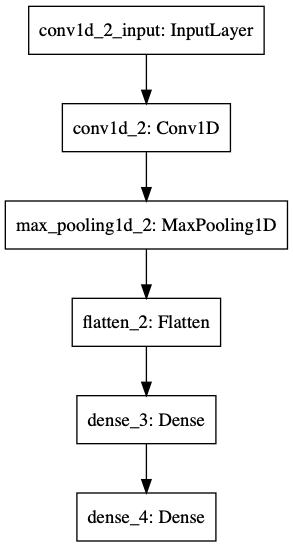

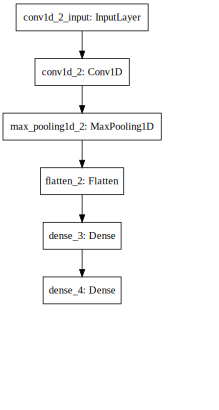

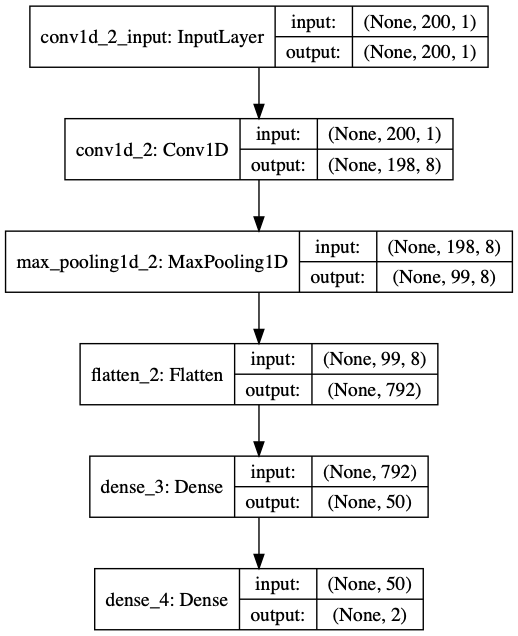

['(None', ' 200', ' 1)'] 200


In [78]:
#Nomb_Input = 200
#fil_M = 32    # 512-256-128-64-32 ?
filtre = 8
kernel = 3
epochs = 10   #. 10-20-30-50
batch_size = 10  # 128  nombre d'échantillon à chaque cycle
n_dens = 50  # 50 - 100 ou 200?

num_class = 2   # ou ce
max_pool1 = 2  # 2 en général   params = 158k (2)   et =   (1)

# redimensionnement nécesaire pour la convolution
train_1d = np.expand_dims(train_1d0, axis=2)
# ou ? train_data.reshape(train_1d.shape[0], train_1d.shape[1], 1)  et input_shape=(train_1d.shape[1], 1)
test_1d = np.expand_dims(test_1d0, axis=2)

def build_cnn_model_1D():
    model = Sequential()
    # kernel_initializer = "uniform" , input_dim=N
    model.add(Conv1D(filtre, kernel, activation='relu', input_shape=(train_1d.shape[1],train_1d.shape[2])))
    model.add(MaxPooling1D(pool_size=max_pool1))
    #model.add(Dropout(0.5))
    #model.add(Conv1D(64, kernel, activation='relu'))
    #model.add(MaxPooling1D(pool_size=(2)))
    # model.add(BatchNormalization())
    model.add(Flatten())        
    model.add(Dense(n_dens, activation='relu'))
    model.add(Dense(num_class, activation='sigmoid'))
    return model

model_1d = build_cnn_model_1D()

model_1d.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
###
### model.save_weights('file.h5')  avec le model construit + les poids    model.load_weights('file.h5')
model_1d.summary()
history0 = model_1d.fit(train_1d, train_1d_label, validation_split=0.33, verbose=2, epochs=epochs, batch_size=batch_size)
pxls = str(model_1d.layers[0].input_shape).split(',')

### from keras.utils.vis_utils import plot_model
### from keras.utils import plot_model
keras.utils.vis_utils.pydot = pydot
plot_model(model_1d)

# direct plot
SVG(model_to_dot(model_1d).create(prog='dot', format='svg'))
# to file
plot_model(model_1d, to_file=DATA_DIR8 + "model_1D.png", show_shapes=True,
        show_layer_names=True, expand_nested=False, dpi=100)

print(pxls, int(pxls[1][1:]))
ann_viz(model_1d, filename=DATA_DIR8 + "model_1D.gv", title="modele: 1D")

### A TESTER
classifier = KerasClassifier(build_fn = model_1d, batch_size=128, nb_epoch=1)
print(classifier)
accuracies = cross_val_score(estimator = classifier,X = train_1d,y = train_1d_label,cv = 10,n_jobs = -1)
mean = accuracies.mean()
variance = accuracies.var()
print(mean, variance)

### Figures

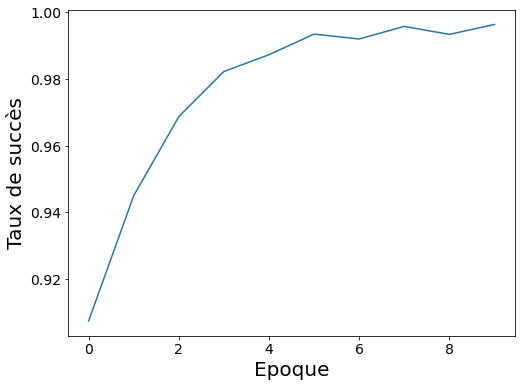

In [79]:
#history0 = history0b
#history0.history
# plot metrics
test = False
fig = plt.figure(figsize=(8,6))
if test:
    _ = plt.plot(history0.history['msle'])
    _ = plt.plot(history0.history['mean_squared_error'])
    _ = plt.plot(history0.history['binary_accuracy'])
    _ = plt.plot(history0.history['categorical_accuracy'])
_ = plt.plot(history0.history['accuracy'])
_ = plt.ylabel('Taux de succès',fontsize=20)
_ = plt.xlabel('Epoque',fontsize=20)
_ = plt.xticks(fontsize=14)
_ = plt.yticks(fontsize=14)
plt.savefig(DATA_DIR8 +"fig1D_hist_" + str(mult1d) + ".png")
_ = plt.show()


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
0.9839422702789307
0.99633175
0.07679193634552026
0.017629186938220322


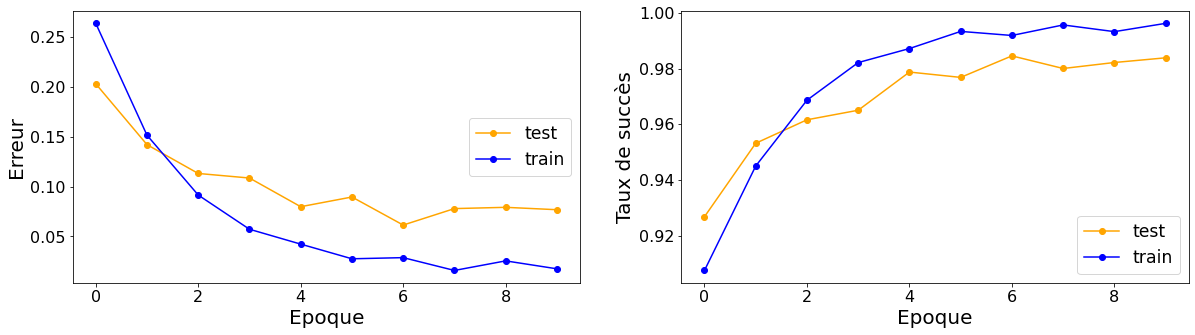

In [80]:
print(history0.history.keys())
#coul = ["blue", "lightblue", "orange", "red"]
coul = ["orange", "orange", "blue", "blue"]    
print(history0.history['val_accuracy'][-1])
print(history0.history['accuracy'][-1])
print(history0.history['val_loss'][-1])
print(history0.history['loss'][-1])

fig = plt.figure(figsize=(20,5))
_ = plt.subplot(1,2,1)
_ = plt.xlabel('Epoque',fontsize=20)
_ = plt.ylabel('Erreur',fontsize=20)
for i in range(0,4,2):
    _ = plt.plot(list(history0.history.values())[i],'k-o', color=coul[i])
    _ = plt.legend(['test','train'], loc='center right', fontsize="xx-large")
_ = plt.xticks(fontsize=16)
_ = plt.yticks(fontsize=16)
# plot.legend(loc=2, prop={'size': 6})
#plt.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large")                   
# using a named size xx-small x-small small medium large x-large xx-large
                   
_ = plt.subplot(1,2,2)
_ = plt.xlabel('Epoque',fontsize=20)
_ = plt.ylabel('Taux de succès',fontsize=20)
for j in range(1,4,2):
    _ = plt.plot(list(history0.history.values())[j],'k-o', color=coul[j])
#    _ = plt.legend(['test','train'], loc='upper left', fontsize="xx-large")
    _ = plt.legend(['test','train'], loc='lower right', fontsize="xx-large")
_ = plt.xticks(fontsize=16)
_ = plt.yticks(fontsize=16)

plt.savefig(DATA_DIR8 +"fig1D_LossAcc1_" + str(mult1d) + ".png")


Test loss: 0.06356271250923914
Test accuracy: 0.9849485754966736
[0 1 1 0 0 0 1 0 0 0]
[0. 1. 1. 0. 0. 0. 1. 0. 0. 0.]


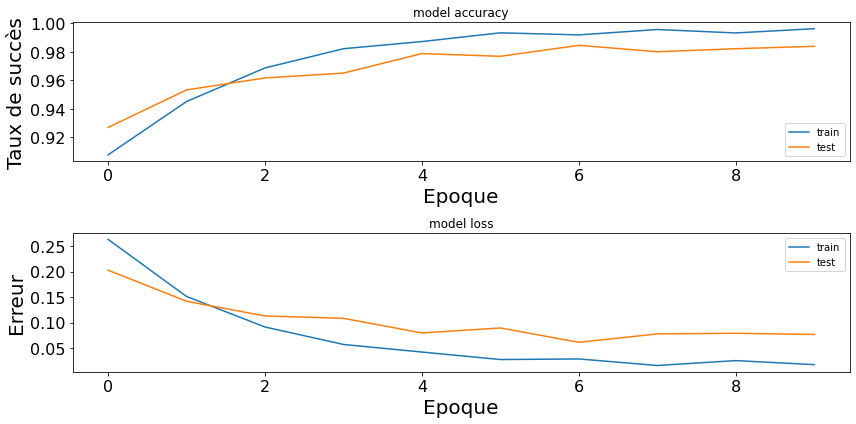

In [81]:
# RESULTATS
score = model_1d.evaluate(test_1d, test_1d_label, verbose=0, batch_size=batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# predictions
classes = model_1d.predict(test_1d, batch_size=batch_size)
predictions = model_1d.predict(test_1d[:10])
print(np.argmax(predictions, axis=1))
print(test_1d_label[:10,1])

# PLOTS
fig = plt.figure(figsize=(12,6))
_ = plt.subplot(2,1,1)
_ = plt.plot(history0.history['accuracy'])
_ = plt.plot(history0.history['val_accuracy'])
_ = plt.title('model accuracy')
_ = plt.ylabel('Taux de succès',fontsize=20)
_ = plt.xlabel('Epoque',fontsize=20)
_ = plt.xticks(fontsize=16)
_ = plt.yticks(fontsize=16)
_ = plt.legend(['train','test'], loc='lower right')
#
_ = plt.subplot(2,1,2)
_ = plt.plot(history0.history['loss'])
_ = plt.plot(history0.history['val_loss'])
_ = plt.title('model loss')
_ = plt.ylabel('Erreur',fontsize=20)
_ = plt.xlabel('Epoque',fontsize=20)
_ = plt.xticks(fontsize=16)
_ = plt.yticks(fontsize=16)
_ = plt.legend(['train','test'], loc='upper right')
_ = plt.tight_layout()
_ = fig

plt.savefig(DATA_DIR8 +"fig1D_LossAcc2_" + str(mult1d) + ".png")


### Matrice de Confusion

In [82]:
def mse_loss(y_true, y_pred):
    # y_true and y_pred are numpy arrays of the same length.
    return ((y_true - y_pred) ** 2).mean()

def tab_result(df_a, df_b, model):
    # Extrait les matrices binaires en 1 seule colonne
    y_pred = pd.DataFrame(model.predict(df_b)[:,1:])
    y_true = pd.DataFrame(df_a[:,1:])
    # création de la table
    dy = y_true.merge(y_pred, left_index=True, right_index=True, suffixes=('_true', '_pred'))
    dy['0_true'] = dy['0_true'].astype(int)
    dy['0_pred2'] = dy['0_pred'].round(0)   #arrondi à l'entier le + proche
    dy['diff'] = dy['0_true'] - dy['0_pred2']
    return dy

def lampe_results(df1, df2):
    df_10 = df1[df1['0_true'] == 0]
    df_11 = dy1[dy1['0_true'] == 1]
    df_20 = df2[df2['0_true'] == 0]
    df_21 = dy2[dy2['0_true'] == 1]
    return (df_10, df_11, df_20, df_21)

#####################################
# sensitivity-recall : TPR = TP/P = TP / (TP + FN)
# specificity-select : TNR = TN/N = TN / (TN + FP)
# balance : = (TPR + TNR) / 2
# precision          : TP / (TP + FP)

# accuracy    : ACC = (TP + TN) / total
# FI score    :  2 * TP / (2 TP + FP + FN) == 2 / (1/precision + 1/recall)


 Echantillon Test: 6511
[[5722   85]
 [  13  691]]

 Echantillon Train: 26041
[[23096   129]
 [   47  2769]]

 Normalisé:
Prédit       0.0       1.0
Reel                      
0.0     0.985362  0.120739
1.0     0.002239  0.981534

 testing1:
Predit   0.0  1.0   All
Reel                   
0.0     5722   85  5807
1.0       13  691   704
All     5735  776  6511


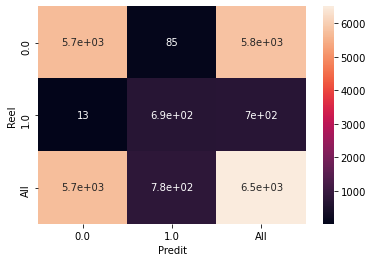


 testing2:
Predit       0.0       1.0  All
Reel                           
0.0     0.492681  0.007319  0.5
1.0     0.009233  0.490767  0.5
All     0.440409  0.059591  0.5


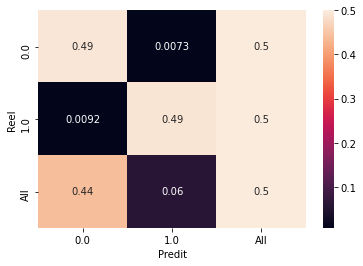


 LOSS 0.01505145138995546
[5722   85   13  691]


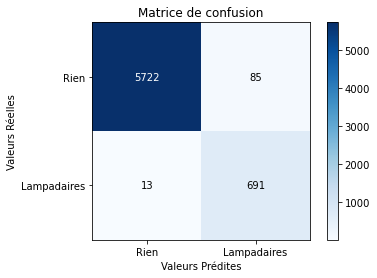

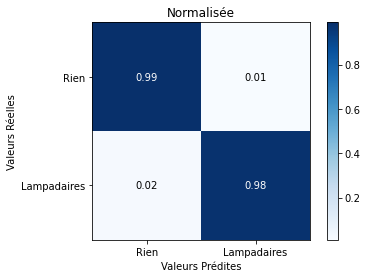

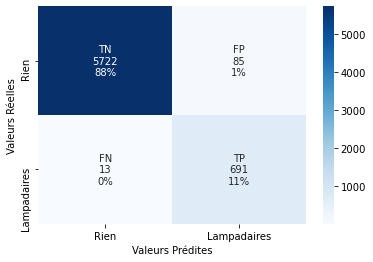

In [83]:
# transforme les matrice en listes d'entiers binaires (0 ou 1)
Y11 = pd.DataFrame(model_1d.predict(test_1d)[:,1:])[0].round(0).tolist()
Y10 = pd.DataFrame(test_1d_label[:,1:])[0].tolist()
print("\n Echantillon Test:", len(Y11))
print(confusion_matrix(Y10, Y11))
Y01 = pd.DataFrame(model_1d.predict(train_1d)[:,1:])[0].round(0).tolist()
Y00 = pd.DataFrame(train_1d_label[:,1:])[0].tolist()
print("\n Echantillon Train:", len(Y01))
print(confusion_matrix(Y00, Y01))
y_reel = pd.Series(Y10, name='Reel')
y_pred = pd.Series(Y11, name='Prédit')
df_confusion = pd.crosstab(y_reel, y_pred)
df_conf_norm = df_confusion / df_confusion.sum(axis=1)
print("\n Normalisé:")
print(df_conf_norm)
print("\n testing1:")

df_confusion = pd.crosstab(y_reel, y_pred, rownames=['Reel'], colnames=['Predit'], margins=True)
print(df_confusion)
_ = sns.heatmap(df_confusion, annot=True)
plt.show()

df_conf_norm = df_confusion.div(df_confusion.sum(axis=1), axis=0)
print("\n testing2:")
print(df_conf_norm)
_ = sns.heatmap(df_conf_norm, annot=True)
plt.show()
#skplt.metrics.plot_confusion_matrix(y_reel, y_pred, figsize=(5,5))

dy1 = tab_result(test_1d_label, test_1d, model_1d)
dy2 = tab_result(train_1d_label, train_1d, model_1d)
#dy1.head(2)
#dy2.head(2)
df_test_1, df_test_0, df_train_1, df_train_0 = lampe_results(dy1, dy2)

#print(dy1.shape, dy2.shape)
#print(df_test_1.shape, df_test_0.shape, df_train_1.shape, df_train_0.shape)
#print(df_test_0.describe())
true_pos1 = df_test_1[(df_test_1['0_pred2'] == 1) & (df_test_1['0_true'] == 1)].sum()
fals_pos1 = df_test_1[(df_test_1['0_pred2'] == 1) & (df_test_1['0_true'] == 0)].sum()
fals_neg1 = df_test_1[(df_test_1['0_pred2'] == 0) & (df_test_1['0_true'] == 1)].sum()
true_neg1 = df_test_1[(df_test_1['0_pred2'] == 0) & (df_test_1['0_true'] == 0)].sum()
#print("\n ERREURS:", true_pos1, fals_pos1, fals_neg1, true_neg1)
#####################################
# calcul pour LOSS du Mean Squared Error
print("\n LOSS", mse_loss(y_reel, y_pred))
######################################################################
#### Essai pour obtenir une belle matrice de confusion 
#cm_fig = interp.plot_confusion_matrix(return_fig=True)
#ax = cm_fig.gca()
#ax.set_ylim(interp.data.c - .5, - .5)
######################################################################
cf_matrix = confusion_matrix(y_reel, y_pred)
print(cf_matrix.flatten())

ax1 = plt.subplot()
_ = skplt.metrics.plot_confusion_matrix(y_reel, y_pred, ax = ax1, figsize=(5,5))
_ = ax1.set_title('Matrice de confusion')
_ = ax1.set_xlabel('Valeurs Prédites')
_ = ax1.set_ylabel('Valeurs Réelles'); 
_ = ax1.xaxis.set_ticklabels(['Rien', 'Lampadaires'])
_ = ax1.yaxis.set_ticklabels(['Rien', 'Lampadaires'])
plt.savefig(DATA_DIR8 +"fig1D_matConf1_" + str(mult1d) + ".png")
plt.show()

ax2 = plt.subplot()
#, xticks_rotation='vertical'
_ = skplt.metrics.plot_confusion_matrix(y_reel, y_pred, ax = ax2, figsize=(5,5), normalize=True)
#_ = sns.heatmap(cf_matrix, ax = ax2)
_ = ax2.set_title('Normalisée')
_ = ax2.set_xlabel('Valeurs Prédites')
_ = ax2.set_ylabel('Valeurs Réelles'); 
_ = ax2.xaxis.set_ticklabels(['Rien', 'Lampadaires'])
_ = ax2.yaxis.set_ticklabels(['Rien', 'Lampadaires'])
plt.savefig(DATA_DIR8 +"fig1D_matConf2_" + str(mult1d) + ".png")
plt.show()

group_names = ["TN","FP","FN","TP"]
#group_names = ["Vrai Neg","Faux Pos","Faux Neg","Vrai Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.0%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
# labels, title and ticks
ax3 = plt.subplot()
_ = sns.heatmap(cf_matrix, annot=labels, ax = ax3, fmt="", cmap='Blues')
_ = ax3.set_xlabel('Valeurs Prédites')
_ = ax3.set_ylabel('Valeurs Réelles'); 
_ = ax3.xaxis.set_ticklabels(['Rien', 'Lampadaires'])
_ = ax3.yaxis.set_ticklabels(['Rien', 'Lampadaires'])
plt.savefig(DATA_DIR8 +"fig1D_matConf3_" + str(mult1d) + ".png")
plt.show()         

# KERAS :  images bi-dimensionelles

In [196]:

def mse_loss(y_true, y_pred):
    # y_true and y_pred are numpy arrays of the same length.
    return ((y_true - y_pred) ** 2).mean()

def lampe_results(df1, df2):
    df_10 = df1[df1['0_true'] == 0]
    df_11 = dy1[dy1['0_true'] == 1]
    df_20 = df2[df2['0_true'] == 0]
    df_21 = dy2[dy2['0_true'] == 1]
    return (df_10, df_11, df_20, df_21)

## Lecture des 3 fichiers de données

In [197]:
# mult = 1  # 0 ou autres ???
fichier1  = DATA_DIR9 + "dataDalles/data_LAS_nom_NUM_" + str(off) + "_" + str(mult) + ".npy"
data1     = np.load(fichier1)
fichier2  = DATA_DIR9 + "dataDalles/data_LAS_nom_ECA_" + str(off) + "_" + str(mult) + ".npy"
data2     = np.load(fichier2)
fichierY  = DATA_DIR9 + "dataDalles/data_LAS_nom_POS_" + str(off) + "_" + str(mult) + ".npy"
data9     = np.load(fichierY)
#print(type(data1), type(data2))
#if ((data1.shape[0] - data2.shape[0] != 0):
if ((data1.shape[0] - data2.shape[0] != 0) and (data1.shape[0] - data34.shape[0] != 0)):
    print(data1.shape, data2.shape, data9.shape)
else:
    print(data1.shape)
# concatenation de NUM avec ECA et POS
data14 = tf.expand_dims(data1, 3)
data24 = tf.expand_dims(data2, 3)
data34 = tf.expand_dims(data9, 3)
#print(data14.shape,data24.shape, data34.shape)

data_2d = tf.concat([data14, data24], 3)
#data_2d = tf.concat([data14, data24, data34], 3)
taille = data_2d.shape[0]
data_y   = np.load(fichierY).reshape(taille,100)
print("\n Fichiers utilisés:\n", fichier1, "\n", fichier2, "\n", fichierY)
print("Classification utiliseé:\n", fichierY, "\n")
print(data_2d.shape, taille, data_y.shape)

(36072, 10, 10)

 Fichiers utilisés:
 /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/data_LAS_nom_NUM_29384_4.npy 
 /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/data_LAS_nom_ECA_29384_4.npy 
 /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/data_LAS_nom_POS_29384_4.npy
Classification utiliseé:
 /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/data_LAS_nom_POS_29384_4.npy 

(36072, 10, 10, 2) 36072 (36072, 100)


In [198]:
# somme sur toutes les rangées ou colonnes   
# présence de valeurs SUPERIEURES A 1 (3 valeurs à 2 ! pourquoi ?????)
df_Y = pd.DataFrame(data_y)
df_Y['lamp'] = df_Y.sum(axis=1)
df_Y['lamp2'] = df_Y[:-1].sum(axis=0)
zeros = df_Y[df_Y['lamp'] == 0]
uns   = df_Y[df_Y['lamp'] == 1]
plus  = df_Y[df_Y['lamp'] > 1]
print(df_Y.shape, df_Y['lamp'].sum())
print("Valeurs à:  0   1   ou plus)")
print(df_Y.shape[0], len(zeros), len(uns), len(plus))
#  Ecrase les valeurs de 2  ... pour avoir des 0 ou des 1
df_Y.loc[df_Y['lamp'] > 1] = 1
uns2   = df_Y[df_Y['lamp'] == 1]
plus2  = df_Y[df_Y['lamp'] > 1]
print("Valeurs à: 0 ou 1)")
print(df_Y.shape[0], len(zeros), len(uns2), len(plus2))
#df_Y[df_Y['lamp'] == 2]

(36072, 102) 7112.0
Valeurs à:  0   1   ou plus)
36072 29036 6960 76
Valeurs à: 0 ou 1)
36072 29036 7036 0


In [199]:
print(df_Y.shape)
df_Y.head(1)


(36072, 102)


0    1    2    3    4    5    6    7    8    9   10   11   12   13   14  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   ...   87   88   89   90   91   92   93   94   95   96   97   98   99  lamp  \
0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   

   lamp2  
0  136.0  

[1 rows x 102 columns]

In [200]:
print(lampes1.shape)
lampes1b.head(1)

(40000, 9)


present  NumI  NumY  NumX        X        Y  \
52        1    52    52     0  2042500  7272260   

                            nom_NUM                       nom_ECA  \
52  2042500_7272260_NumPoints5m.tif  2042500_7272260_EcartZ5m.tif   

                           nom_POS  
52  2042500_7272260_Position5m.tif

In [201]:
# PAS LE MEME INDEXAGE (sur 40000 et 29384 + )
# lampes1 autre DataFrame avec les indice de présence des lampadaires ... CORRECTS ? ... pas cohérent
df_tot = df_Y.merge(lampes1, left_index=True, right_index=True)
df_tot['diff'] = df_tot['lamp'] - df_tot['present']
print(df_tot.shape, lampes1.shape,df_Y.shape )
test = True
if test:
    print("diff =  2:", df_tot[df_tot['diff'] ==  2].count(axis=0)[0])
    print("diff =  1:", df_tot[df_tot['diff'] ==  1].count(axis=0)[0])
    print("diff =  0:", df_tot[df_tot['diff'] ==  0].count(axis=0)[0])
    print("diff = -1:", df_tot[df_tot['diff'] == -1].count(axis=0)[0])
    print("diff = -2:", df_tot[df_tot['diff'] == -2].count(axis=0)[0])
df_tot['diff'].describe()


(36072, 112) (40000, 9) (36072, 102)
diff =  2: 0
diff =  1: 6951
diff =  0: 28881
diff = -1: 240
diff = -2: 0


count    36072.000000
mean         0.186045
std          0.405886
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: diff, dtype: float64

In [202]:
df_tot[df_tot['diff'] == -1]


0    1    2    3    4    5    6    7    8    9   10   11   12   13  \
52     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
92     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
170    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
249    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
281    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
28858  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
28859  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
28867  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
28871  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
28873  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

        14  ...   97   98   99  lamp  lamp2  present   NumI  NumY  NumX  \
52     0.0  ...  0.0  0.0  0.0   0.0   68.0        1     52    52     0   
92     0.0  ...  0.0  0.0  0.0   0.0   64.0        1     92    92     0   
170    0.0  ...  0.0  0.0  0.0   0.0    NaN        1    170   170     0   
249    0.0  ...  0.0  0.0  0.0   0.0    NaN        1    249    49     1   
281    0.0  ...  0.0  0.0  0.0   0.0    NaN        1    281    81     1   
...    ...  ...  ...  ...  ...   ...    ...      ...    ...   ...   ...   
28858  0.0  ...  0.0  0.0  0.0   0.0    NaN        1  28858    58   144   
28859  0.0  ...  0.0  0.0  0.0   0.0    NaN        1  28859    59   144   
28867  0.0  ...  0.0  0.0  0.0   0.0    NaN        1  28867    67   144   
28871  0.0  ...  0.0  0.0  0.0   0.0    NaN        1  28871    71   144   
28873  0.0  ...  0.0  0.0  0.0   0.0    NaN        1  28873    73   144   

             X        Y                          nom_NUM  \
52     2042500  7272260  2042500_7272260_NumPoints5m.tif   
92     2042500  7272460  2042500_7272460_NumPoints5m.tif   
170    2042500  7272850  2042500_7272850_NumPoints5m.tif   
249    2042505  7272245  2042505_7272245_NumPoints5m.tif   
281    2042505  7272405  2042505_7272405_NumPoints5m.tif   
...        ...      ...                              ...   
28858  2043220  7272290  2043220_7272290_NumPoints5m.tif   
28859  2043220  7272295  2043220_7272295_NumPoints5m.tif   
28867  2043220  7272335  2043220_7272335_NumPoints5m.tif   
28871  2043220  7272355  2043220_7272355_NumPoints5m.tif   
28873  2043220  7272365  2043220_7272365_NumPoints5m.tif   

                            nom_ECA                         nom_POS  diff  
52     2042500_7272260_EcartZ5m.tif  2042500_7272260_Position5m.tif  -1.0  
92     2042500_7272460_EcartZ5m.tif  2042500_7272460_Position5m.tif  -1.0  
170    2042500_7272850_EcartZ5m.tif  2042500_7272850_Position5m.tif  -1.0  
249    2042505_7272245_EcartZ5m.tif  2042505_7272245_Position5m.tif  -1.0  
281    2042505_7272405_EcartZ5m.tif  2042505_7272405_Position5m.tif  -1.0  
...                             ...                             ...   ...  
28858  2043220_7272290_EcartZ5m.tif  2043220_7272290_Position5m.tif  -1.0  
28859  2043220_7272295_EcartZ5m.tif  2043220_7272295_Position5m.tif  -1.0  
28867  2043220_7272335_EcartZ5m.tif  2043220_7272335_Position5m.tif  -1.0  
28871  2043220_7272355_EcartZ5m.tif  2043220_7272355_Position5m.tif  -1.0  
28873  2043220_7272365_EcartZ5m.tif  2043220_7272365_Position5m.tif  -1.0  

[240 rows x 112 columns]

In [203]:
df_Y.describe()


0             1             2             3             4  \
count  36072.000000  36072.000000  36072.000000  36072.000000  36072.000000   
mean       0.005766      0.004990      0.003881      0.003659      0.003327   
std        0.075718      0.070465      0.062179      0.060383      0.057582   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                  5             6             7             8             9  \
count  36072.000000  36072.000000  36072.000000  36072.000000  36072.000000   
mean       0.003105      0.003881      0.003992      0.003548      0.005655   
std        0.055636      0.062179      0.063057      0.059464      0.074990   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 10            11            12            13            14  \
count  36072.000000  36072.000000  36072.000000  36072.000000  36072.000000   
mean       0.003216      0.003992      0.003548      0.003770      0.003992   
std        0.056617      0.063057      0.059464      0.061287      0.063057   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ...            87            88            89            90  \
count  ...  36072.000000  36072.000000  36072.000000  36072.000000   
mean   ...      0.003548      0.003659      0.003659      0.005544   
std    ...      0.059464      0.060383      0.060383      0.074255   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      1.000000      1.000000      1.000000      1.000000   

                 91            92            93            94            95  \
count  36072.000000  36072.000000  36072.000000  36072.000000  36072.000000   
mean       0.003327      0.003881      0.004103      0.003659      0.003548   
std        0.057582      0.062179      0.063923      0.060383      0.059464   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 96            97            98            99          lamp  \
count  36072.000000  36072.000000  36072.000000  36072.000000  36072.000000   
mean       0.003992      0.003548      0.005323      0.005101      0.195054   
std        0.063057      0.059464      0.072763      0.071239      0.396248   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000    

### Séparation Train - Test 

In [204]:
y = df_Y[["lamp"]]
y_binary = to_categorical(y)

len0 = df_Y[df_Y['lamp'] == 0].shape[0]
len1 = df_Y.shape[0] - len0

len01 = int(len0*0.8)
len11 = int(len1*0.8)
len02 = len0+len11

df_test = pd.DataFrame(y_binary)
print(len0, len1, y.shape, y_binary.shape, df_test.shape)

print(0, len01, " -", len0, len02, len01, len02-len0)
print(len01, len0, " -", len02, len0+len1, len0-len01, len0+len1-len02)

29036 7036 (36072, 1) (36072, 2) (36072, 2)
0 23228  - 29036 34664 23228 5628
23228 29036  - 34664 36072 5808 1408


In [205]:
#########   problemes d'arrondis   ????  #######
#### pas le meme nombre de lignes pour les 2 manières différentes d'extraire les lignes  ????
#y0 = df_testY.iloc[:int(len0*0.8),len0:len0+int(len1*0.8)]
#y1 = df_testY.iloc[int(len0*0.8):len0,len0+int(len1*0.8):len0+len1]
df_testY = pd.DataFrame(y_binary)
#
y0a = df_test.iloc[:len01,:]
y0b = df_test.iloc[len0:len02,:]
y0  = pd.concat([y0a, y0b])  # Dimension 3  #y0  = pd.concat(y0a, y0b)
#
y1a = df_test.iloc[len01:len0,:]   
y1b = df_test.iloc[len02:len0+len1,:]   
y1  = pd.concat([y1a, y1b])  # Dimension 3  #y1  = pd.concat(y1a, y1b)

# Probleme de dimensions des Y à prédire
print(y.shape, y0.shape, y1.shape)
#y0 = to_categorical(y0)
#y1 = to_categorical(y1)
print(len(y0[1]), len(y1[1]))

data_2d0a = data_2d[     :len01]
data_2d0b = data_2d[len0 :len02]
data_2d1a = data_2d[len01:len0 ]
data_2d1b = data_2d[len02:]
print(data_2d0a.shape, data_2d0b.shape,data_2d1a.shape, data_2d1b.shape)

#data_x0 = np.concatenate(data_x0a, data_x0b, axis=1)
data_2d0 = tf.keras.backend.concatenate((data_2d0a, data_2d0b), axis=0)
data_2d1 = tf.keras.backend.concatenate((data_2d1a, data_2d1b), axis=0)
print(data_2d0.shape,data_2d1.shape)


(36072, 1) (28856, 2) (7216, 2)
28856 7216
(23228, 10, 10, 2) (5628, 10, 10, 2) (5808, 10, 10, 2) (1408, 10, 10, 2)
(28856, 10, 10, 2) (7216, 10, 10, 2)


In [206]:
# Charge et split les données
###############   TODO      ###############
####### fonctionne avec les 2 cubes/images 
X2d = data_2d
####### Si ne fonctionne pas avec les 2 cubes/images 
# X = data1
print("Dimensions X:", X2d.shape)
##############################################
#####   calcul de la position de la lampe dans le carré N
###  Passage mode binaire à une liste de 100
############
# Manière 1 de 
y2d = liste_y   # y2d = data_y
# Manière 2 ... directe à partir des 3 mêmes fichiers 10x10
y2d = df_Y[["lamp"]]
y2d_binary = to_categorical(y2d, dtype='int')
#y_binary = to_categorical(y, num_classes=2, dtype='int')
# print(y2d.shape)
#############################
#y2d_binary

print("Dimensions Y:", y2d_binary.shape, len(y), y0.shape, y1.shape)


Dimensions X: (36072, 10, 10, 2)
Dimensions Y: (36072, 2) 36072 (28856, 2) (7216, 2)


In [207]:


# tfds   tensorflow dataset splitting
# test_split, valid_split, train_split = tfds.Split.TRAIN.subsplit([10, 15, 75])
# PYTORCH   torchtext.data.Dataset
# split(split_ratio=0.7, stratified=False, strata_field='label', random_state=None

methode = 'test'
#methode = 'SKLEARN'

if methode == 'SKLEARN':
    train_data, test_data, train_labels, test_labels = train_test_split(
        X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
#        X, y, test_size=0.2, random_state=42, stratify=y)
    
if methode == 'test':
    train_data, test_data     = (data_2d0, data_2d1)
    train_labels, test_labels = (y0, y1)

#print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)
print("Train et Test:", train_data.shape, len(train_labels), test_data.shape, len(test_labels))

#train_data = np.expand_dims(train_data, axis=3)
#test_data = np.expand_dims(test_data, axis=3)

#### Ce n'est plus nécessaire si X est un Tenseur 4D
#train_data = train_data.reshape(train_data.shape[0], 10, 10, 1)
#test_data  = test_data.reshape(test_data.shape[0], 10, 10, 1)

#print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)
print(train_data.shape, len(train_labels), test_data.shape, len(test_labels))
print(y0.shape, y1.shape)

Train et Test: (28856, 10, 10, 2) 28856 (7216, 10, 10, 2) 7216
(28856, 10, 10, 2) 28856 (7216, 10, 10, 2) 7216
(28856, 2) (7216, 2)


## Modèles CNN 2D

### tensorboard plot diagramme   ou tikz in latex

In [208]:
print(train_data.shape, train_labels.shape, df_Y.shape, y_binary.shape, len(y))

# 2) Train CONVNET on the MNIST dataset
dim = len(keras.backend.int_shape(train_data))
if dim == 2:
    input_shape = (10, 10)
if dim == 4:
    input_shape = (10, 10, 2)
    # input_shape = (10, 10, 1)
    # steps PROBLEMES si différent de 1 pour les derniers plots
    
batch_size  = 1    # 64 
ratio       = len(liste_y1) / len(liste_y2)
ratio       = 10 * 20000 / 70
poids_class = {0: 1., 1: ratio}

##############################################################
modele = 1    #  1 .... 4
##############################################################
# (epoque*steps) = Cte ???  à plus de 800 pour le moment
#  Meilleur si les 2 sont comparables
##############################################################
epochs = 200    # 30 à 50 ou 120-150-200 ???
steps  = 40     # 2-5-10-20-40
print("Dimension:", dim, " et modèle:", modele, epochs, steps)
##############################################################
filt      = 3    # 5
filters   = (filt, filt)
strides   = (1,1)
pool_size = (2,2)   # pour MaxPooling2D, stride=NONE ==> strides=2,2
cv2d  = 16          # 6-16 ; 16-32 - ????
drop  = 0.1         # 0.5
dens1 = 128         # 100-120
dens2 = 64         # 100
activ0 = "relu"     #  'relu' , 'sigmoid', softmax' 
if modele >= 5:
    activ0 = "sigmoid"
# Couches cachées:         sigmoid ou Relu
# REGRESSION:              lineaire Identite
# CLASSIFICATION binaire:  sigmoid
# CLASSIFICATION multi:    softmax
activ  = "sigmoid"   #  ou softmax'  
############################################################## 
def build_cnn_model(mod):
    cv2d0 = 6; m1=1; m2=1; 
    if mod >= 2:
        m1=2
#        if mod > 2:
#            cv2d0=cv2d; 
    if mod == 11: cv2d0 = 10
    if mod == 3: m2=2
    if mod == 4: m2=3
    print("Modele:", mod,mult,cv2d0,cv2d, drop, dens1, dens2, filt, strides, pool_size)
    model = Sequential();
    for n in range(1,m1+1):   # 2x  modeles 2 - 3 - 4
#        model.add(Conv2D(cv2d0 , filters, padding="same", strides=strides, input_shape=input_shape, activation=activ0))
        model.add(Conv2D(cv2d0, filters, padding="same", strides=strides, input_shape=input_shape, activation=activ0))
    model.add(MaxPooling2D(pool_size=pool_size))
    for n in range(1,m2+1):
#        model.add(Conv2D(m1*cv2d, filters, padding="same", strides=strides, activation=activ0))
        model.add(Conv2D(cv2d, filters, padding="same", strides=strides, activation=activ0))
    model.add(MaxPooling2D(pool_size=pool_size))
    model.add(Flatten())
    model.add(Dense(dens1, activation=activ0))
    model.add(Dropout(drop))
    model.add(Dense(dens2, activation=activ0))
    model.add(Dropout(drop))
    model.add(Dense(2, activation=activ))
    return model
    
model2 = build_cnn_model(modele)
    
#model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(),
#              metrics=['accuracy'])
model2.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adadelta(),
#model2.compile(loss=keras.losses.mse, optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

###  si TENSOR = 2D
if dim == 2:
    history2 = model2.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, 
                          class_weight=poids_class,  # ou   'balanced'
          verbose=1, validation_data=(test_data, test_labels))   # validation_split=0.25
    score = model2.evaluate(test_data, test_labels, verbose=0)
elif dim == 4:
###    history2 = model2.fit_generator(train_data, train_labels, verbose=1)      
    history2 = model2.fit(train_data, train_labels, epochs=epochs, verbose=1, 
###                          # batch_size, class_weight=poids_class,   #  ValueError:  NOT supported for 3+ dimensional targets
                        validation_freq=.33, steps_per_epoch=steps)   #steps_per_epoch=2
    score = model2.evaluate(test_data, test_labels, steps=3, verbose=0)
else:
    print("WRONG tensor dimension inputs ....")

print("score total:", score)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

ann_viz(model2, filename=DATA_DIR8 + "model_2D.gv", title="modele: 2D"+str(modele))

(28856, 10, 10, 2) (28856, 2) (36072, 102) (36072, 2) 36072
Dimension: 4  et modèle: 1 200 40
Modele: 1 4 6 16 0.1 128 64 3 (1, 1) (2, 2)
Epoch 1/200
40/40 [==============================] - 36s 899ms/step - loss: 0.5517 - accuracy: 0.7938
Epoch 2/200
40/40 [==============================] - 32s 800ms/step - loss: 0.4621 - accuracy: 0.8114
Epoch 3/200
40/40 [==============================] - 30s 742ms/step - loss: 0.4143 - accuracy: 0.8209
Epoch 4/200
40/40 [==============================] - 30s 748ms/step - loss: 0.3853 - accuracy: 0.8325
Epoch 5/200
40/40 [==============================] - 30s 759ms/step - loss: 0.3647 - accuracy: 0.8429
Epoch 6/200
40/40 [==============================] - 29s 720ms/step - loss: 0.3499 - accuracy: 0.8506
Epoch 7/200
40/40 [==============================] - 30s 760ms/step - loss: 0.3385 - accuracy: 0.8562
Epoch 8/200
40/40 [==============================] - 36s 910ms/step - loss: 0.3297 - accuracy: 0.8609
Epoch 9/200
40/40 [===========================

40/40 [==============================] - 28s 710ms/step - loss: 0.0157 - accuracy: 0.9951
Epoch 159/200
40/40 [==============================] - 27s 680ms/step - loss: 0.0159 - accuracy: 0.9951
Epoch 160/200
40/40 [==============================] - 27s 682ms/step - loss: 0.0165 - accuracy: 0.9948
Epoch 161/200
40/40 [==============================] - 27s 678ms/step - loss: 0.0420 - accuracy: 0.9865
Epoch 162/200
40/40 [==============================] - 27s 680ms/step - loss: 0.0148 - accuracy: 0.9955
Epoch 163/200
40/40 [==============================] - 27s 684ms/step - loss: 0.0145 - accuracy: 0.9955
Epoch 164/200
40/40 [==============================] - 27s 681ms/step - loss: 0.0146 - accuracy: 0.9954
Epoch 165/200
40/40 [==============================] - 27s 678ms/step - loss: 0.0144 - accuracy: 0.9956
Epoch 166/200
40/40 [==============================] - 27s 679ms/step - loss: 0.0154 - accuracy: 0.9952
Epoch 167/200
40/40 [==============================] - 27s 678ms/step - loss: 

### Sommaire

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 10, 10, 6)         114       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 6)           0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 5, 5, 16)          880       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)             

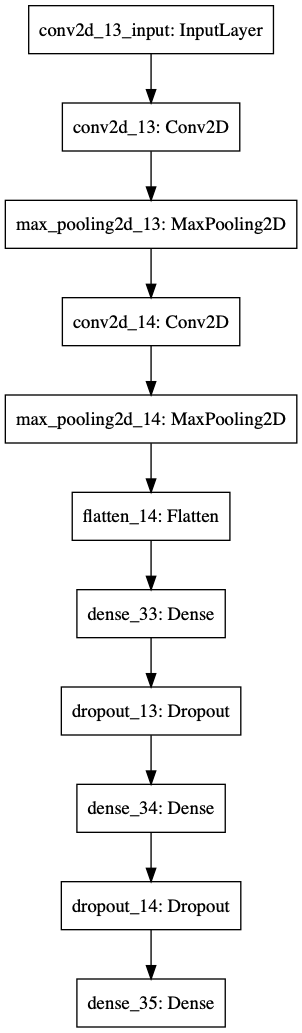

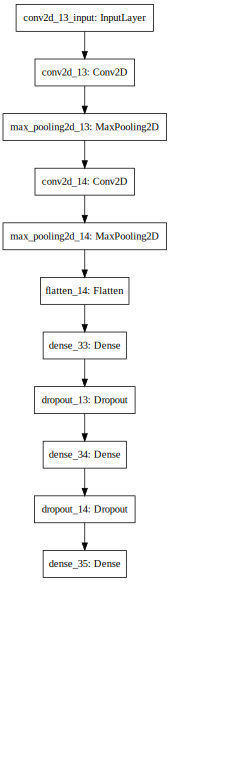

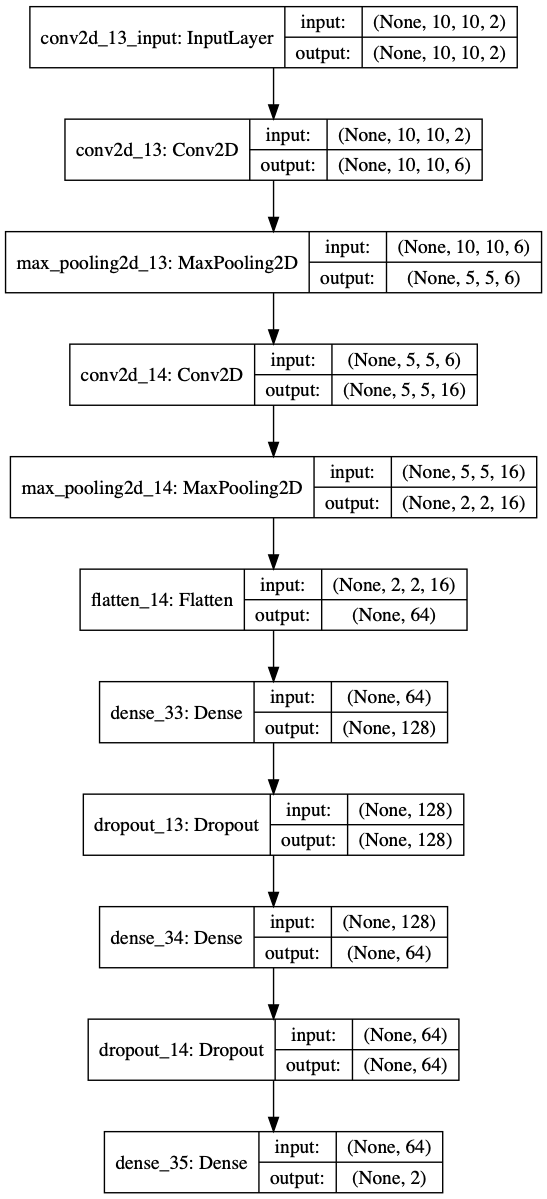

In [186]:
model2.summary()

# from keras.utils.vis_utils import plot_model
#from keras.utils import plot_model
keras.utils.vis_utils.pydot = pydot
plot_model(model2)

# direct plot
SVG(model_to_dot(model2).create(prog='dot', format='svg'))
# to file
plot_model(model2, to_file='model_test.png', show_shapes=True,
        show_layer_names=True, expand_nested=False, dpi=100)
# model.save_weights('file.h5')
# avec le model construit + les poids
# model.load_weights('file.h5')


In [187]:
#creating a mapping of layer name ot layer details 
#we will create a dictionary layers_info which maps a layer name to its charcteristics
#here the layer_weights dictionary will map every layer_name to its corresponding weights
layers_info = {}
layer_weights = {}
for i in model2.layers:
    layers_info[i.name] = i.get_config()
    layer_weights[i.name] = i.get_weights()

# print(layers_info['block5_conv1'])
print(layers_info)
print(layer_weights)

layers = model2.layers
layer_ids = [1,2,3,4,5]
for i in range(1):
    print("Couche", i, layers[layer_ids[i]].get_weights()[0][:,:,:,0][:,:,0])

#plot the filters
fig,ax = plt.subplots(nrows=1,ncols=5)
for i in range(5):
    _ = ax[i].imshow(layers[layer_ids[i]].get_weights()[0][:,:,:,0][:,:,0],cmap='gray')
    ax[i].set_title('block'+str(i+1))
    _ = ax[i].set_xticks([])
    _ = ax[i].set_yticks([])


{'conv2d_13': {'name': 'conv2d_13', 'trainable': True, 'batch_input_shape': (None, 10, 10, 2), 'dtype': 'float32', 'filters': 6, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'max_pooling2d_13': {'name': 'max_pooling2d_13', 'trainable': True, 'dtype': 'float32', 'pool_size': (2, 2), 'padding': 'valid', 'strides': (2, 2), 'data_format': 'channels_last'}, 'conv2d_14': {'name': 'conv2d_14', 'trainable': True, 'dtype': 'float32', 'filters': 16, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_r

IndexError: list index out of range

### Figures

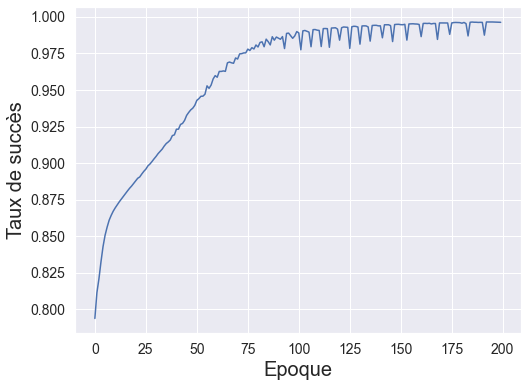

In [209]:
#history0.history
# plot metrics
fig = plt.figure(figsize=(8,6))
#_ = plt.plot(history2.history['binary_accuracy'])
_ = plt.plot(history2.history['accuracy'])
_ = plt.ylabel('Taux de succès',fontsize=20)
_ = plt.xlabel('Epoque',fontsize=20)
_ = plt.xticks(fontsize=14)
_ = plt.yticks(fontsize=14)
plt.savefig(DATA_DIR8 +"fig2D_history_" + str(mult) + ".png")
_ = plt.show()


### history

0 red [[0.5516782157123089, 0.4621244914829731, 0.4143363744020462, 0.38534958362579347, 0.3647115923464298, 0.34991023764014245, 0.3385074928402901, 0.3297213949263096, 0.3229606688022614, 0.31691456511616706, 0.3118941470980644, 0.3072873629629612, 0.3029543898999691, 0.29828702211380004, 0.293446733802557, 0.28886386677622794, 0.2848086252808571, 0.28028678372502325, 0.27620244175195696, 0.2717967629432678, 0.2679459571838379, 0.26327958330512047, 0.26066144853830336, 0.25612562634050845, 0.2516611099243164, 0.24808445982635022, 0.24320371635258198, 0.2397813830524683, 0.23615146689116956, 0.23178462758660318, 0.22811121121048927, 0.22345817796885967, 0.22054409012198448, 0.2162951987236738, 0.2116644375026226, 0.20758644975721835, 0.20473672933876513, 0.20131677091121675, 0.19483912289142608, 0.19361373856663705, 0.18513530753552915, 0.18431724160909652, 0.1780022032558918, 0.17607018649578093, 0.1712820429354906, 0.16440086476504803, 0.15974899865686892, 0.15568286813795568, 0.152

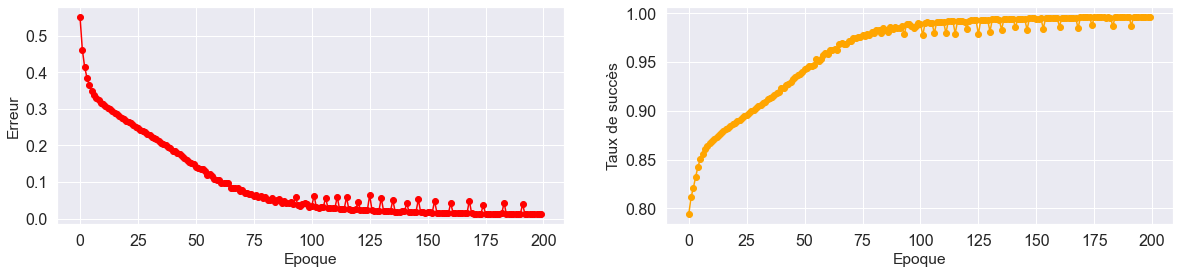

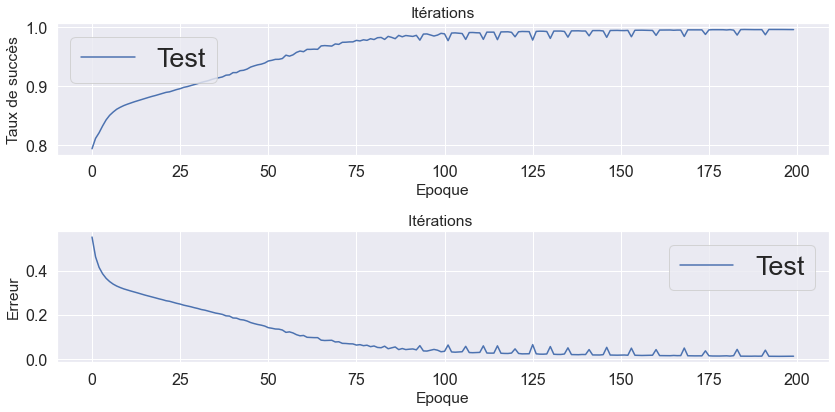

In [210]:
#print(history2.history.keys())
coul = ["red", "orange",  "blue", "lightblue"]

fig = plt.figure(figsize=(20,4))
_ = plt.subplot(1,2,1)
for i in range(0,2,2):
    print(i,coul[i], list(history2.history.values()))
    #_ = plt.plot(list(history2.history.values())[i],'k-o', color=coul[i])
    _ = plt.plot(list(history2.history.values())[0],'k-o', color=coul[i])
    _ = plt.ylabel('Erreur')
    _ = plt.xlabel('Epoque')
    _ = plt.xticks(fontsize=16)
    _ = plt.yticks(fontsize=16)
#    _ = plt.legend(['test'], loc='center right', fontsize="xx-large")
    
_ = plt.subplot(1,2,2)
for j in range(1,2,2):
    _ = plt.plot(list(history2.history.values())[1],'k-o', color=coul[j])
    _ = plt.ylabel('Taux de succès')
    _ = plt.xlabel('Epoque')
    _ = plt.xticks(fontsize=16)
    _ = plt.yticks(fontsize=16)
#    _ = plt.legend(['test'], loc='center right', fontsize="xx-large")

plt.savefig(DATA_DIR8 +"fig2D_LossAcc_" + str(mult) + ".png")

# RESULTATS
if dim == 2:
    score = model2.evaluate(test_data, test_labels, verbose=0, batch_size=batch_size)
    classes = model2.predict(test_data, batch_size=batch_size)
    predictions = model2.predict(test_data[:10])
if dim == 4:
    score = model2.evaluate(test_data, test_labels, verbose=0, steps=batch_size)
    classes = model2.predict(test_data, steps=batch_size)
    predictions = model2.predict(test_data[:100], steps=batch_size)
    
print('Test loss:', score[0])
print('Test accuracy:', score[1])

 #predictions = model2.predict_classes(test_data[:10])
print(np.argmax(predictions, axis=1))
print(test_labels.shape, type(test_labels))

######## TypeError: '(slice(None, 100, None), slice(0, 1, None))' is an invalid key
#print(test_labels[:100,0:1])
# PLOTS training & validation accuracy values
fig = plt.figure(figsize=(12,6))
_ = plt.subplot(2,1,1)
_ = plt.plot(history2.history['accuracy'])
if dim == 2:
    _ = plt.plot(history2.history['val_acc'])
_ = plt.title('Itérations')
_ = plt.ylabel('Taux de succès')
_ = plt.xlabel('Epoque')
_ = plt.xticks(fontsize=16)
_ = plt.yticks(fontsize=16)
_ = plt.legend([ 'Test','Train'], loc='upper left', fontsize="xx-large")

_ = plt.subplot(2,1,2)
_ = plt.plot(history2.history['loss'])
if dim == 2:
    _ = plt.plot(history2.history['val_loss'])
_ = plt.title('Itérations ')
_ = plt.ylabel('Erreur')
_ = plt.xlabel('Epoque')
_ = plt.xticks(fontsize=16)
_ = plt.yticks(fontsize=16)
_ = plt.legend(['Test','Train'], loc='upper right', fontsize="xx-large")

_ = plt.tight_layout()
_ = fig

#plt.savefig(DATA_DIR8 +"fig2D_LossAcc1_" + str(mult1d) + ".png")

### Matrice de confusion

In [211]:
print(data_2d0.shape, y0[:].shape, y0[1:].shape)
#y0[:]
print(test_data.shape, test_labels[:].shape)

(28856, 10, 10, 2) (28856, 2) (28855, 2)
(7216, 10, 10, 2) (7216, 2)


start tensor 4D
Echantillon Train: (28856, 10, 10, 2) 28856 28856
Echantillon Test: 7216 7216
(28856,) (28856, 1) (7216,) (7216, 1)
SOMME réelle:  5624.0 1412.0
SOMME prédite: 5615.0 1593.0


[(2.0, -1.0), (-1.0, 2.0)]

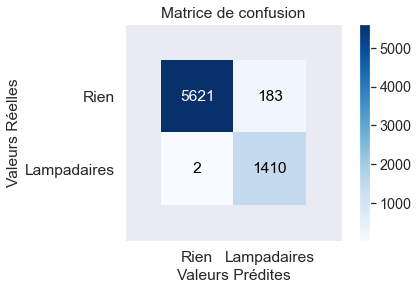

Pourcentages:
Train: 5615.0 5624.0 99.84 %
Test : 1593.0 1412.0 112.82 %


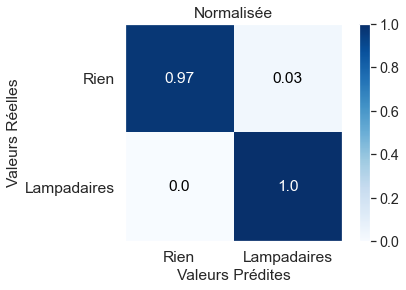

In [212]:
# transforme les matrice en listes d'entiers binaires (0 ou 1)
if dim == 2:
    print("start matrice 2D")
    Y01 = pd.DataFrame(model2.predict(train_data, steps=batch_size)[:,1:])[0].round(0).tolist()
    Y11 = pd.DataFrame(model2.predict(test_data, steps=batch_size)[:,1:])[0].round(0).tolist()
    Y00 = pd.DataFrame(train_labels[:,1:])[0].tolist()
    Y10 = pd.DataFrame(test_labels[:,1:])[0].tolist()
    y_reel = pd.Series(Y10, name='Reel_test')
    y_pred = pd.Series(Y11, name='Prédit_test')
    #df_confusion = pd.crosstab(y_reel, y_pred, rownames=['Reel_test'], colnames=['Predit_test'], margins=True)
    print("\n", df_confusion)
    
if dim == 4:
    print("start tensor 4D")
    Y01 = model2.predict(train_data, steps=batch_size)[:].round(0).tolist()
    Y11 = model2.predict(test_data, steps=batch_size)[:].round(0).tolist()
    Y00 = train_labels[:]
    Y10 = test_labels[:]
#    Y10 = test_labels[1:].numpy().tolist()
#    y_reel = test_labels[1:].numpy()
    y_reel0 = train_labels[1]
    y_pred0 = model2.predict(train_data, steps=batch_size).round(0)[:,1:]
    y_reel = test_labels[1]
    y_pred = model2.predict(test_data, steps=batch_size).round(0)[:,1:]

print("Echantillon Train:", train_data.shape, len(Y00), len(Y01))
#confusion_matrix(Y01, Y00)

print("Echantillon Test:", len(Y10), len(Y11))
#confusion_matrix(Y11, Y10)

print(y_reel0.shape, y_pred0.shape, y_reel.shape, y_pred.shape)
print("SOMME réelle: ", y_reel0.sum(), y_reel.sum())
print("SOMME prédite:", y_pred0.sum(), y_pred.sum())
#

ax1 = plt.subplot()
_ = skplt.metrics.plot_confusion_matrix(y_reel, y_pred, ax = ax1, figsize=(5,5), hide_counts=False)
ax1.set(xlim=(-1, 2), ylim=(2, -1))
_ = ax1.set_title('Matrice de confusion')
_ = ax1.set_xlabel('Valeurs Prédites')
_ = ax1.set_ylabel('Valeurs Réelles'); 
_ = ax1.xaxis.set_ticklabels(['Rien', 'Lampadaires'])
_ = ax1.yaxis.set_ticklabels(['Rien', 'Lampadaires'])
plt.savefig(DATA_DIR8 +"fig2D_matConf1_" + str(mult) + ".png")
plt.show()

print("Pourcentages:")
print("Train:", y_pred0.sum(), y_reel0.sum(), round(y_pred0.sum() / y_reel0.sum()* 100, 2),"%")
print("Test :", y_pred.sum(),  y_reel.sum(),  round(y_pred.sum() / y_reel.sum()* 100, 2),"%")

ax2 = plt.subplot()
#, xticks_rotation='vertical'
_ = skplt.metrics.plot_confusion_matrix(y_reel, y_pred, ax = ax2, figsize=(5,5), normalize=True)
#_ = sns.heatmap(cf_matrix, ax = ax2)
_ = ax2.set_title('Normalisée')
_ = ax2.set_xlabel('Valeurs Prédites')
_ = ax2.set_ylabel('Valeurs Réelles'); 
_ = ax2.xaxis.set_ticklabels(['Rien', 'Lampadaires'])
_ = ax2.yaxis.set_ticklabels(['Rien', 'Lampadaires'])
plt.savefig(DATA_DIR8 +"fig2D_matConf2_" + str(mult) + ".png")
plt.show()


In [213]:
#  en cas de probleme
#df_RES_T['True-Test']   = df_RES_T['TP']  + df_RES_T['FP']
#df_RES_T['False-Test']  = df_RES_T['TN']  + df_RES_T['FN']
#df_RES_T['True-Train']  = df_RES_T['TP0'] + df_RES_T['FP0']
#df_RES_T['False-Train'] = df_RES_T['FP0']  + df_RES_T['FN0']

#df_RESULTATS = pd.read_csv(DATA_DIR9+"results_2.txt", sep=",")
#df_RESULTATS['ACC'] = round((df_RESULTATS['TP'] + df_RESULTATS['TN']) / (df_RESULTATS['TP'] + df_RESULTATS['TN'] + df_RESULTATS['FP'] + df_RESULTATS['FN']),3)
#df_RESULTATS.rename({"Unnamed: 0":"id"})
#df_RESULTATS.index = (list(df_RESULTATS["Unnamed: 0"]))
#df_RES.drop(['Unnamed: 0','True-Test','True-Train','False-Test','False-Train'],inplace=True)
#df_RES_T = df_RES.T
#df_RES.drop(['Unnamed: 0'])
#df_RES_T = df_RESULTATS.drop(['Unnamed: 0'], axis=1)
#df_RES = df_RES_T.T


In [214]:
# Calcul et CHECK des pourcentages et des valeurs
print(y_reel0.shape, y_pred0.shape, y_reel.shape, y_pred.shape,)
print("SOMME réelle: ", y_reel0.sum(), y_reel.sum())
print("SOMME prédite:", y_pred0.sum(), y_pred.sum())

print("Pourcentages:")
print("Train:", y_pred0.sum(), y_reel0.sum(), round(y_pred0.sum() / y_reel0.sum()* 100, 2),"%")
print("Test :", y_pred.sum(),  y_reel.sum(),  round(y_pred.sum() / y_reel.sum()* 100, 2),"%")

df_res0 = pd.DataFrame(y_reel0).reset_index().rename(columns={1: "reel"})
df_res0['pred'] = pd.DataFrame(y_pred0)
df_res0['diff'] = df_res0['pred'] - df_res0['reel']
TN0  = len(df_res0[(df_res0['pred'] == 0) & (df_res0['reel'] == 0)])
FP0  = len(df_res0[(df_res0['pred'] == 0) & (df_res0['reel'] == 1)])
FN0  = len(df_res0[(df_res0['pred'] == 1) & (df_res0['reel'] == 0)])
TP0  = len(df_res0[(df_res0['pred'] == 1) & (df_res0['reel'] == 1)])
if (TP0 + FN0) != 0:
    TPR0 = round(TP0 / (TP0 + FN0),3)   # TP / P
else:
    TPR0 = int(0)
FPR0 = round(FP0 / (TN0 + FP0),3)   # FP / N
ACC0 = round((TP0 + TN0) / (TN0 + FP0 + FN0 + TP0),3)  # TP + TN / (P + N)
PUR0 = round(TP0 / (TP0 + FP0),3) # PUR=PRECIS = TP / (TP + FP)

print("\n Pourcentages:")
print('Valeurs:', TN0, FP0, FN0, TP0)
print("Train 0:", round(TN0 / (TN0+FN0)* 100, 2),"%")
print("Train 1: ", round(TP0 / (FP0+TP0)* 100, 2),"%")

df_res = pd.DataFrame(y_reel).reset_index().rename(columns={1: "reel"})
df_res['pred'] = pd.DataFrame(y_pred)
df_res['diff'] = df_res['pred'] - df_res['reel']
TN = len(df_res[(df_res['pred'] == 0) & (df_res['reel'] == 0)])
FP = len(df_res[(df_res['pred'] == 0) & (df_res['reel'] == 1)])
FN = len(df_res[(df_res['pred'] == 1) & (df_res['reel'] == 0)])
TP = len(df_res[(df_res['pred'] == 1) & (df_res['reel'] == 1)])
if (TP + FN) != 0:
    TPR = round(TP / (TP + FN),3)   # TP / P
else:
    TPR = int(0)
FPR = round(FP / (TN + FP),3)   # FP / N
ACC = round((TP + TN) / (TP + TN + FP + FN),3)  # TP + TN / (P + N)
PUR = round(TP / (TP + FP),3) # PUR=PRECIS = TP / (TP + FP)
MCC1 = (TP * TN) - (FP * FN)
MCC2 = (TP+FP)*(TP+FN)*(TN*FP)*(TN+FN)
MCC  = round(MCC1 / np.sqrt(MCC2),4)
TrueTest   = TP  + FP
FalseTest  = TN  + FN
TrueTrain  = TP0 + FP0
FalseTrain = FP0 + FN0

print("Pourcentages:")
print('Valeurs:', TN, FP, FN, TP)
print("Test 0:", round(TN / (TN+FN)* 100, 2),"%")
print("Test 1: ", round(TP / (FP+TP)* 100, 2),"%")

print("True Pos Rate:", TPR, " False Pos Rate:", FPR)
print("Accuracy:", ACC, " Purity:", PUR, " Matthews:", MCC)
print("Accuracy0:", ACC0, " Purity:", PUR0)

(28856,) (28856, 1) (7216,) (7216, 1)
SOMME réelle:  5624.0 1412.0
SOMME prédite: 5615.0 1593.0
Pourcentages:
Train: 5615.0 5624.0 99.84 %
Test : 1593.0 1412.0 112.82 %

 Pourcentages:
Valeurs: 23231 10 1 5614
Train 0: 100.0 %
Train 1:  99.82 %
Pourcentages:
Valeurs: 5621 2 183 1410
Test 0: 96.85 %
Test 1:  99.86 %
True Pos Rate: 0.885  False Pos Rate: 0.0
Accuracy: 0.974  Purity: 0.999  Matthews: 0.6542
Accuracy0: 1.0  Purity: 0.998


In [215]:
# Delete first the dataframe 
#del df_RES; df_RES = None
# df_RES = None et resN=0 ....  EN DEBUT de programme
#
fileRES = DATA_DIR9 + "RESULTS/results_" + str(0) + ".txt"
print(fileRES)
if (os.path.exists(fileRES)):
    maxi = 0
    for file in glob.glob(DATA_DIR9 +"RESULTS/results_*.txt"):    
        fileN = os.path.basename(file)
        subs = int(fileN.split("_")[1].split(".")[0])
        if subs >= maxi:
            maxi = subs
        resN = maxi
        print(fileN, maxi, resN)
    resN += 1
    fileRES = DATA_DIR9 + "RESULTS/results_" + str(resN) + ".txt"
#
indexRES = ['TN', 'FP', 'FN', 'TP', 'TPR', 'FPR', 'ACC', 'PUR','MCC',
            'TN0','FP0','FN0','TP0','TPR0','FPR0','ACC0','PUR0','True-Test',
            'True-Train','False-Test','False-Train']
listeRES = [TN,FP,FN,TP,TPR,FPR,ACC,PUR,MCC,TN0,FP0,FN0,TP0,TPR0,FPR0,ACC0,
            PUR0,TrueTest,FalseTest,TrueTrain,FalseTrain]
fich_res = DATA_DIR9 +"RESULTS/results-TOUT.txt"
list_col = ['TN','FP','FN','TP','TN0','FP0','FN0','TP0','True-Test','True-Train','False-Test','False-Train']
list_col1 = ['modele'] + list_col
list_col2 = ['mod','mult','epoch','step','n_filt','drop','dens1','idens2','filt']
#
colRES1 = str(modele) + "_" + str(mult) + "_" + str(epochs) + "_" + str(steps) + "_" 
colRES2 = str(cv2d) + "_" + str(drop)+ "_" + str(dens1) + "_" + str(dens2) + "_" + str(filt)
colRES  = colRES1 + colRES2
if df_RES is None:
    df_RES = pd.DataFrame(listeRES, index=indexRES, columns=[colRES])
else:
    if not colRES in df_RES.columns:
        print(colRES, "\n", listeRES)
        #df_RES = df1.assign(e=e.values)  #df_RES.insert(listeRES, colonne)
        df_RES[str(colRES)] = listeRES
# transpose la table
df_RES_T = df_RES.T
# converti en entiers certaines colonnes
df_RES_T[list_col] = df_RES_T[list_col].astype(int)
resultats = df_RES_T.to_csv(fileRES, sep=",", index=True, header=True)
#df_RES.drop(['2_5_20_2_16_0.1'], axis=1, inplace=True)

df_RES_T
#df_RES_T.describe()

/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/results_0.txt
results_0.txt 0 0
results_1.txt 1 1
results_20200358.txt 20200358 20200358
results_20200357.txt 20200358 20200358
results_20200356.txt 20200358 20200358
results_20200344.txt 20200358 20200358
1_4_200_40_16_0.1_128_64_3 
 [5621, 2, 183, 1410, 0.885, 0.0, 0.974, 0.999, 0.6542, 23231, 10, 1, 5614, 1.0, 0.0, 1.0, 0.998, 1412, 5804, 5624, 11]


TN    FP   FN    TP    TPR    FPR    ACC    PUR  \
1_4_10_10_16_0.1_128_64_3   5745  1268   59   144  0.709  0.181  0.816  0.102   
1_1_200_40_16_0.1_128_64_3  5701   254  105    99  0.485  0.043  0.942  0.280   
1_4_200_40_16_0.1_128_64_3  5621     2  183  1410  0.885  0.000  0.974  0.999   

                               MCC    TN0   FP0  FN0   TP0   TPR0   FPR0  \
1_4_10_10_16_0.1_128_64_3   0.0068  23031  5092  201   532  0.726  0.181   
1_1_200_40_16_0.1_128_64_3  0.0219  23227    12    0  1394  1.000  0.001   
1_4_200_40_16_0.1_128_64_3  0.6542  23231    10    1  5614  1.000  0.000   

                             ACC0   PUR0  True-Test  True-Train  False-Test  \
1_4_10_10_16_0.1_128_64_3   0.817  0.095       1412        5804        5624   
1_1_200_40_16_0.1_128_64_3  1.000  0.991        353        5806        1406   
1_4_200_40_16_0.1_128_64_3  1.000  0.998       1412        5804        5624   

                            False-Train  
1_4_10_10_16_0.1_128_64_3          5293  
1_1_200_40_16_0.1_128_64_3           12  
1_4_200_40_16_0.1_128_64_3           11

In [162]:

def plot_snsHeat(fileIN,fileOUT,cmap='viridis',fig_size=(12,4),f_scale=1.0,rot=0,xf_size=20,yf_size=13):
    _ = plt.figure(figsize=fig_size,facecolor='w',edgecolor='k')
    _ = sns.set(font_scale=f_scale)
    ax1 = sns.heatmap(fileIN,cmap=cmap,cbar=True,square= False)    #df_TP.iloc[:,1:]
    _ = ax1.set_xticklabels(ax1.get_xticklabels(),fontsize=xf_size)
    _ = ax1.set_yticklabels(ax1.get_yticklabels(),rotation=rot,fontsize=xf_size)
    _ = plt.savefig(fileOUT+".png")
    
    return plt.show()

def compil_resul(fileIN, col, col2, fileOUT):
    df = pd.read_csv(fileIN, sep=",").replace(np.inf, 1).fillna(0)
    # nettoyage des données FLOAT qui sont approximés à 10-8 près
    df_0  = df.replace(np.inf, 1).fillna(0).rename(columns={'Unnamed: 0': "modele"})
    df_2 = df_0[col]
    df_1 = df_0.drop(col, axis=1)
    df_1 = df_1 * 1000
    df_1 = df_1.astype(int)
    df_1 = df_1 / 1000
    df   = df_2.merge(df_1, left_index=True, right_index=True)
    df.to_csv(fileOUT, sep=",", index=True, header=True)
    df['False-Test'] = df['TN'] + df['FN']
    df['TN'] = df['TN'] / df['False-Test']
    df['FP'] = df['FP'] / df['True-Test']
    df['FN'] = df['FN'] / df['False-Test']
    df['TP'] = df['TP'] / df['True-Test']
    df[col2] = df['modele'].str.split("_",expand=True,)
    df = df.drop(['modele'], axis=1)
    col2b = col2[1:5] + col2[6:]
    df[col2b] = df[col2b].astype(int)
    df['iteration'] = df[col2[2]]*df[col2[3]]
    df['model'] = df[col2[0]]
    df['multi'] = df[col2[1]]
    df['epoq']  = df[col2[2]]
    df['pas']   = df[col2[3]]
    df['itera'] = df[col2[2]] * df[col2[3]]
    df.set_index([col2[0],col2[1],col2[2],col2[3],'iteration'],inplace=True,drop=True,append=False)
    df.sort_index(inplace=True, ascending=True)
    return df

/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/results-4fois.txt
4
/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/results-TOUT.txt


TN        FP        FN        TP  \
mod     mult epoch step iteration                                           
1       4    10    2    20         1.000000  1.000000  0.000000  0.000000   
             20    10   200        0.923329  0.426346  0.076671  0.573654   
             40    5    200        0.980531  0.634561  0.019469  0.365439   
             20    20   400        0.920744  0.329320  0.079256  0.670680   
             40    20   800        0.920572  0.225921  0.079428  0.774079   
...                                     ...       ...       ...       ...   
3       4    20    10   200        0.921261  0.306657  0.078739  0.693343   
             40    20   800        0.974328  0.031161  0.025672  0.968839   
4       4    20    10   200        0.912646  0.223088  0.087354  0.776912   
5       4    40    20   800        1.000000  1.000000  0.000000  0.000000   
Parfait 0    0     0    0          1.000000  0.000000  0.000000  1.000000   

                                     TN0   FP0   FN0   TP0  True-Test  \
mod     mult epoch step iteration                                       
1       4    10    2    20         23232  5624     0     0       1412   
             20    10   200        21489  2374  1743  3250       1412   
             40    5    200        22738  3588   494  2036       1412   
             20    20   400        21554  1839  1678  3785       1412   
             40    20   800        21518  1229  1714  4395       1412   
...                                  ...   ...   ...   ...        ...   
3       4    20    10   200        21386  1651  1846  3973       1412   
             40    20   800        23224   144     8  5480       1412   
4       4    20    10   200        21283  1193  1949  4431       1412   
5       4    40    20   800        23232  5624     0     0       1412   
Parfait 0    0     0    0          23228     0     0  1408       1408   

                                   True-Train  False-Test  False-Train    TPR  \
mod     mult epoch step iteration                                               
1       4    10    2    20             5624.0        5804       5624.0  0.000   
             20    10   200            5624.0        5804       4117.0  0.645   
             40    5    200            5624.0        5804       4082.0  0.820   
             20    20   400            5624.0        5804       3517.0  0.672   
             40    20   800            5624.0        5804       2943.0  0.703   
...                                       ...         ...          ...    ...   
3       4    20    10   200            5624.0        5804       3497.0  0.682   
             40    20   800            5624.0        5804        152.0  0.902   
4       4    20    10   200            5624.0        5804       3142.0  0.684   
5       4    40    20   800            5624.0        5804       5624.0  0.000   
Parfait 0    0     0    0                 0.0        5808          0.0  1.000   

                                     FPR    ACC  ...    MCC   TPR0   FPR0  \
mod     mult epoch step iteration                ...                        
1       4    10    2    20         0.196  0.804  ...  0.000  0.000  0.195   
             20    10   200        0.100  0.855  ...  0.022  0.650  0.099   
             40    5    200        0.136  0.860  ...  0.017  0.805  0.136   
             20    20   400        0.080  0.872  ...  0.028  0.693  0.079   
             40    20   800        0.055  0.892  ...  0.038  0.719  0.054   
...                                  ...    ...  ...    ...    ...    ...   
3       4    20    10   200        0.075  0.877  ...  0.030  0.682  0.072   
             40    20   800        0.008  0.973  ...  0.139  0.999  0.006   
4       4    20    10   200        0.055  0.885  ...  0.038  0.695  0.053   
5       4    40    20   800        0.196  0.804  ...  0.000  0.000  0.195   
Parfait 0    0     0    0          0.000  1.000  ...  1.000  1.000  0.000   

                                 

/Users/pl/Desktop/DATA_SCIENCE/STAGE/RESULTATS/results-4_1


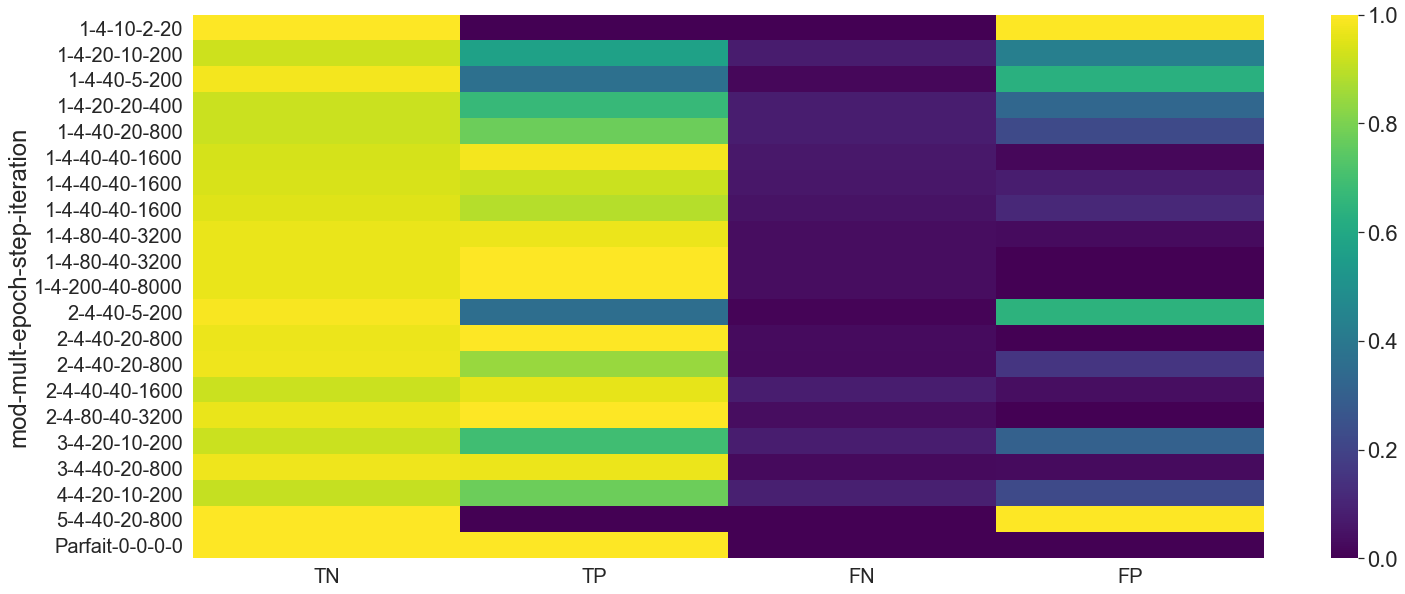

/Users/pl/Desktop/DATA_SCIENCE/STAGE/RESULTATS/results-4_2


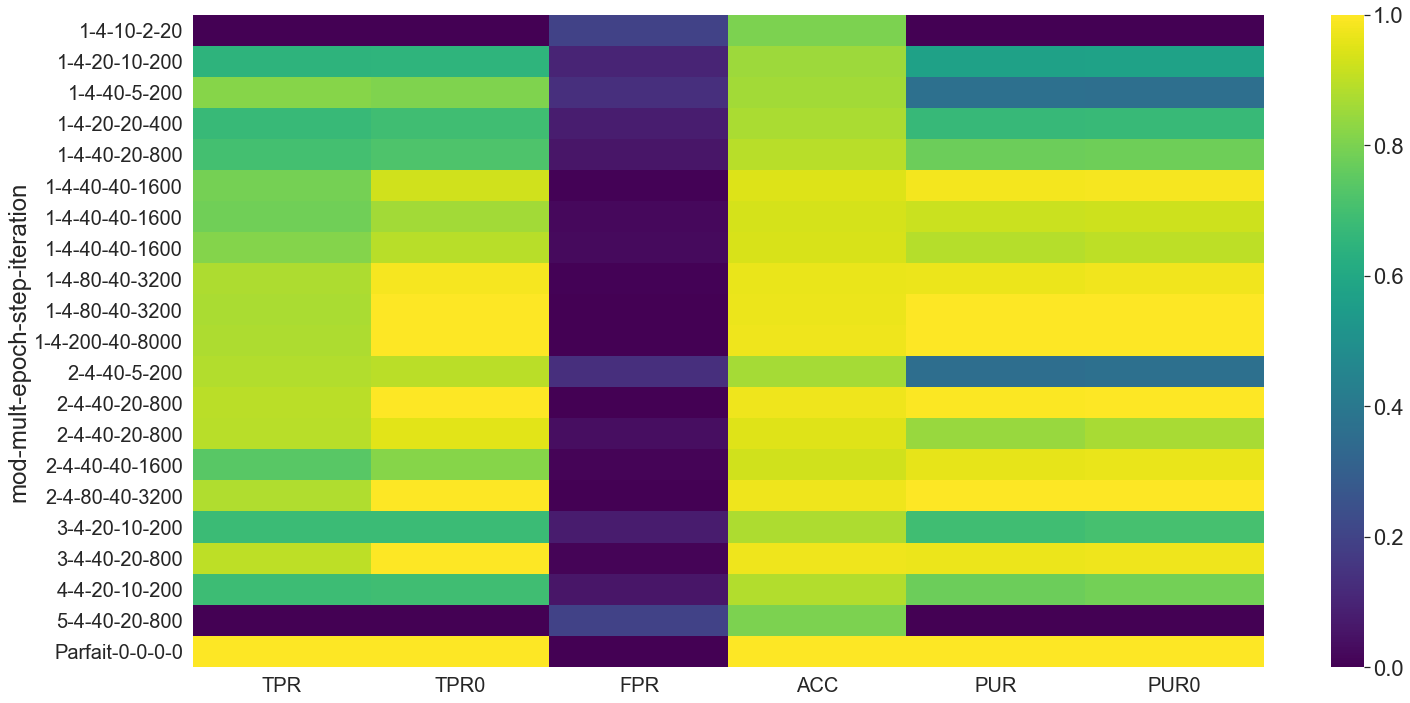

In [169]:
#1 fileRES = DATA_DIR9 + "RESULTS/results_" + str(resN) + ".txt"
# multi = "3-4"
# _ = sns.relplot(x="itera",y="TN",hue="multi",size='model',data=df_RESU)   # size="pas"
# _ = sns.relplot(x="drop",y="TN",hue="multi",size='model',data=df_RESU)   # size="pas"
### variation du DropOut
fileRES = DATA_DIR9 + "RESULTS/results-dropout.txt"
###  1 TOUT
multi = "1"   # fig_size=(24,10), f_scale=2.0, rot=0, xf_size=20, yf_size=20
###  3 TOUT
multi = "3"  # fig_size=(20,12), f_scale=2.0, rot=0, xf_size=20, yf_size=20
###  4 TOUT
multi = "4"
fileRES = DATA_DIR9 + "RESULTS/results-" + str(multi) + "fois.txt"
print(fileRES)
name_fois = "RESULTS/results-" + str(multi)
fich_res1 = DATA_DIR9 + name_fois + "_TOUT.txt"
print(multi) #, nom_fichier)
print(fich_res)
df_RESULTATS = compil_resul(fileRES, list_col1, list_col2, fich_res1)
df_RESU  = df_RESULTATS.sort_values(['mod','mult','iteration'], ascending=True)
#df_TPi.to_csv(DATA_DIR9 +"RESULTS/results-3-4sort.txt", sep="\t", index=True, header=True)
df_RESU
col_MatConf_1 = ['TN','TP','FN','FP']
col_MatConf_2 = ['TPR','TPR0','FPR','ACC','PUR','PUR0']
# col_MatConf_2 = ['TPR','TPR0','FPR','FPR0','ACC','ACC0','PUR','PUR0','MCC']


fich_out1 = DATA_DIR8 + name_fois + "_1"
print(fich_out1)
plot_snsHeat(df_RESU[col_MatConf_1], fich_out1, cmap='viridis', fig_size=(24,10), f_scale=2.0, rot=0, xf_size=20, yf_size=20)
fich_out2 = DATA_DIR8 + name_fois + "_2"
print(fich_out2)
plot_snsHeat(df_RESU[col_MatConf_2], fich_out2, cmap='viridis', fig_size=(24,12), f_scale=2.0, rot=0, xf_size=20, yf_size=22)


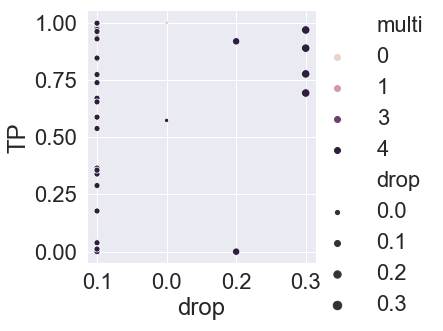

In [168]:
_ = sns.relplot(x="drop",y="TP",hue="multi",size='drop',data=df_RESU)   # size="pas"


xcol = sorted(list(df_RESU["itera"].unique()))
plot = df_RESU.hvplot(x="drop", y=["TN", "FN", "FP", "TP"], kind='line')
# colnames = ["TN", "FN", "FP", "TP"]
# df_RESU.plot(x=df_RESU["itera"], y=colnames[:], kind = 'line', legend=False, 
#                 subplots = True, sharex = True, figsize = (6,4), ls="none", marker="o")
#
# df_RESU.plot(x='itera',y=['TN','TP'],figsize=(10,5),kind="scatter",grid=True)
hvplot.save(plot, DATA_DIR8 +"results-dropout.png")
#_ = plt.savefig(DATA_DIR8 +"results-dropout.png")
plt.show()

### plots resultats

1-3-4 /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/results-1-3-4fois.txt /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/results-TOUT.txt


TN        FP        FN        TP    TN0  \
mod mult epoch step iteration                                                  
5   4    40    20   800        1.000000  1.000000  0.000000  0.000000  23232   
4   4    20    10   200        0.912646  0.223088  0.087354  0.776912  21283   
3   4    40    20   800        0.974328  0.031161  0.025672  0.968839  23224   
         20    10   200        0.921261  0.306657  0.078739  0.693343  21386   
    3    40    20   800        0.974156  0.125590  0.025844  0.874410  22974   
...                                 ...       ...       ...       ...    ...   
1   1    200   50   10000      0.977782  0.674221  0.022218  0.325779  23227   
               20   4000       0.978815  0.694051  0.021185  0.305949  23180   
         80    40   3200       0.978815  0.694051  0.021185  0.305949  23180   
         100   20   2000       0.978298  0.654391  0.021702  0.345609  22935   
         200   5    1000       0.995866  0.838527  0.004134  0.161473  23162   

                                FP0   FN0   TP0  True-Test  True-Train  \
mod mult epoch step iteration                                            
5   4    40    20   800        5624     0     0       1412        5624   
4   4    20    10   200        1193  1949  4431       1412        5624   
3   4    40    20   800         144     8  5480       1412        5624   
         20    10   200        1651  1846  3973       1412        5624   
    3    40    20   800         359   257  3859       1059        4218   
...                             ...   ...   ...        ...         ...   
1   1    200   50   10000         3     0  1403        353        1406   
               20   4000        234    47  1172        353        1406   
         80    40   3200        234    47  1172        353        1406   
         100   20   2000        524   292   882        353        1406   
         200   5    1000       1100    65   306        353        1406   

                               False-Test  False-Train    TPR    FPR    ACC  \
mod mult epoch step iteration                                                 
5   4    40    20   800              5804         5624  0.000  0.196  0.804   
4   4    20    10   200              5804         3142  0.684  0.055  0.885   
3   4    40    20   800              5804          152  0.902  0.008  0.973   
         20    10   200              5804         3497  0.682  0.075  0.877   
    3    40    20   800              5804          616  0.861  0.023  0.959   
...                                   ...          ...    ...    ...    ...   
1   1    200   50   10000            5806            3  0.471  0.040  0.940   
               20   4000             5806          281  0.468  0.040  0.940   
         80    40   3200             5806          281  0.468  0.040  0.940   
         100   20   2000             5806          816  0.492  0.039  0.942   
         200   5    1000             5806         1165  0.704  0.049  0.948   

                                 PUR    MCC   TPR0   FPR0   ACC0   PUR0  \
mod mult epoch step iteration                                             
5   4    40    20   800        0.000  0.000  0.000  0.195  0.805  0.000   
4   4    20    10   200        0.777  0.038  0.695  0.053  0.890  0.787   
3   4    40    20   800        0.969  0.139  0.999  0.006  0.995  0.974   
         20    10   200        0.693  0.030  0.682  0.072  0.879  0.706   
    3    40    20   800        0.874  0.074  0.938  0.015  0.978  0.915   
...                              ...    ...    ...    ...    ...    ...   
1   1    200   50   10000      0.326  0.023  1.000  0.000  1.000  0.998   
               20   4000       0.306  0.022  0.961  0.010  0.989  0.834   
         80    40   3200       0.306  0.022  0.961  0.010  0.989  0.834   
         100   20   2000       0.346  0.025  0.750  0.022  0.967  0.627   
         200   5    1000       0.161  0.019  0.825  0.045  0.953  0.218   

                             

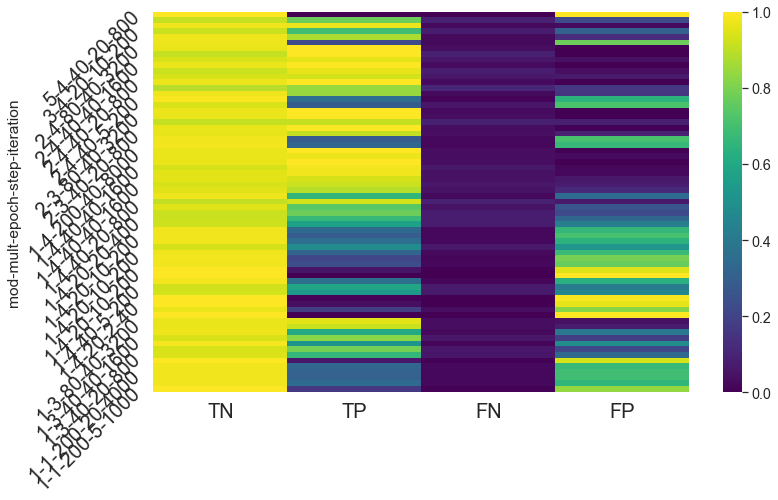

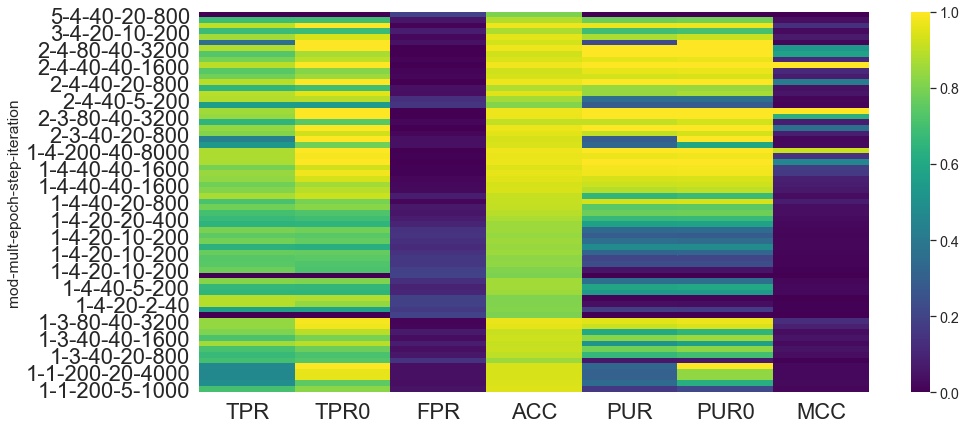

In [168]:
#fois = ["1", "3", "4", "3-4" "1-3-4"]

# tout les résultatsfois = ["1-3-4"]
for multi in fois:
    name_fois = "RESULTS/results-" + str(multi)
    nom_fichier = DATA_DIR9 + name_fois + "fois.txt"
    fich_res1 = DATA_DIR9 + name_fois + "TOUT.txt"
    fich_res2 = DATA_DIR9 + name_fois + "TOUT2.txt"
    print(multi, nom_fichier, fich_res)
    # Compilation des résultats enfichier
    df_RESULTATS = compil_resul(nom_fichier, list_col1, list_col2, fich_res1)
    #
    # df_TP  = df_RESULTATS.sort_values(['TP'], ascending=False)
    # df_RESULTATS.sort_values(['FP'], ascending=True)
    # df_TN  = df_RESULTATS.sort_values(['TN'], ascending=False)
    # df_FPR = df_RESULTATS.sort_values(['FPR'], ascending=True)
    # frames = [df_TP, df_TN, df_TPR, df_FPR, df_ACC, df_PUR]
    # df_TOUT = pd.concat(frames)
    # df_TOUT.to_csv(fich_res2, sep="\t", index=True, header=True) 
    df_RESU  = df_RESULTATS.sort_values(['mod','mult','iteration'], ascending=False)
    df_RESU.to_csv(DATA_DIR9 +"RESULTS/results-3-4sort.txt", sep="\t", index=True, header=True)
    df_RESU
    # plot resultats
    fich_R1 = DATA_DIR8 + name_fois + "_1"
    plot_snsHeat(df_TEST1,fich_R1,cmap='viridis',fig_size=(12,7),f_scale=1.3,rot=0,xf_size=20,yf_size=13)
    #
    fich_R2 = DATA_DIR8 + name_fois + "_2"
    plot_snsHeat(df_TEST2,fich_R2,cmap='viridis',fig_size=(15,7),f_scale=1.3,rot=0,xf_size=22,yf_size=14)


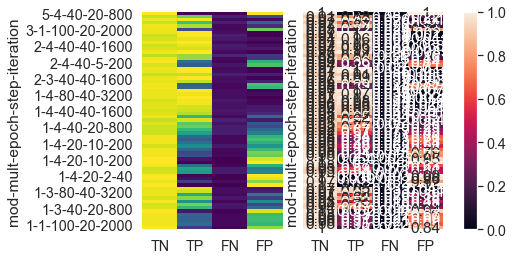

In [402]:
vmin = min(df_TEST1.values.min(), df_TEST2.values.min())
vmax = max(df_TEST1.values.max(), df_TEST2.values.max())

fig, axs = plt.subplots(ncols=3, gridspec_kw=dict(width_ratios=[2,2,0.2]))

sns.heatmap(df_TEST1, annot=False, cmap='viridis', cbar=False, ax=axs[0], vmin=vmin)
sns.heatmap(df_TEST1, annot=True, yticklabels=False, cbar=False, ax=axs[1], vmax=vmax)

fig.colorbar(axs[1].collections[0], cax=axs[2])


### anciens tests

TPa   FPa  TP0a  FP0a  True-Test  True-Train    TPR  \
epoques step iter                                                         
10      2    20       0  1059     0  4218       1059        4218  0.000   
             20       1  1411     7  5617       1412        5624  0.001   
             20     118  1645   472  6560       1763        7032  0.067   
100     2    200    472   940  1908  3717       1412        5625  0.334   
20      10   200    530   882  2118  3506       1412        5624  0.375   
400     2    800    994   418  4110  1514       1412        5624  0.704   
80      10   800   1240   172  5000   624       1412        5624  0.878   
10      80   800    858   554  3538  2086       1412        5624  0.608   
40      20   800   1279   133  5137   487       1412        5624  0.906   
20      40   800   1294   118  5210   414       1412        5624  0.916   

                    TPR0     TP     FP    TP0    FP0      index model mult  
epoques step iter                                                           
10      2    20    0.000  0.000  1.000  0.000  1.000   1_3_10_2     1    3  
             20    0.001  0.001  0.999  0.001  0.999   1_4_10_2     1    4  
             20    0.067  0.067  0.933  0.067  0.933   1_5_10_2     1    5  
100     2    200   0.339  0.334  0.666  0.339  0.661  1_4_100_2     1    4  
20      10   200   0.377  0.375  0.625  0.377  0.623  1_4_20_10     1    4  
400     2    800   0.731  0.704  0.296  0.731  0.269  1_4_400_2     1    4  
80      10   800   0.889  0.878  0.122  0.889  0.111  1_4_80_10     1    4  
10      80   800   0.629  0.608  0.392  0.629  0.371  1_4_10_80     1    4  
40      20   800   0.913  0.906  0.094  0.913  0.087  1_4_40_20     1    4  
20      40   800   0.926  0.916  0.084  0.926  0.074  1_4_20_40     1    4

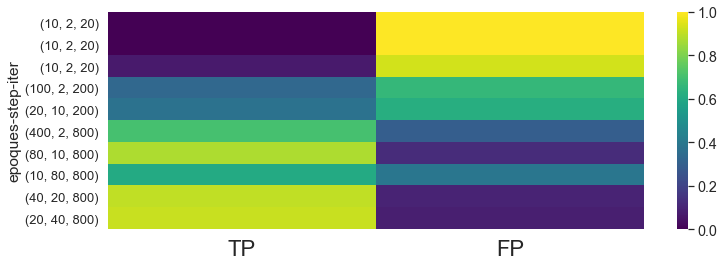

In [171]:
listeRES_0 = [[0   ,   1, 118,472,530,994,1240,858,1279,1294],
              [1059,1411,1645,940,882,418,172, 554, 133, 118],
              [   0,   7, 472,1908, 2118,4110,5000,3538,5137,5210],
              [4218,5617,6560,3717,3506,1514, 624,2086, 487, 414]]
colRES_0 = ["1_3_10_2","1_4_10_2","1_5_10_2","1_4_100_2","1_4_20_10","1_4_400_2",
            "1_4_80_10","1_4_10_80","1_4_40_20","1_4_20_40"]
df_RES_0 = pd.DataFrame(listeRES_0, index=['TPa','FPa','TP0a','FP0a'], columns=colRES_0)

df_RES_0T = df_RES_0.T

df_RES_0T['True-Test']  = df_RES_0T['TPa']  + df_RES_0T['FPa']
df_RES_0T['True-Train'] = df_RES_0T['TP0a'] + df_RES_0T['FP0a']
df_RES_0T['TPR']  = round(df_RES_0T['TPa']  / (df_RES_0T['TPa']  + df_RES_0T['FPa']),3)
df_RES_0T['TPR0'] = round(df_RES_0T['TP0a'] / (df_RES_0T['TP0a'] + df_RES_0T['FP0a']),3)

df_RES_0T['TP']  = round(df_RES_0T['TPa'] / df_RES_0T['True-Test'],3)
df_RES_0T['FP']  = round(df_RES_0T['FPa'] / df_RES_0T['True-Test'],3)
df_RES_0T['TP0'] = round(df_RES_0T['TP0a'] / df_RES_0T['True-Train'],3)
df_RES_0T['FP0'] = round(df_RES_0T['FP0a'] / df_RES_0T['True-Train'],3)

df_RES_0T['index'] = df_RES_0T.index
df_RES_0T[['model','mult','epoques','step']] = df_RES_0T['index'].str.split("_",expand=True,)
df_RES_0T[['epoques','step']] = df_RES_0T[['epoques','step']].astype(int)

#df_RES_0T['epoques'] = df_RES_0T['iter'] * df_RES_0T['step']

df_RES_0T['iter'] = df_RES_0T['epoques'] * df_RES_0T['step']


#FPR = round(FP / (TN + FP),3)   # FP / N
#ACC = round((TP + TN0) / (TN + FP + FN + TP),3)  # TP + TN / (P + N)
#PUR = round(TP / (TP + FP),3) # PUR=PRECIS = TP / (TP + FP)

df_RES_0T = df_RES_0T.set_index(['epoques','step','iter'])
df_RES_0T
resultats_0 = df_RES_0T.to_csv(DATA_DIR9 +"RESULTS/results-départ0.txt", sep=",", index=True, header=True)

#annot_kws={'fontsize':10,'fontstyle':'italic','color':"k",'alpha':0.6,'rotation':"horizontal",
#    'verticalalignment':'center','backgroundcolor':'w'}
#seaborn.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=True,
#    fmt='.2g', annot_kws= annot_kws, linewidths=0, linecolor='white', cbar=True, cbar_kws=None,
#    cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
_ = plt.figure(figsize=(12,4), facecolor='w', edgecolor='k',)
yticks = df_RES_0T.index
xticks = ['TP','FP']
sns.set(font_scale=1.3)
ax = sns.heatmap(df_RES_0T[['TP','FP']],cmap='viridis',cbar=True, linewidths = 50, square= False, linecolor="k",
                linewidth=0,xticklabels=xticks, yticklabels=yticks)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 22)
_ = ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 13)  
# df_TP.to_latex(index=False)
df_RES_0T.to_excel(DATA_DIR9 +"RESULTS/results-départ0.xlsx", sheet_name='sheet1')
plt.savefig(DATA_DIR8 +"Results0.png")


# KERAS hyperparametres

Nombre de couches cachées

Nombre de neurones pour chaques couches cachées

Fonction d'activation

Taux apprentissage (alpha ?) ... et sa décroissance

Momentum – β

Adam’s hyperparameter – β1, β2, ε

Taille Mini-batch 


In [116]:
print(train_data)
print(type(train_labels))

Tensor("concat_1:0", shape=(28856, 10, 10, 2), dtype=float64)
<class 'pandas.core.frame.DataFrame'>


In [110]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

filt      = 3    # 5
filters   = (filt, filt)
strides   = (1,1)
drop  = 0.1         # 0.5


def create_model(neurons=1, optimizer='adam', dropout_rate=0.0, learn_rate=0.01, momentum=0, 
                 init_mode='uniform', activation='relu', weight_constraint=0):
    # create model
    model = Sequential()
    model.add(Conv2D(6 , filters, padding="same", strides=(1,1), input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(16, filters, padding="same", strides=(1,1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(120, activation="relu"))
    model.add(Dropout(drop))
    model.add(Dense(100, activation="relu"))
    model.add(Dropout(drop))
    model.add(Dense(2, activation="sigmoid"))
    #model = Sequential()
    #model.add(Dense(neurons, kernel_initializer=init_mode, input_dim=8, activation=activation)'))
    #model.add(Dropout(dropout_rate))
    #model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    # Compile model
    #optimizer = SGD(lr=learn_rate, momentum=momentum)
    #model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
            
# fix random seed for reproducibility
np.random.seed(42)

# load dataset
train_data, test_data     = (data_x0, data_x1)
train_labels, test_labels = (y0, y1)
# split into input (X) and output (Y) variables
X = train_data
Y = train_labels


# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, dropout_rate=0.2, verbose=0)

# define the grid search parameters
#  Beta1 = 0.9
#  Beta2 = 0.999
#  Epsilon = 10e-8
learn_rate = [0.001, 0.01, 0.1]   # [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9, 0.99]
batch_size = [10, 20, 60]   #  [10, 20, 40, 60, 80, 100]
epochs = [10, 20, 40]    # [10, 20, 40, 60, 100]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
weight_constraint = [i for i in range (1, 6, 1)]
dropout_rate = [i/10 for i in range (0, 5, 1)]
neurons = [1, 5, 10, 15, 20, 25, 30]

param_grid = dict(learn_rate=learn_rate, batch_size=batch_size, epochs=epochs)

#param_grid = dict(neurons=neurons, learn_rate=learn_rate, momentum=momentum, optimizer=optimizer, 
#                init_mode=init_mode, batch_size=batch_size, epochs=epochs, activation=activation,
#                dropout_rate=dropout_rate, weight_constraint=weight_constraint)
#  score = ???
###################################################
################## Autre manière  #################
#params = {'batch_size':[16,32,64,128], 'epochs':[2,3], 'optimizer':['adam','rmsprop']}
#grid_search = GridSearchCV(estimator=classifier,param_grid=params,scoring="accuracy",cv=2)
###################################################
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)   # n_jobs=-1  parallisation
grid_result = grid.fit(X, Y)

best_param = grid_result.best_params_
best_accuracy = grid_result.best_score_
# summarize results ==>  best_score et best_params_
print("Best: %f using %s" % (best_accuracy, best_param))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

TypeError: Expected sequence or array-like, got <class 'tensorflow.python.framework.ops.Tensor'>

# TESTS

In [14]:
from keras.models import Sequential
from keras.layers import Dense

# fix random seed for reproducibility
np.random.seed(7)
# load pima indians dataset
dataset = np.loadtxt(DATA_DIR10 + "data/pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
modelX = Sequential()
modelX.add(Dense(12, input_dim=8, activation='relu'))
modelX.add(Dense(8, activation='relu'))
modelX.add(Dense(1, activation='sigmoid'))
# Compile model
modelX.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
modelX.fit(X, Y, epochs=3, batch_size=10)
# evaluate the model
scores = modelX.evaluate(X, Y)
print("\n%s: %.2f%%" % (modelX.metrics_names[1], scores[1]*100))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/3
768/768 [==============================] - 0s 357us/step - loss: 3.7194 - accuracy: 0.5990
Epoch 2/3
768/768 [==============================] - 0s 115us/step - loss: 0.9369 - accuracy: 0.5911
Epoch 3/3
768/768 [==============================] - 0s 120us/step - loss: 0.7472 - accuracy: 0.6406


768/768 [==============================] - 0s 53us/step

accuracy: 66.93%


In [134]:
ann_viz(modelX, view=True, title="My first neural network")

NameError: name 'modelX' is not defined

In [130]:
cv2d0 = 6
cv2d = 16
modelY = Sequential()
modelY.add(Conv2D(cv2d0 , filters, padding="same", strides=strides, input_shape=input_shape))
modelY.add(Conv2D(2*cv2d, filters, padding="same", strides=strides))
modelY.add(MaxPooling2D(pool_size=pool_size))
modelY.add(Flatten())
modelY.add(Dense(dens1, activation='relu'))
modelY.add(Dropout(drop))
modelY.add(Dense(dens2, activation='relu'))
modelY.add(Dropout(drop))
modelY.add(Dense(2, activation=activ))   

NameError: name 'filters' is not defined

In [54]:
ann_viz(modelX, view=True, title="My first neural network")

NameError: name 'modelX' is not defined

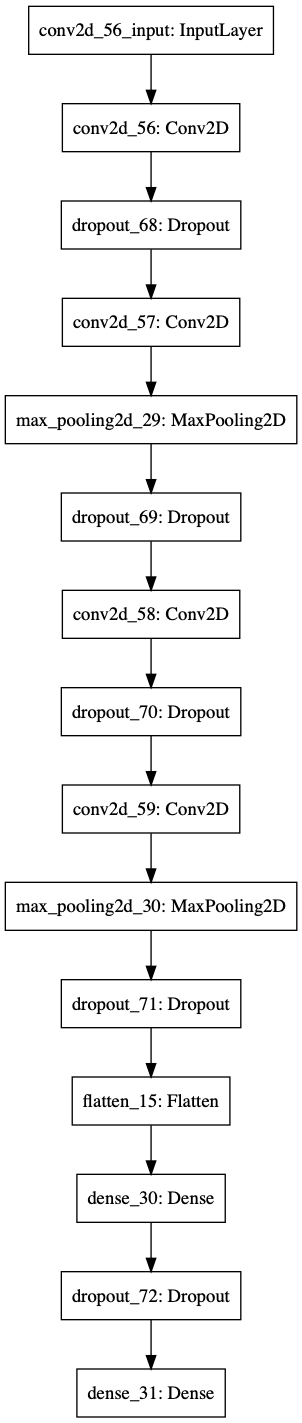

In [60]:
def build_cnn_model():
    model = keras.models.Sequential()
    model.add(Conv2D(32, (3, 3),padding="same",input_shape=(10, 10, 3),activation="relu"))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3),padding="same",input_shape=(32, 32, 3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3),padding="same",input_shape=(32, 32, 3),activation="relu"))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3),padding="same",input_shape=(32, 32, 3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation="softmax"))
    return model

model = build_cnn_model()
ann_viz(model, filename="RN_1.gv", title="TEST", orient="LR")   #  BT or LR
plot_model(model, to_file='vgg.png')

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

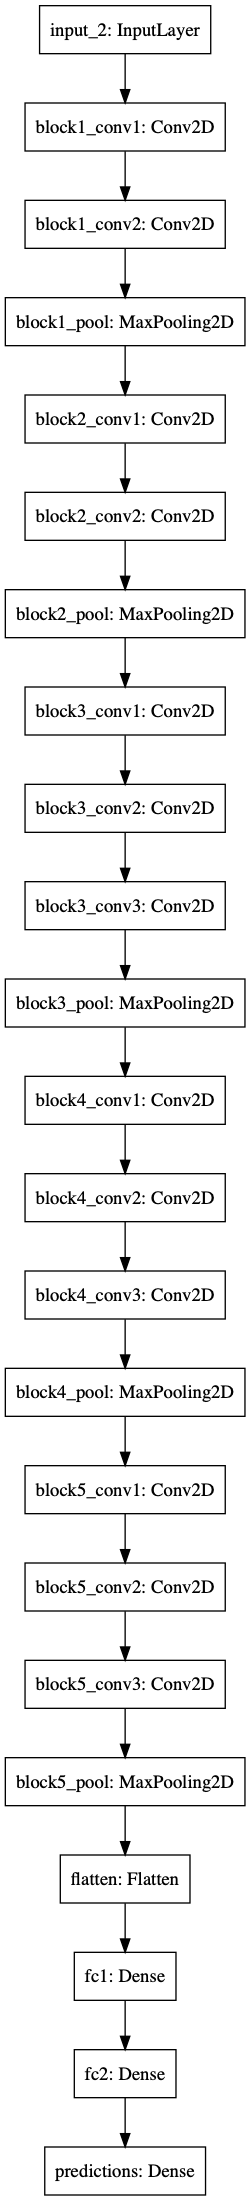

In [57]:
#importing required modules
from keras.applications import VGG16
#loading the saved model we are using the complete architecture thus include_top=True
modelvgg16 = VGG16(weights='imagenet',include_top=True)
#show the summary of model
#modelvgg16.summary()

# plot_model(modelvgg16, to_file='vgg.png')